# <font color='red'>Import Data</font>

In [2]:
import csv
import pandas as pd
import numpy as np

#กำหนดให้ show เนื้อหา dataframe แบบเต็มๆ
pd.set_option('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', -1)

train_dataset = pd.read_csv('thai_news_training_final.csv')

# <font color='red'>Data Processing</font>

In [8]:
import deepcut
import re

dont_need_word = []
need_word = []
cut_news = []

size_of_content = []
size_of_cleaned_content = []

#โหลด Stop words เข้ามา
with open("stopword.txt", encoding="utf8") as f:
    stop_words_list = [line.strip() for line in f.readlines()]

def deepcut_and_stopword(m):
    global size_of_content
    cut_by_deepcut = deepcut.tokenize(m)  # Type = list
    size_of_content.append(len(cut_by_deepcut))
    cut_stopwords = compare_stop_words(cut_by_deepcut)  # ตัด Stop_word ออก
    return cut_stopwords

def compare_stop_words(words):
    global size_of_cleaned_content
    count = 0
    dont_need_word.clear()
    need_word.clear()
    
    for i in words:
        temp = i.strip()
        if temp in stop_words_list:
            dont_need_word.append(i)
            count = count + 1
        elif temp == ' ':
            pass
        elif temp.isdigit():
            pass
        elif re.search(r'[a-zA-Z]', temp):
            pass
        else:
            need_word.append(temp)
            
    print("คำที่ตัดออก = ", dont_need_word)
    print("รวมทั้งหมด", count, "คำ")
    size_of_cleaned_content.append(count)
    return need_word

In [9]:
size = 75
negative_data = train_dataset.loc[train_dataset['Sentiments'] == -1].head(size)
positive_data = train_dataset.loc[train_dataset['Sentiments'] == 1].head(size)

neg_df = pd.DataFrame(negative_data)
pos_df = pd.DataFrame(positive_data)

#นำ neg_df, pos_df มารวมกัน
sample_df = neg_df.append(pos_df).reset_index()

In [10]:
# Get text to clean
text_to_clean = list(sample_df['Contents'])

In [11]:
sample_df["Cleaned_Contents"] = sample_df.Contents.map(lambda dts: "".join(deepcut_and_stopword(dts)))

คำที่ตัดออก =  ['ผู้', 'สื่อ', 'ข่าว', 'รายงาน', 'ว่า', 'เมื่อ', 'เวลา', '19', '.', '30', 'น.', 'วัน', 'ที่', '30', 'ก.ย.', '62', 'สารวัตร', 'เวร', '(', 'สอบสวน', ')', 'จ.ลพบุรี', 'รับ', 'แจ้ง', 'เกิด', 'รถ', 'กระบะ', 'ชน', 'กับ', 'รถ', 'ตู้', 'มี', 'ผู้', 'ชีวิต', 'และ', 'หลาย', 'ราย', 'บน', 'ถนนพหลโยธิน', 'หลัก', 'กิโลเมตร', 'ที่', '-', '180', 'หมู่', 'ที่', '3', 'วัด', 'จึง', 'รุด', 'ไป', 'ตรวจสอบ', 'พร้อม', 'หน่วย', 'กู้', 'สงเคราะห์', 'ที่', 'เกิด', 'เหตุ', 'พบ', 'รถ', 'ตู้', 'สี', 'ดำ', 'ทะเบียน', 'กรุงเทพมหานคร', 'ซึ่ง', 'มี', '(', ')', 'หรือ', 'เจ้า', 'อาวาส', 'อายุ', '66', 'ปี', 'ที่', 'เพิ่ง', 'เดินทาง', 'กลับ', 'มา', 'จาก', 'บ้าน', 'เด็ก', '2', 'วัด', '2', 'จ.ลพบุรี', 'ใกล้', 'กัน', 'มี', 'กระบะ', 'อีซูซุ', 'ทะเบียน', 'บก', 'ลพบุรี', 'สภาพ', 'ทั้ง', '2', 'คัน', 'ภาย', 'ใน', 'รถ', 'กระบะ', 'พบ', 'อายุ', '54', 'ปี', 'อยู่', 'บ้าน', 'เลข', 'ที่', '/', '2', 'หมู่', '6', 'ขว้าง', 'จ.ลพบุรี', 'และ', 'อายุ', '44', 'ปี', 'อยู่', 'บ้าน', 'เลข', 'ที่', '7', 'หมู่', '6', 'จ.ลพบุรี', 'เ

คำที่ตัดออก =  ['เปิด', 'ฉาก', 'ครึ่ง', 'แรก', 'นาที', 'ที่', '8', ' แมนฯยู', 'ได้', 'ก่อน', 'จาก', 'จังหวะ', 'ที่', 'จี้', 'เข้า', 'เขต', 'ฝั่ง', 'ซ้าย', 'ไป', 'สุด', 'เส้น', 'หลัง', 'เปิด', 'เข้า', 'กลาง', 'ออก', 'หลัง', 'ไป', 'ได้', 'และ', 'จาก', 'จังหวะ', 'เตะ', 'มุม', 'ฝั่ง', 'ซ้าย', 'เปิด', 'บอล', 'มา', 'เสา', 'สอง', 'แฮร์รี', 'โหม่ง', 'ตั้ง', 'ไป', 'หน้า', 'ประตู', 'พร้อม', 'เล่น', 'เลย', 'ออก', 'หลัง', 'ไป', 'จาก', 'นั้น', 'นาที', 'ที่', '29', 'ของ', 'แมนฯยู', 'อีก', 'ครั้ง', 'พาบอล', 'จาก', 'ฝั่ง', 'ขวา', 'เข้า', 'เขต', 'ก่อน', 'โยก', 'กอง', 'หลัง', 'ซัด', 'ด้วย', 'ซ้าย', 'รับ', 'เล็กน้อย', 'ก่อน', 'คว้า', 'บอล', 'ไว้', 'ได้', 'จังหวะ', 'นี้', 'เซอร์ อเล็กซ์ เฟอร์กูสัน', 'ดู', 'อยู่', 'บน', 'ถึง', 'กับ', 'เกม', 'เปิด', 'แลก', 'กัน', 'นาที', 'ที่', '30', 'อาร์เซนอล', 'ได้', 'ลุ้น', 'บ้าง', 'เมื่อ', 'จ่าย', 'บอล', 'เข้า', 'ฝั่ง', 'ขวา', 'ให้', 'ซัด', 'ด้วย', 'ซ้าย', 'บอล', 'ข้าม', 'คาน', 'น่า', 'หวัง', 'นาที', 'ที่', '43', 'แมนฯยู', 'หวิด', 'ขึ้น', 'นำ', 'จาก', 'จังหวะ', 'ที่', 

คำที่ตัดออก =  ['เมื่อ', 'วัน', 'ที่', '1', 'ต.ค.', '62', 'ผู้', 'สื่อ', 'ข่าว', 'รายงาน', 'ความ', 'กรณี', 'เกิด', 'เหตุ', 'สะพาน', 'ข้าม', 'ลำ', 'เชื่อม', 'ระหว่าง', 'ถนน', 'จาก', 'พื้นที่', 'ต.โนนตาล', 'ไป', 'ยัง', 'จ.นครพนม', 'ซึ่ง', 'เป็น', 'เส้นทาง', 'เชื่อม', 'ระหว่าง', 'หมู่', 'บ้าน', 'เกิด', 'เมื่อ', 'วัน', 'ที่', '29', 'กันยายน', '2562', 'ที่', 'มา', 'เป็น', 'เหตุ', 'ให้', 'อายุ', '23', 'ปี', 'อยู่', 'บ้าน', 'เลข', 'ที่', 'หมู่', '13', 'ต.โนนตาล', 'อ.ท่าอุเทน', 'จ.นครพนม', 'ที่', 'ขึ้น', 'ไป', 'ยืน', 'ปลา', 'อยู่', 'บน', 'ขอบ', 'สะพาน', 'ร่วง', 'ลง', 'มา', 'กับ', 'พื้น', 'สะพาน', 'ที่', 'ความ', 'ยาว', 'ประมาณ', 'เกือบ', '30', 'เมตร', 'ร่าง', 'จม', 'น้ำ', 'ใน', 'ลำ', 'ห้วย', 'ชีวิต', 'รวม', 'ถึง', 'รถ', 'จักรยาน', 'ยนต์', 'ตกลง', 'ไป', 'ใน', 'น้ำ', 'โดย', 'มี', 'ใคร', 'เข้า', 'ได้', 'ทัน', 'จนกระทั่ง', 'ภาย', 'หลัง', 'เกิด', 'เหตุ', 'ทาง', 'เจ้าหน้าที่', 'ตำรวจ', 'พร้อม', 'ด้วย', 'เจ้าหน้าที่', 'กู้', 'ตาล', 'ได้', 'เข้า', 'ไป', 'ตรวจสอบ', 'กู้', 'ร่าง', 'ผู้', 'ชีวิต', 'ขึ้น',

คำที่ตัดออก =  ['แต่', 'วัน', 'นี้', 'มี', 'เรื่อง', 'ยิ่ง', 'กว่า', 'ของ', 'สาว', '?', '(', 'ที่', 'ต้อง', 'ใส่', '?', 'เพราะ', 'คน', 'ที่', 'รู้', 'ว่า', 'ใน', 'ทำเนียบ', 'ดัง', 'ระดับ', 'โลก', 'มี', 'ชื่อ', 'เธอ', 'ผู้', 'นี้', ')', 'แต่', 'จะ', 'หรือ', 'เธอ', 'ก็', 'มี', 'ชีวิต', 'สุข', 'สบาย', 'ห่างไกล', 'กับ', 'ชีวิต', 'ตาก', 'หน้า', 'แบบ', 'สาว', 'นั่ง', '-', 'ทุก', 'คน', 'จึง', 'แปลกใจ', 'ที่', 'สาว', 'หน้าตา', 'เพราะ', 'พึ่ง', 'ศัลยกรรม', 'ทุก', 'อวัยวะ', 'กลับ', 'เลือก', 'ทำ', 'ตัว', 'คล้าย', 'ๆ', '18', 'มงกุฎ', 'วัน', 'นี้', 'ที่', 'ปกติ', 'จะ', 'เสนอ', 'จึง', 'ต้อง', 'จ๊ะ', 'จ๋า', 'ด้วย', 'ที่', 'กลิ่น', 'เหม็น', 'เริ่ม', 'โชย', 'จาก', 'พฤติกรรม', 'สาว', '?', 'ที่', 'กำลัง', 'ความ', 'จาก', 'ผู้', 'ชาย', 'ที่', 'มี', 'ความ', 'สัมพันธ์', 'กัน', 'คืน', 'โดย', 'ว่า', 'เธอ', 'ที่', 'คือ', 'เท่า', 'ที่', 'ทราบ', 'สาว', '?', 'ก็', 'กับ', 'ผู้', 'ชาย', 'หลาย', 'คน', 'และ', '1', 'ใน', 'บรรดา', 'นั้น', 'เคย', 'สอง', 'แม่', 'ลูก', 'แทบ', 'แต่', 'โชค', 'ที่', 'มา', 'ได้', 'อย่าง', 'มา'

คำที่ตัดออก =  ['ยัง', 'เป็น', 'คดี', 'ที่', 'ผู้คน', 'ยัง', 'จาก', 'การ', 'ชีวิต', 'ของ', 'อายุ', '25', 'ปี', 'หรือ', 'สาว', 'หรือ', 'วัย', '25', 'ปี', 'นาย', 'แบบ', 'เหล้า', 'หลัง', 'ผู้', 'ไป', 'รับ', 'จ้าง', 'ชง', 'เหล้า', 'ใน', 'งาน', 'ย่าน', 'อ.บางบัวทอง', 'จ.นนทบุรี', 'และ', 'ไป', 'มี', 'ผู้', 'พบ', 'ใน', 'ที่', 'พัก', 'ของ', 'ย่าน', 'โดย', 'แจ้ง', '3', 'ข้อ', 'หา', 'และ', 'ให้', 'การ', 'ภาค', 'เสธ', 'คุม', 'ตัว', 'เข้า', 'ทั้งนี้', 'พนักงาน', 'สอบสวน', 'ยัง', 'รอ', 'ผล', 'พิสูจน์', 'สาเหตุ', 'การ', 'อย่าง', 'จาก', 'อย่าง', 'เป็น', 'ทางการ', 'ขณะ', 'ที่', 'หรือ', 'อายุ', '29', 'ปี', 'หรือ', 'อายุ', '33', 'ปี', '2', 'พี่น้อง', 'เจ้าของ', 'งาน', 'และ', 'เพื่อน', 'ร่วม', 'รวม', '6', 'คน', 'ตำรวจ', 'สภ.บางบัวทอง', 'รวบรวม', 'พยาน', 'หลักฐาน', 'ขอ', 'ออก', 'หมาย', 'จับ', 'ใน', 'คดี', 'ซึ่ง', 'ได้', 'รับ', 'ว่า', 'จ้าง', 'มา', 'ใน', 'งาน', 'คืน', 'วัน', 'เกิด', 'เหตุ', '(', '16', 'ก.ย.', ')', 'ต่อ', 'จาก', 'หลัง', 'นาย', 'น้ำ', 'อุ่น', 'อุ้ม', 'ออก', 'จาก', 'งาน', 'ตำรวจ', 'ควบคุม', '

คำที่ตัดออก =  ['เมื่อ', 'วาน', 'นี้', 'ผม', 'เล่า', 'โดย', 'สรุป', 'ว่า', 'จาก', 'ประสบการณ์', 'การ', 'ใช้', 'กูเกิล', 'ของ', 'ผม', 'พบ', 'ว่า', 'ยัง', 'ค่อย', 'มี', 'เรื่องราว', 'หรือ', 'ข่าว', 'คราว', 'เก่า', 'ๆ', 'ที่', 'น่า', 'ของ', 'ประเทศไทย', 'ให้', 'ค้นคว้า', 'มาก', 'นัก', 'ใน', 'กูเกิล', 'ดัง', 'ตัวอย่าง', 'ที่', 'ผม', 'ยก', 'ไว้', 'เมื่อ', 'วาน', 'ก็', 'คือ', 'กรณี', 'ของ', 'นัก', 'มวย', 'ไทย', 'ที่', 'ขึ้น', 'โลก', 'คน', 'แรก', '(', 'แต่', ')', 'อย่าง ', 'มี', 'หัวข้อ', 'ให้', 'ค้นหา', 'ได้', 'เพียง', 'หยิบ', 'มือ', 'เดียว', 'เท่า', 'นั้น', 'ใน', 'ภาษา', 'ไทย', 'วัน', 'นี้', 'ผม', 'ขอ', 'ยก', 'ตัวอย่าง', 'เพิ่ม', 'อีก', 'ราย', 'หนึ่ง', 'คือ', 'อดีต', 'ศูนย์', 'หน้าทีม', 'ชาติ', 'ไทย', 'และ', 'ศูนย์', 'หน้าทีม', 'ฟุตบอล', 'ประเพณี', 'ของ', 'ซึ่ง', 'ดำรง', 'ตำแหน่ง', 'อธิบดี', 'พลังงาน', 'เป็น', 'ตำแหน่ง', 'สุดท้าย', 'ของ', 'การ', 'รับ', 'ราชการ', 'เมื่อ', 'ตอน', 'ที่', 'ท่าน', 'ผม', 'นึก', 'ได้', 'ว่า', 'สมัย', 'ก่อน', 'ท่าน', 'ดัง', 'มาก', 'เป็น', 'นัก', 'ฟุตบอล', 'ตัวอย่าง

คำที่ตัดออก =  ['มัน', 'กลับ', 'มา', 'อีก', 'นัก', 'ออนไลน์', 'ใน', 'ตำนาน', 'โดย', 'เมื่อ', 'เวลา', '12', '.', '30', 'น.', 'วัน', 'ที่', '30', 'ก.ย.', 'ที่', 'อายุ', '36', 'ปี', 'อาชีพ', 'ธุรกิจ', 'ส่วน', 'ตัว', 'และ', 'อดีต', 'นาย', 'แบบ', 'เข้า', 'พบ', 'รอง', 'สว.', '(', 'สอบสวน', ')', 'แจ้ง', 'ความ', 'คดี', 'กับ', 'คน', 'หลัง', 'ซื้อขาย', 'ของ', 'ทาง', 'ช็อปปิ้ง', 'ออนไลน์', 'โดย', 'กล่าว', 'ว่า', 'ก่อนหน้า', 'นี้', 'เคย', 'ประกอบ', 'อาชีพ', 'รับ', 'จ้าง', 'ถ่าย', 'แบบ', 'และ', 'หัน', 'มา', 'ประกอบ', 'อาชีพ', 'ธุรกิจ', 'ส่วน', 'ตัว', 'โดย', 'เมื่อ', 'วัน', 'ที่', '14', 'ก.ย.', 'ที่', 'มา', 'ได้', 'สั่ง', 'ซื้อ', 'ตู้', 'เย็น', 'ทาง', 'ชื่อ', 'ดัง', 'ใน', 'ราคา', 'บาท', 'ระบุ', 'จะ', 'ส่ง', 'ของ', 'ภาย', 'ใน', '3', 'วัน', 'จาก', 'นั้น', 'คน', 'ได้', 'ให้', 'โอน', 'เงิน', 'เข้า', 'บัญชี', 'หมายเลข', 'ระบุ', 'ชื่อ', 'เชื่อ', 'โอน', 'เงิน', 'เข้า', 'บัญชี', 'ดัง', 'กล่าว', 'กระทั่ง', 'ไป', '3', 'วัน', 'ได้', 'ติดต่อ', 'ไป', 'คน', 'บอก', 'ว่า', 'สินค้า', 'อยู่', 'ระหว่าง', 'จัด', 'ส่ง',

คำที่ตัดออก =  ['ชีวิต', 'เอา', 'ตัว', 'ใน', 'รถ', 'สอง', 'แถว', 'ที่', 'ไหล', 'ลง', 'เขา', 'ตัว', 'เอง', 'รถ', 'ทับ', 'มรณภาพ', 'ราย', 'นี้', 'เปิดเผย', 'เมื่อ', 'เวลา', '08', '.', '00', 'น.', 'วัน', 'ที่', '30', 'ก.ย.', 'สว.', '(', 'สอบสวน', ')', 'จ.ชลบุรี', 'ได้', 'รับ', 'แจ้ง', 'มี', 'รถ', 'กระบะ', 'สอง', 'แถว', 'หลัก', 'ไหล', 'ลง', 'เนิน', 'ลาดชัน', 'มี', 'พระสงฆ์', 'และ', 'สามเณร', 'ได้', 'รับ', 'จำนวน', 'มาก', 'บน', 'ทาง', 'ขึ้น', 'สำนัก', 'หมู่', '4', 'จึง', 'รายงาน', 'ให้', 'ผกก.', 'นำ', 'กำลัง', 'ตำรวจ', 'พร้อม', 'ทีม', 'แพทย์', 'และ', 'เจ้าหน้าที่', 'กู้', 'ไป', 'ตรวจสอบ', 'ที่', 'เกิด', 'เหตุ', 'เป็น', 'ถนน', 'ขับขี่', 'สวน', 'ทาง', 'กัน', 'เป็น', 'ทาง', 'ขึ้น', 'เขา', 'สูง', 'ชัน', 'ระยะ', 'ทาง', 'ยาว', 'กว่า', '1', '.', '5', 'กม.', 'พบ', 'รถ', 'สอง', 'แถว', 'อีซูซุ', 'สี', 'แดง', 'ทะเบียน', '10', '-', 'ชลบุรี', 'ท้าย', 'รถ', 'ชน', 'อัด', 'กับ', 'เสา', 'ไฟฟ้า', 'ข้าง', 'ทาง', 'มี', 'สามเณร', 'ได้', 'รับ', 'อยู่', 'ท้าย', 'รถ', '10', 'รูป', 'ส่วน', 'ใหญ่', 'เล็กน้อย', 'พระส

คำที่ตัดออก =  ['เมื่อ', 'วัน', 'ที่', '1', 'ต.ค.', '62', 'กรมอุตุนิยมวิทยา', 'รายงาน', 'สภาพ', 'อากาศ', 'ลักษณะ', 'ทั่วไป', 'ระบุ', 'พยากรณ์', 'อากาศ', '24', 'ชั่วโมง', 'ข้าง', 'หน้า', 'ประเทศไทย', 'ตอน', 'บน', 'มี', 'หมอก', 'บาง', 'ใน', 'ตอน', 'เช้า', 'และ', 'มี', 'ฝน', 'เพิ่ม', 'ขึ้น', 'ใน', 'ภาค', 'เหนือ', 'ภาค', 'กลาง', 'และ', 'ภาค', 'ตะวัน', 'ออก', 'ขอ', 'ให้', 'ประชาชน', 'บริเวณ', 'ภาค', 'เหนือ', 'ภาค', 'ตะวัน', 'ออก', 'เฉียง', 'เหนือ', 'ภาค', 'กลาง', 'รวม', 'ทั้ง', 'กรุงเทพมหานคร', 'และ', 'ปริมณฑล', 'การ', 'บริเวณ', 'ที่', 'มี', 'หมอก', 'ไว้', 'ด้วย', 'อนึ่ง', 'พายุ', 'ระดับ', '5', '(', ')', 'บริเวณ', 'ด้าน', 'ตะวัน', 'ออก', 'เฉียง', 'เหนือ', 'ของ', 'กำลัง', 'เคลื่อน', 'ตัว', 'ทาง', 'ทิศ', 'เหนือ', 'คาด', 'ว่า', 'จะ', 'เคลื่อน', 'เข้า', 'และ', 'ญี่ปุ่น', 'ใน', 'ช่วง', 'วัน', 'ที่', '2', '-', '3', 'ต.ค.', '62', 'สำหรับ', 'ผู้', 'ที่', 'จะ', 'เดินทาง', 'ไป', 'บริเวณ', 'ดัง', 'กล่าว', 'ขอ', 'ให้', 'ตรวจสอบ', 'สภาพ', 'อากาศ', 'ก่อน', 'ออก', 'เดินทาง', 'ด้วย', 'โดย', 'พายุ', 'นี้', 

คำที่ตัดออก =  ['1', '.', 'เกม', 'เปิด', 'แลก', 'กัน', 'ออก', 'สตาร์ต', 'เกม', 'มา', '20', 'นาที', 'แรก', 'ยัง', 'ดู', 'เชิง', 'กัน', 'อยู่', 'แต่', 'หลัง', 'จาก', 'นั้น', 'กัน', 'อย่าง', 'ทั้ง', 'สอง', 'ทีม', 'ต่าง', 'มี', 'ได้', 'ลุ้น', 'ประตู', 'ด้วย', 'กัน', 'ทั้ง', '2', 'ฝ่าย', 'อาร์เซนอล', 'เกือบ', 'ขึ้น', 'นำ', 'ก่อน', 'ด้วย', 'จาก', 'ลูก', 'ของ', 'และ', 'ดู', 'ซี', 'แต่', 'ปัด', 'ได้', 'หมด', 'กระทั่ง', 'นาที', 'สุดท้าย', 'ครึ่ง', 'แรก', 'ไกล', 'พา', 'ขึ้น', 'นำ', '1', '-', '0', 'และ', 'ใน', 'ครึ่ง', 'หลัง', 'รูป', 'เกม', 'ก็', 'ยัง', 'แต่', 'จาก', 'ความ', 'ผิดพลาด', 'ของ', 'แนว', 'รับ', 'ผี', 'แดง', 'เริ่ม', 'จาก', 'การ', 'จ่าย', 'บอล', 'ของ', 'และ', 'การ', 'เช็ก', 'หน้า', 'ของ', 'แฮร์รี ', 'ทำ', 'ให้', 'ตี', 'เสมอ', 'ให้', 'อาร์เซนอล', '1', 'แต้ม', 'กลับ', 'บ้าน', 'ไป', 'เลย', '2', '.', 'ผีแดง', 'เกม', 'หลากหลาย', 'แม้', 'แฟน', 'บอล', 'ผีแดง', 'มอง', 'ถึง', 'ว่า', 'เกม', 'นี้', 'แทบ', 'เห็น', 'ปิศาจ', 'แดง', 'จ่าย', 'บอล', 'กลับ', 'หลัง', 'กัน', 'มาก', 'นัก', 'พาบอล', 'ขึ้น',

คำที่ตัดออก =  ['วัน', 'ที่', '1', 'ต.ค.', '2562', 'ผู้', 'สื่อ', 'ข่าว', 'รายงาน', 'ว่า', 'เว็บไซต์', 'เผย', 'การ', 'จัด', 'อันดับ', 'อากาศ', 'และ', 'การ', 'จัด', 'อันดับ', 'เมือง', 'ที่', 'มี', 'ตาม', 'มาตรฐาน', 'เมื่อ', 'เวลา', '09', '.', '58', 'น.', 'พบ', 'ว่า', 'อันดับ', '1', '.', 'ได้แก่', 'อันดับ', '2', '.', '3', '.', 'ประเทศ', 'ส่วน', 'กรุงเทพฯ', 'ประเทศไทย', 'อยู่', 'อันดับ', 'ที่', '13', 'ขณะ', 'ที่', 'แฟน', 'รายงาน', 'ข้อมูล', 'อากาศ', 'ใน', 'พื้นที่', 'กรุงเทพมหานคร', 'และ', 'ปริมณฑล', 'ประจำ', 'วัน', 'ที่', '1', 'ตุลาคม', '2562', 'ดัง', 'นี้', '1', '.', 'ปริมาณ', '2', '.', '5', 'ตรวจ', 'วัด', 'ได้', 'ระหว่าง', '40', '–', '81', 'ต่อ', 'ลูกบาศก์', 'เมตร', 'พบ', 'ส่วน', 'ใหญ่', 'เกิน', 'เกณฑ์', 'มาตรฐาน', '(', 'ค่า', 'มาตรฐาน', 'เกิน', '50', 'ต่อ', 'ลูกบาศก์', 'เมตร', ')', 'เกือบ', 'ทุก', 'พื้นที่', 'และ', '/', 'บริเวณ', 'บริเวณ', 'อ.คลองหลวง ', 'จังหวัดสมุทรปราการ', 'บริเวณ', 'อ.บางเสาธง', 'และ', 'อ.เมือง', 'บริเวณ', 'อ.เมือง', 'บริเวณ', 'อ.เมือง', 'ปริมาณ', 'มี', 'แนวโน้ม',

คำที่ตัดออก =  ['วาน', 'นี้', '(', '30', 'ก.ย.', ')', 'ตำรวจ', 'ชุด', 'สืบสวน', 'ได้', 'รับ', 'การ', 'จาก', 'เด็ก', 'และ', 'เยาวชน', 'จังหวัดเพชรบุรี', 'ว่า', 'มี', 'ผู้', 'ต้อง', 'หา', 'ซึ่ง', 'เป็น', 'เยาวชน', 'จำนวน', '3', 'คน', 'ก่อ', 'เหตุ', 'เจ้าหน้าที่', 'ได้', 'รับ', 'และ', 'ไป', 'จึง', 'นำ', 'กำลัง', 'รุด', 'ไป', 'ตรวจสอบ', 'ที่', 'เกิด', 'เหตุ', 'เป็น', 'อาคาร', 'ของ', 'สถาน', 'เด็ก', 'และ', 'เยาวชน', 'จังหวัดเพชรบุรี', 'มี', 'ลักษณะ', 'เป็น', 'ตึก', 'แถว', 'ติด', 'กัน', 'โดย', 'ที่', 'บริเวณ', 'ห้อง', 'ควบคุม', 'เยาวชน', 'ชาย', 'ชั้น', '4', 'พบ', 'รอย', 'เลือด', 'หยด', 'กระจาย', 'อยู่', 'ทั่ว', 'บริเวณ', 'ภาย', 'ใน', 'ห้อง', 'มี', 'ร่องรอย', 'การ', 'ซึ่ง', 'เจ้าหน้าที่', 'ผู้', 'คุม', 'ที่', 'ผู้', 'ต้อง', 'หา', 'ร่างกาย', 'นำ', 'ส่ง', 'ที่', 'จังหวัดเพชรบุรี', 'ไป', 'ก่อนหน้า', 'นี้', 'ทราบ', 'ชื่อ', 'ต่อ', 'มา', 'คือ', 'ฟ้า', 'ตำแหน่ง', 'พนักงาน', 'พินิจ', 'ได้', 'รับ', 'ต่อย', 'ที่', 'บริเวณ', 'ใบ', 'หน้า', 'มี', 'มี', 'อาการ', 'บวม', 'ส่วน', 'เยาวชน', 'ซึ่ง', 'เป็น', 'ผู

คำที่ตัดออก =  ['จาก', 'กรณี', 'ที่', 'อายุ', '62', 'ปี', 'คน', 'ขับ', 'รถ', 'แท็กซี่', 'ก่อ', 'เหตุ', 'ใช้', 'อายุ', '43', 'ปี', 'ภรรยา', 'ชีวิต', 'ภาย', 'ใน', 'บ้าน', 'เลข', 'ที่', '46', '/', 'สาย', 'ไหม', 'กทม.', 'เหตุ', 'ภรรยา', 'ก่อน', 'จะ', 'ขับ', 'รถ', 'แท็กซี่', 'ยี่ห้อ', 'โตโยต้า', 'สี', 'เหลือง', 'หมายเลข', 'ทะเบียน', 'กรุงเทพมหานคร', 'ไป', 'โดย', 'เหตุ', 'เกิด', 'ช่วง', 'เช้า', 'มืด', 'วัน', 'ที่', '29', 'ก.ย.', 'ที่', 'มา', 'นั้น', 'ล่าสุด', 'วัน', 'นี้', '(', '1', 'ต.ค.', ')', 'เวลา', '10', '.', '00', 'น.', 'รอง', 'ผกก.', 'สส.', 'จ.พิษณุโลก', 'พร้อม', 'ชุด', 'สืบสวน', 'ได้', 'ร่วม', 'กัน', 'ตัว', 'ได้', 'ขณะ', 'กำลัง', 'ลง', 'จาก', 'รถไฟ', 'ที่', 'จ.พิษณุโลก', 'นำ', 'ตัว', 'ไป', 'สอบสวน', 'เบื้อง', 'ต้น', 'ผู้', 'ต้อง', 'หา', 'ยอม', 'รับ', 'สารภาพ', 'ว่า', 'ได้', 'ก่อ', 'เหตุ', 'ผู้', 'เป็น', 'ภรรยา', 'เนื่อง', 'จาก', 'ของ', 'อยู่', 'ใน', 'ห้าง', 'หลัก', 'สี่', 'แต่ง', 'ตัว', 'บาง', 'ครั้ง', 'ก็', 'ออก', 'ไป', 'ทาง', 'และ', 'ยัง', 'แอบ', 'กับ', 'ชาย', 'อื่น', 'มา', 'นาน', 

คำที่ตัดออก =  ['วัน', 'ที่', '1', 'ต.ค.', '62', 'เรียก', 'ได้', 'ว่า', 'แฟน', 'คลับ', 'ชลบุรี', 'เอฟซี', 'หลัง', 'ทีม', 'แพทย์', 'ประจำ', 'สินทวีชัย หทัยรัตนกุล', 'ปลอด', 'หลัง', 'ได้', 'รับ', 'จาก', 'การ', 'ปะทะ', 'กับ', 'แนว', 'รุก', 'เพลิง', 'ใน', 'เกม', 'ลีก', 'นัด', 'เมื่อ', 'วัน', 'อาทิตย์', 'ที่', 'มา', 'เป็น', 'ที่', 'กัน', 'ว่า', 'สินทวีชัย หทัยรัตนกุล', 'ออก', 'มา', 'ลูก', 'ของ', 'และ', 'ปุ่ม', 'ลง', 'บน', 'ศีรษะ', 'ใน', 'ช่วง', 'ทด', 'เวลา', 'ของ', 'ครึ่ง', 'เวลา', 'หลัง', 'ใน', 'เกม', 'ที่', 'ชลบุรี', 'เอฟซี', 'เปิด', 'บ้าน', 'เอา', 'ระยอง', '3', '-', '0', 'ก่อน', 'ที่', 'หลัง', 'จาก', 'การ', 'ทีม', 'แพทย์', 'ประจำ', 'สโมสร', ' จะ', 'นำ', 'ตัว', 'เดินทาง', 'ไป', 'เช็ก', 'อาการ', 'ที่', 'โรง', 'พยาบาล', 'ทันที', 'ล่าสุด', 'วัน', 'นี้', 'ทีม', 'แพทย์', 'ประจำ', 'เอฟซี', 'ได้', 'ออก', 'มา', 'อาการ', 'ล่าสุด', 'ของ', 'นาย', 'ด่าน', 'มาก', 'ประสบการณ์', 'ทัพ', 'ฉลามชล', 'ว่า', 'สำหรับ', 'อาการ', 'ของ', 'สินทวีชัย', 'เบื้อง', 'ต้น', 'ผล', 'ปรากฏ', 'ว่า', 'มี', 'รอย', 'จาก', 'การ

คำที่ตัดออก =  ['เมื่อ', 'เวลา', '01', '.', '30', 'น.', 'ของ', 'วัน', 'ที่', '1', 'ต.ค.', '62', 'นา', 'รอง', 'สวป.', 'สภ.เมืองพัทยา', 'จ.ชลบุรี', 'รับ', 'แจ้ง', 'เหตุ', 'ร่างกาย', 'เหตุ', 'เกิด', 'ที่', 'ห้อง', 'พัก', 'ราย', 'วัน', 'มี', 'ชื่อ', 'ริม', 'สอง', 'จึง', 'เดินทาง', 'ไป', 'ตรวจสอบ', 'ทั้งนี้', 'พบ', 'นาง', '(', 'นาม', 'สมมติ', ')', 'อายุ', '34', 'ปี', 'อยู่', 'ใน', 'สภาพ', 'นุ่ง', 'ผ้า', 'เช็ด', 'ตัว', 'ด้วย', 'ความ', 'พร้อม', 'กับ', 'ขอ', 'ความ', 'กับ', 'ผู้', 'ห้อง', 'พัก', 'และ', 'เล่า', 'เหตุการณ์', 'ให้', 'ตำรวจ', 'ฟัง', 'ว่า', 'ผู้', 'ชาย', 'ร่างกาย', 'ด้วย', 'การ', 'ต่อย', 'ท้อง', 'จับ', 'หัว', 'โขก', 'กับ', 'ผนัง', 'เมื่อ', 'เจ้าหน้าที่', 'ขึ้น', 'ไป', 'ชั้น', 'สอง', 'ก็', 'พบ', '(', 'นาม', 'สมมติ', ')', 'อายุ', '44', 'ปี', 'อยู่', 'ใน', 'สภาพ', 'เปลือย', 'กาย', 'อยู่', 'บน', 'เตียง', 'นอน', 'เจ้าหน้าที่', 'ให้', 'แต่ง', 'กาย', 'ให้', 'เมื่อ', 'ฝ่าย', 'หญิง', 'เห็น', 'ผู้', 'ก่อ', 'เหตุ', 'ก็', 'ปรี่', 'เข้า', 'ไป', 'ตบ', 'เข้า', 'ที่', 'ใบ', 'หน้า', 'อย่าง', 'จัง', 

คำที่ตัดออก =  ['เมื่อ', '1', 'ต.ค.', '62', 'เว็บไซต์', 'เดอะซัน', 'และ', 'รายงาน', 'เกิด', 'เหตุการณ์', 'คาดคิด', 'สะพาน', 'ข้าม', 'แม่น้ำ', 'ใน', 'เมือง', 'ฟาน', 'หลาน', 'บน', 'ลง', 'สู่', 'แม่น้ำ', 'ขณะ', 'มี', 'รถ', 'บรรทุก', 'น้ำมัน', 'คัน', 'หนึ่ง', 'แล่น', 'และ', 'เกือบ', 'จะ', 'พ้น', 'สะพาน', 'อยู่แล้ว', 'เป็น', 'เหตุ', 'ให้', 'รถ', 'บรรทุก', 'น้ำมัน', 'ร่วง', 'ลง', 'ไป', 'พื้น', 'ดิน', 'บริเวณ', 'ตลิ่ง', 'แม่น้ำ', 'เกิด', 'ไฟ', 'เมื่อ', 'ประมาณ', '09', '.', '30', 'น.', 'ของ', 'เช้า', 'วัน', 'อังคาร', 'ที่', '1', 'ต.ค.', '62', 'ตาม', 'เวลา', 'ท้องถิ่น', 'กี่', 'ชั่วโมง', 'หลัง', 'จาก', 'พายุ', 'มิ', 'เพิ่ง', 'จะ', 'เคลื่อน', 'ตัว', 'ไป', 'หลัง', 'ก่อ', 'ให้', 'เกิด', 'ฝน', 'ทั่ว', 'เกาะ', 'ภาพ', 'จาก', 'กล้อง', 'วงจรปิด', 'บันทึก', 'เหตุการณ์', 'ขณะ', 'สะพาน', 'ข้าม', 'ลง', 'สู่', 'แม่น้ำ', 'อย่าง', 'น่า', 'และ', 'เศษ', 'ของ', 'สะพาน', 'ที่', 'ไป', 'เรือ', 'ประมง', '3', 'ลำ', 'ด้าน', 'ล่าง', 'ว่า', 'อาจ', 'มี', 'คน', 'ติด', 'อยู่', 'ใน', 'เรือ', 'เหล่า', 'นี้', 'มี', 'รายงาน', 

คำที่ตัดออก =  ['เมื่อ', 'วัน', 'ที่', '1', 'ต.ค.', '62', 'ผู้', 'สื่อ', 'ข่าว', 'รายงาน', 'ว่า', 'ตำรวจ', 'ฝ่าย', 'สืบสวน', 'ได้', 'ทำ', 'การ', 'ผู้', 'ต้อง', 'ชาย', 'เยาวชน', 'วัย', '17', 'ปี', 'เป็น', 'ชาว', 'จ.', 'เพชรบุรี', 'ที่', 'ก่อ', 'เหตุ', 'ร่างกาย', 'เจ้าหน้าที่', 'ก่อน', 'ออก', 'จาก', 'และ', 'เด็ก', 'และ', 'เยาวชน', 'จังหวัดเพชรบุรี', 'โดย', 'สามารถ', 'ควบคุม', 'ตัว', 'ได้', 'ที่', 'บริเวณ', 'บ้าน', 'พัก', 'เมื่อ', 'ช่วง', 'เช้า', 'มืด', 'และ', 'ได้', 'นำ', 'ตัว', 'มา', 'ที่', 'จาก', 'นั้น', 'ได้', 'ส่ง', 'ไป', 'ตรวจ', 'ร่างกาย', 'ที่', 'และ', 'ส่ง', 'ต่อ', 'มา', 'ที่', 'และ', 'ใน', 'ช่วง', 'บ่าย', 'วัน', 'เดียว', 'กัน', 'นี้', 'ญาติ', 'ของ', 'ผู้', 'ต้อง', 'วัย', '16', 'ปี', 'ชาว', 'จังหวัดเพชรบุรี', 'และ', 'ผู้', 'ต้อง', 'เยาวชน', 'วัย', '17', 'ปี', 'ชาว', 'กรุงเทพมหานคร', '2', 'เยาวชน', 'ที่', 'ได้', 'ติดต่อ', 'รอง', 'ผกก.', 'ส.', 'เพื่อ', 'นำ', 'ตัว', 'เยาวชน', 'ทั้ง', 'สอง', 'คน', 'มา', 'มอบ', 'ตัว', 'กับ', 'เจ้าหน้าที่', 'ตำรวจ', 'ที่', 'ซึ่ง', 'หลัง', 'จาก', 'รับ', 

คำที่ตัดออก =  ['เมื่อ', '1', 'ต.ค.', '62', 'เว็บไซต์', 'รายงาน', 'ความ', 'ใจกล้า', 'ท้า', 'ความ', 'ของ', 'นัก', 'ชีววิทยา', 'หนุ่ม', 'ชาว', 'ออสเตรเลีย', 'กล้า', 'ทดสอบ', 'คม', 'และ', 'พิษ', 'ของ', 'งูเหลือม', 'ตัว', 'ใหญ่', 'ยาว', 'นับ', '6', 'ฟุต', 'หรือ', '1', '.', '82', 'เมตร', 'ด้วย', 'การ', 'ให้', 'งูเหลือม', 'ยักษ์', 'กัด', 'ที่', 'ต้น', 'แขน', 'ของ', 'เขา', 'จาก', 'คลิป', 'วิดีโอ', 'สุด', 'ที่', 'ทั้ง', 'คู่', 'นำ', 'เผยแพร่', 'ใน', 'รายการ', 'ใน', 'ชื่อ', 'ตอน', 'ใหม่', 'of', '(', 'ราชา', 'ของ', 'ความ', 'เจ็บปวด', ')', 'แสดง', 'ให้', 'เห็น', 'ช่วง', 'เวลา', 'ระทึก', 'ขณะ', 'นัก', 'ชีววิทยา', 'หนุ่ม', 'ต้อง', 'เผชิญ', 'หน้า', 'กับ', 'งู', 'เหลือม', 'ตัว', 'ใหญ่', 'โดย', 'ที่', 'เขา', 'ใส่', 'เสื้อ', 'และ', 'สวม', 'เพียง', 'หน้า', 'พลาสติก', 'ใบ', 'หน้า', 'เท่า', 'นั้น', 'ซึ่ง', 'หลัง', 'จาก', 'งู', 'เหลือม', 'คน', 'ปล่อย', 'ออก', 'จาก', 'กระสอบ', 'ที่', 'วาง', 'อยู่', 'บน', 'โต๊ะ', 'ใจกล้า', 'มาก', 'ยื่น', 'ท่อน', 'แขน', 'ที่', 'มี', 'เป็น', 'มัด', 'ๆ', 'เพื่อ', 'ให้', 'งู', '

คำที่ตัดออก =  ['เมื่อ', 'วัน', 'ที่', '1', 'ต.ค.', 'รมว.', 'คมนาคม', 'เปิดเผย', 'ถึง', 'มาตรการ', 'ขนาด', 'เล็ก', '2', '.', '5', 'ว่า', 'ได้', 'สั่งการ', 'ให้', 'หน่วย', 'งาน', 'ใน', 'สังกัด', 'กระทรวงคมนาคม', 'มาตรการ', 'เป็น', 'การ', 'เร่งด่วน', 'ใน', '3', 'เรื่อง', 'คือ', 'รถ', 'งาน', 'ก่อสร้าง', 'และ', 'การ', 'ใช้', 'ระบบ', 'ขนส่ง', 'สาธารณะ', 'โดย', 'ใน', 'ส่วน', 'ของ', 'รถ', 'นั้น', 'ให้', 'กรมการขนส่งทางบก', '(', 'ขบ.', ')', 'ตรวจสอบ', 'สภาพ', 'และ', 'ควัน', 'ดำ', 'ของ', 'รถ', 'โดยสาร', 'สาธารณะ', 'อย่าง', 'เข้มงวด', 'มาก', 'ขึ้น', 'จาก', 'เดิม', 'ที่', 'การ', 'อยู่แล้ว', 'หาก', 'พบ', 'ว่า', 'รถ', 'คัน', 'ใด', 'หลักเกณฑ์', 'การ', 'ตรวจ', 'สภาพ', 'ต้อง', 'สั่ง', 'วิ่ง', 'ให้', 'บริการ', 'เด็ดขาด', 'จนกว่า', 'จะ', 'มี', 'การ', 'ให้', 'มาตรฐาน', 'จึง', 'นำ', 'กลับ', 'มา', 'ให้', 'บริการ', 'ได้', 'ทั้งนี้', 'ได้', 'ให้', 'หน่วย', 'งาน', 'ก่อสร้าง', 'เจ้าของ', 'โครงการ', 'เช่น', 'กรมทางหลวง', '(', 'ทล.', ')', 'และ', '(', ')', 'งาน', 'กับ', 'ผู้', 'ให้', 'จัด', 'สเปรย์', 'น้ำ', 'ใน',

คำที่ตัดออก =  ['การ', 'ฟุตบอล', 'ยูฟ่า', 'แชมเปียนส์', 'ลีก', 'ฤดูกาล', '-', '20', 'รอบ', 'แบ่ง', 'กลุ่ม', 'กลุ่ม', 'เอ', 'ประจำ', 'วัน', 'อังคาร', 'ที่', '1', 'ต.ค.', 'คู่', 'ที่', 'น่า', 'ราชันชุด', 'ขาว', 'เรอัล มาดริด', 'เปิด', ' เบร์นาเบว', 'รับ', 'การ', 'มา', 'ของ', 'คลับ', 'บรูซ', 'ทีม', 'ดัง', 'จาก', 'เบลเยียม', 'ครึ่ง', 'แรก', 'นาที', 'ที่', '9', 'ขึ้น', 'นำ', '1', '-', '0', 'จาก', 'จังหวะ', 'ที่', 'เตา', 'บอล', 'จาก', 'ฝั่ง', 'ซ้าย', 'เข้า', 'กลาง', 'จับ', 'บอล', 'หนึ่ง', 'จังหวะ', 'เข้า', 'ไป', 'ถึง', 'กับ', 'ทาง', 'จาก', 'นั้น', 'นาที', 'ที่', '39', 'เป็น', '2', '-', '0', 'จาก', 'จังหวะ', 'ที่', 'พา', 'บอล', 'เข้า', 'ฝั่ง', 'ขวา', 'ก่อน', 'เข้า', 'ไป', 'อย่าง', 'ก่อน', 'จะ', 'ครึ่ง', 'แรก', 'ไป', 'ด้วย', 'สกอร์', 'นี้', 'กลับ', 'มา', 'เล่น', 'ต่อ', 'ครึ่ง', 'หลัง', 'ถึง', 'นาที', 'ที่', '56', 'เรอัล มาดริด', 'มา', 'เป็น', '1', '-', '2', 'จาก', 'จังหวะ', 'ที่', 'คาริม เบนเซมา', 'บอล', 'ให้', 'เซร์คิโอ รามอส', 'โหม่ง', 'เข้า', 'ไป', 'ตุง', 'ตาข่าย', 'จาก', 'นั้น', 'นาที', 'ท

คำที่ตัดออก =  ['ผบก.', 'สั่ง', 'ให้', 'ผกก.', '5', 'สว.', 'และ', 'ฝ่าย', 'สืบสวน', 'นายสาธิต', 'อายุ', '29', 'ปี', 'ชาว', 'จ.', 'อุตรดิตถ์', 'ข้อ', 'หา', 'เอกสาร', 'และ', 'ใช้', 'เอกสาร', 'มี', 'ไว้', 'เพื่อ', 'นำ', 'ออก', 'ใช้', 'ซึ่ง', 'บัตร', 'อิเล็กทรอนิกส์', 'ของ', 'ผู้', 'อื่น', 'โดย', 'มิ', 'และ', 'เพื่อ', 'ใช้', 'ใน', 'การ', 'ชำระ', 'ราคา', 'สินค้า', 'แทน', 'การ', 'ชำระ', 'ด้วย', 'เงิน', 'ผู้', 'ต้อง', 'หา', 'ได้', 'ที่', 'หน้า', ' พระราม 2', 'แต่', 'ที่', 'น่า', 'คดี', 'นี้', 'นายสาธิต', ' ผู้', 'ต้อง', 'หา', 'เป็น', 'พนักงาน', 'บริการ', 'ลูกค้า', 'ของ', 'บริษัท', 'มือถือ', 'ชื่อ', 'ดัง', 'แห่ง', 'หนึ่ง', 'ถ่าย', 'บัตร', 'ประชาชน', 'และ', 'บัตร', 'เครดิต', 'ของ', 'ลูกค้า', 'นำ', 'เอา', 'ข้อมูล', 'บัตร', 'ไป', 'สั่ง', 'ซื้อ', 'สินค้า', 'จาก', 'เว็บไซต์', 'ขาย', 'สินค้า', 'ใน', 'ต่าง', 'ประเทศ', 'ได้แก่', 'ให้', 'เรียก', 'เก็บ', 'เงิน', 'จาก', 'ลูกค้า', 'ผู้', 'ต้อง', 'หา', 'อาศัย', 'ความ', 'รู้', 'ที่', 'ได้', 'มา', 'จาก', 'การ', 'ทํา', 'งาน', 'ร่องรอย', 'การ', 'ทํา', 'รายการ'

คำที่ตัดออก =  ['มุม', 'หรือ', '-', '-', 'ทาง', 'ตะวัน', 'ของ', 'อินเดีย', 'เมือง', 'ใหญ่', 'ประชากร', 'มาก', 'ที่สุด', 'ของ', 'ประเทศ', 'ราว', '12', '.', '5', 'ล้าน', 'คน', 'พ้น', 'เผชิญ', 'สถานการณ์', 'เดียว', 'กัน', 'นี้', 'พื้นที่', 'ประสบ', 'มาก', 'ที่สุด', 'บริเวณ', 'หนึ่ง', 'คือ', 'ย่าน', '-', '-', 'แหล่ง', 'ใหญ่', 'ที่สุด', 'ของ', 'ทั้ง', 'ติด', 'อันดับ', 'โลก', 'ประเมิน', 'ผู้', 'พัก', 'อาศัย', 'อาจ', 'มาก', 'ถึง', '1', 'ล้าน', 'คน', 'บน', 'พื้นที่', 'กว้าง', 'ราว', '1', '.', '7', 'ตาราง', 'กิโลเมตร', 'สถานการณ์', 'น้ำ', 'ขึ้น', 'ทุก', 'ปี', 'ถ้า', 'เป็น', 'ไป', 'ตาม', 'คาด', 'การณ์', 'ของ', 'สหประชาชาติ', 'ระบุ', 'ภาย', 'ใน', 'สิ้น', 'ศตวรรษ', 'นี้', 'หรือ', 'อีก', 'ราว', '80', 'ปี', 'ระดับ', 'น้ำ', 'ทะเล', 'ทั้ง', 'โลก', 'อาจ', 'เพิ่ม', 'ถึง', '1', 'เมตร', 'จะ', 'ทำ', 'ให้', 'ต้อง', 'จม', 'น้ำ', 'มาก', 'ราว', '1', 'ใน', '4', 'ส่วน', 'เดิม', 'สมัย', 'อังกฤษ', 'เป็น', 'เจ้า', 'อินเดีย', 'มี', 'เกาะ', 'เล็ก', 'ๆ', 'ประกอบ', 'กัน', '7', 'แห่ง', 'แต่', 'ทุก', 'วัน', 'นี้', 'มี', 

คำที่ตัดออก =  ['รถ', 'ตู้', 'พุ่ง', 'ชน', 'รถ', 'ปิกอัพ', 'คู่', 'วัย', 'กลับ', 'รถ', 'ตัด', 'หน้า', 'สนั่น', 'ส่วน', 'คู่', 'กรณี', 'คา', 'ที่', '2', 'ราย', 'นี้', 'เปิดเผย', 'ขึ้น', 'เมื่อ', 'เวลา', '19', '.', '30', 'น.', 'วัน', 'ที่', '30', 'ก.ย.', '(', 'สอบสวน', ')', 'จ.ลพบุรี', 'รับ', 'แจ้ง', 'เหตุ', 'รถ', 'ชน', 'กัน', 'มี', 'ผู้', 'ชีวิต', 'บน', 'ถนนพหลโยธิน', 'กม.', '-', '180', 'หมู่', '3', 'วัด', 'นำ', 'กำลัง', 'พร้อม', 'เจ้าหน้าที่', 'รุด', 'ไป', 'สอบสวน', 'ที่', 'เกิด', 'เหตุ', 'เป็น', 'ถนน', '4', 'เลน', 'มี', 'เกาะ', 'กลาง', 'ถนน', 'พบ', 'รถ', 'ตู้', 'สี', 'ดำ', 'ทะเบียน', 'กรุงเทพมหานคร', 'หน้า', 'รถ', 'ยุบ', 'อยู่', 'ริม', 'ถนน', 'ฝั่ง', 'ไป', 'พบ', 'หรือ', 'อายุ', '66', 'ปี', 'เจ้า', 'อาวาส', 'นั่ง', 'อยู่', 'เบาะ', 'หลัง', 'คน', 'ขับ', 'เป็น', 'ยาว', '10', 'ซม.', 'และ', 'มี', 'อาการ', 'ปวด', 'สะโพก', 'ขวา', 'รีบ', 'นำ', 'ส่ง', 'คน', 'ขับ', 'เป็น', 'ชาย', 'ทราบ', 'ชื่อ', 'ได้', 'รับ', 'เล็กน้อย', 'ส่วน', 'ลูกศิษย์', 'อีก', '2', 'คน', 'ได้', 'รับ', 'แต่อย่างใด', 'คู่', 'ก

คำที่ตัดออก =  ['รัฐบาล', 'จีน', 'ได้', 'ออก', 'หนังสือ', 'ชื่อ', 'and', 'the', 'World', 'in', 'the', 'New', 'เพื่อ', '70', 'ปี', 'สาธารณรัฐประชาชนจีน', 'โดย', 'ระบุ', 'ว่า', 'จีน', 'ใช้', 'เวลา', 'เพียง', 'กี่', 'สิบ', 'ปี', 'ใน', 'การ', 'สู่', 'ประเทศ', 'ที่', 'ขณะ', 'ที่', 'ประเทศ', 'ที่', 'ต้อง', 'ใช้', 'เวลา', 'หลาย', 'ร้อย', 'ปี', 'หนังสือ', 'ปก', 'ขาว', 'จีน', 'ได้', 'เปรียบเทียบ', 'จีดีพี', 'จีน', 'ปี', 'กับ', 'ปี', 'เพื่อ', 'ชี้', 'ให้', 'เห็น', 'ถึง', 'การ', 'ที่', 'รวดเร็ว', 'ของ', 'จีน', 'ปี', 'จีดีพี', 'จีน', 'อยู่', 'ที่', 'ล้าน', 'หยวน', 'ปี', 'จีดีพี', 'จีน', 'อยู่', 'ที่', '90', 'ล้าน', 'ล้าน', 'หยวน', 'ขึ้น', 'ถึง', 'เท่า', 'ใน', 'เวลา', '66', 'ปี', 'ราย', 'ได้', 'ต่อ', 'หัว', 'ของ', 'คน', 'จีน', 'ปี', 'อยู่', 'ที่', 'หยวน', 'ปี', 'อยู่', 'ที่', 'หยวน', 'ขึ้น', 'ถึง', '70', 'เท่า', 'ช่วง', '70', 'ปี', 'ของ', 'สาธารณรัฐประชาชนจีน', 'ภาย', 'ใต้', 'จีน', 'มี', 'ผู้', 'นำ', 'เพียง', '5', 'คน', 'เท่า', 'นั้น', 'คือ', 'เหมา', 'หู', 'และ', 'สี', 'ผู้', 'นำ', 'คน', 'ปัจจุบัน'

คำที่ตัดออก =  ['โดย', 'ได้', 'เป็น', 'สื่อ', 'กลาง', 'ระหว่าง', 'ชุมชน', 'ใน', 'การ', 'ให้', 'ความ', 'รู้', 'เกี่ยว', 'กับ', 'ใน', 'สตรี', 'และ', 'ทุนทรัพย์', 'กล่อง', 'รับ', 'จาก', 'ลูกค้า', 'รวม', 'ทั้ง', 'การ', 'ทุน', 'จาก', 'และ', 'การ', 'จัด', 'กิจกรรม', 'ทาง', 'การ', 'ตลาด', 'เพื่อ', 'เครื่องมือ', 'ทาง', 'การ', 'แพทย์', 'เช่น', 'เครื่องมือ', 'สำหรับ', 'ตรวจ', 'หา', 'นม', 'ที่', 'มี', 'ที่สุด', '(', ')', 'การ', 'หอ', 'พัก', 'ฟื้น', 'ผู้', 'ใน', 'สตรี', 'ของ', 'สถาบัน', 'แห่งชาติ', 'และ', 'ล่าสุด', 'ได้', 'มอบ', 'เงิน', 'รวม', 'ทั้งสิ้น', '20', 'ล้าน', 'บาท', 'เพื่อ', 'ก่อสร้าง', 'อาคาร', 'พัก', 'ฟื้น', 'สำหรับ', 'ผู้', 'นม', 'ที่', 'ทุนทรัพย์', 'ใน', 'โครงการ', 'บ้าน', 'พัก', 'ให้', 'แก่', 'ประธาน', 'ฯ', 'พร้อม', 'กัน', 'นี้', 'ยัง', 'ได้', 'เข้า', 'โครงการ', 'ณ', 'พัก', 'เหนือ', 'นี้', 'ผู้', 'บริหาร', 'กล่าว', 'ว่า', 'เรา', 'เชื่อมั่น', 'ว่า', 'เปรียบ', 'เสมือน', 'ยา', 'แห่ง', 'ความ', 'สุข', 'ให้', 'ผู้', 'ที่', 'กำลัง', 'เผชิญ', 'อยู่', 'สามารถ', 'มี', 'หาย', 'ได้', 'เร็ว', 'ข

คำที่ตัดออก =  ['หุ้น', 'มูลค่า', 'ซื้อขาย', 'สูง', 'สุด', 'นำ', 'โดย', 'ปิด', '74', '.', '75', 'บาท', '0', '.', '50', 'บาท', 'ปิด', '46', '.', '25', 'บาท', '0', '.', '25', 'บาท', 'ปิด', '408', 'บาท', 'ลบ', '4', 'บาท', 'ปิด', '.', '50', 'บาท', 'ลบ', '4', '.', '50', 'บาท', 'ปิด', '121', 'บาท', 'ลบ', '2', '.', '50', 'บาท', 'ตลาด', 'ปรับ', 'ตัว', 'ลง', 'จาก', 'ความ', 'สหรัฐฯ', 'เล็ง', 'การ', 'ลง', 'ทุน', 'จีน', 'ความ', 'ต่อ', 'กระแส', 'เงิน', 'ทุน', 'เคลื่อนย้าย', 'และ', 'ตลาด', 'ขาด', 'ปัจจัย', 'ใหม่', 'วิเคราะห์', 'ประเมิน', 'ว่า', 'มาตรการ', 'เศรษฐกิจ', 'ภาค', 'รัฐ', 'โดย', 'เฉพาะ', 'ชิม', 'ใช้', 'ด้วย', 'การ', 'ให้', 'เงิน', 'อุดหนุน', 'แก่', 'ประชาชน', 'ที่', 'มา', 'ลง', 'ทะเบียน', 'คน', 'ละ', 'บาท', 'โดย', 'จำนวน', 'ผู้', 'ลง', 'ทะเบียน', 'วัน', 'ละ', 'เกิน', '1', 'ล้าน', 'คน', 'และ', 'จำนวน', 'ผู้', 'เข้า', 'ร่วม', 'โครงการ', 'รวม', 'เกิน', '10', 'ล้าน', 'คน', 'ถือ', 'ว่า', 'ได้', 'กระแส', 'ตอบ', 'รับ', 'ที่', 'จาก', 'ประชาชน', 'ที่', 'ใช้', 'กัน', 'ขณะ', 'เดียว', 'กัน', 'มี', 'ร้า

คำที่ตัดออก =  ['นี้', 'ทรง', 'พระกรุณา', 'โปรดเกล้า', 'ฯ', 'ให้', 'พล', 'อากาศ', 'เลขานุการ', 'ใน', 'ฯ', 'เป็น', 'ประธาน', 'ใน', 'การ', 'เปิด', 'ร้าน', 'สาขา', 'ท่า', 'ช้าง', 'โดย', 'มี', 'กรรมการ', 'และ', 'คณะ', 'กรรมการ', 'ให้', 'การ', 'ต้อนรับ', 'สำหรับ', 'ร้าน', 'สาขา', 'อัน', 'เป็น', 'สาขา', 'ลำดับ', 'ที่', '17', 'ตั้ง', 'อยู่', 'ภาย', 'ใน', 'อาคาร', 'ตึก', 'แถว', 'ทรง', 'โบราณ', 'ที่', 'ได้', 'รับ', 'การ', 'ไว้', 'และ', 'ได้', 'รับ', 'การ', 'โดย', 'พระมหากษัตริย์', 'ตั้ง', 'อยู่', 'บน', 'ถนน', 'โดดเด่น', 'ด้วย', 'สถาปัตยกรรม', 'ร่วม', 'สมัย', 'แบบ', 'ตะวัน', 'ออก', 'ตะวัน', 'อยู่', 'ริม', 'แม่น้ำเจ้าพระยา', 'แวดล้อม', 'ด้วย', 'สถานที่', 'ท่องเที่ยว', 'ทาง', 'ประวัติศาสตร์', 'ที่', 'หลาย', 'แห่ง', 'ภาย', 'ใน', 'ตกแต่ง', 'ให้', 'กลิ่น', 'อาย', 'ของ', 'วิถี', 'ชีวิต', 'ใน', 'อดีต', 'โดย', 'สาขา', 'แห่ง', 'นี้', 'เป็น', 'สาขา', 'แรก', 'ที่', 'มี', 'พื้นที่', '2', 'ชั้น', 'อีก', 'ทั้ง', 'ยัง', 'มี', 'มุม', 'กาแฟ', 'เป็น', 'แห่ง', 'ที่', '4', 'ส่วน', 'พื้นที่', 'ชั้น', '2', 'เป็น', 'ม

คำที่ตัดออก =  ['เมื่อ', 'วัน', 'ที่', '30', 'ก.ย.', 'รมว.', 'ศึกษาธิการ', 'เปิดเผย', 'ภาย', 'หลัง', 'การ', 'ประชุม', 'คณะ', 'ว่า', 'ที่ประชุม', 'ได้', 'หารือ', 'ถึง', 'แนวทาง', 'การ', 'ทำ', 'งาน', 'ใน', 'อนาคต', 'ของ', 'ซึ่ง', 'ตน', 'กำชับ', 'ว่า', 'การ', 'ทำ', 'งาน', 'ของ', 'จะ', 'ต้อง', 'ให้', 'เกิด', 'ความ', 'เชื่อมโยง', 'กับ', 'วิทยาศาสตร์', 'วิจัย', 'และ', 'นวัตกรรม', '(', ')', 'ด้วย', 'เพราะ', 'ถือ', 'ว่า', 'คือ', 'น้ำ', 'ของ', 'การ', 'ผลิต', 'ครู', 'โดย', 'ตน', 'จะ', 'นัดหมาย', 'กับ', 'รมว.', 'เพื่อ', 'หารือ', 'ถึง', 'ความ', 'ที่', 'เปลี่ยน', 'ไป', 'ใน', 'อนาคต', 'ว่า', 'การ', 'ผลิต', 'ครู', 'จะ', 'ต้อง', 'สอดคล้อง', 'กับ', 'ทักษะ', 'ใน', 'ศตวรรษ', 'ที่', '21', 'โดย', 'เฉพาะ', 'การ', 'ผลิต', 'ครู', 'จะ', 'ต้อง', 'เน้น', 'เรื่อง', 'การ', 'ใช้', 'เทคโนโลยี', 'ให้', 'มาก', 'ขึ้น', 'ขณะ', 'เดียว', 'กัน', 'ให้', 'มี', 'การ', 'นำ', 'เทคโนโลยี', 'เข้า', 'มา', 'ใช้', 'ใน', 'การ', 'ผลิต', 'และ', 'ครู', 'ให้', 'มาก', 'ขึ้น', 'เพื่อ', 'ฐาน', 'ข้อมูล', 'ของ', 'ครู', 'ใน', 'ด้าน', 'ต่างๆ', 

คำที่ตัดออก =  ['หลัง', 'จาก', 'เริ่ม', 'สื่อสาร', 'ข้อมูล', 'และ', 'รายละเอียด', 'บาง', 'ส่วน', 'เกี่ยว', 'กับ', 'รถ', 'ยนต์', 'ใหม่', 'รวม', 'ถึง', 'การ', 'ปล่อย', 'คอลัมน์', 'ทดสอบ', 'ของ', 'สื่อ', 'มวล', 'ชน', 'สาย', 'รถ', 'ยนต์', 'สู่', 'สายตา', 'ของ', 'และ', 'มี', 'การ', 'จอง', 'ซื้อ', 'เข้า', 'มา', 'มาก', 'กว่า', '1500', 'คัน', 'ใน', 'ระยะ', 'เวลา', '12', 'วัน', 'New ', '3', 'รุ่น', 'ที่', 'ได้', 'รับ', 'ความ', 'มาก', 'ที่สุด', 'คือ', 'รุ่น', '2', '.', '0', 'หรือ', 'รุ่น', 'ท็อป', 'ราคา', 'บาท', 'โดย', 'ทำ', 'จอง', 'มาก', 'กว่า', '70', '%', 'เป็น', 'สัดส่วน', '50', ':', '50', 'ระหว่าง', '4', 'ประตู', 'และ', '5', 'ประตู', 'ของ', '3', 'รุ่น', 'ใหม่', 'ล่าสุด', 'ก็', 'คือ', 'งาน', 'ออก', 'แบบ', 'ภาย', 'นอก', 'และ', 'การ', 'ตกแต่ง', 'ภาย', 'ใน', 'ที่', 'ความ', 'ไป', 'สู่', 'การ', 'ปฏิวัติ', 'ด้าน', 'และ', 'อุปกรณ์', 'จุด', 'เด่น', 'แรก', 'ก็', 'คือ', '-', 'รูปทรง', 'ของ', 'ตัว', 'รถ', 'ทั้ง', 'แบบ', '5', 'ประตู', 'และ', '4', 'ประตู', '3', 'รุ่น', 'ใหม่', 'ออก', 'แบบ', 'ได้', 'อย่าง'

คำที่ตัดออก =  ['เมื่อ', 'ไก่', 'ขัน', 'ฟ้า', 'ใต้', 'สว่าง', 'ย้อน', 'ไป', 'เมื่อ', '70', 'ปี', 'ก่อน', 'การ', 'สถาปนา', 'ประเทศจีน', 'ใหม่', 'ได้', 'ความ', 'ตลอด', 'นับ', 'ร้อย', 'ปี', 'ใน', 'ยุค', 'ประวัติศาสตร์', 'ระยะ', 'ใกล้', 'ของ', 'สังคม', 'จีน', 'เปิด', 'มิติ', 'ใหม่', 'แห่ง', 'การ', 'สู่', 'การ', 'ความ', 'ของ', 'จีน', 'สำหรับ', 'ประเทศจีน', 'และ', 'ทั่ว', 'โลก', '70', 'ปี', 'ที่', 'ได้', 'ไป', 'ถือ', 'เป็น', 'ช่วง', 'เวลา', 'ที่', 'ธรรมดา', 'ประเทศจีน', 'ได้', 'นำ', 'พา', 'ประชาชน', 'ทุก', 'ชน', 'ชาติ', 'ทั่ว', 'ประเทศ', 'ด้วย', 'แห่ง', 'ความ', 'ไป', 'ข้าง', 'หน้า', 'พร้อม', 'ด้วย', 'การ', 'ปฏิบัติ', 'จริงจัง', 'ใน', 'การ', 'นวัตกรรม', 'ใหม่', 'อย่าง', 'ก่อ', 'เกิด', 'แนวทาง', 'สังคม', 'ที่', 'สอดคล้อง', 'กับ', 'สถานภาพ', 'ของ', 'ประเทศ', 'และ', 'มี', 'เอกลักษณ์', 'แบบ', 'จีน', 'ประเทศจีน', 'ใหม่', 'ได้', 'ใช้', 'เวลา', 'สั้น', 'ๆ', 'เพียง', 'กี่', 'ทศวรรษ', 'ก็', 'สามารถ', 'ประสบ', 'ความ', 'ใน', 'การ', 'ประเทศ', 'ให้', 'ทัน', 'สมัย', 'แบบ', 'กระโดด', 'ลุก', 'ขึ้น', 'มา', 'ข

คำที่ตัดออก =  ['สำนัก', 'ข่าวต่าง', 'ประเทศ', 'รายงาน', 'วัน', 'ที่', '1', 'ต.ค.', 'ว่า', 'รอย', 'กอง', 'กลาง', 'ระดับ', 'ตำนาน', 'ของ', 'ปิศาจแดง', 'แมนเชสเตอร์ ยูไนเต็ด', 'ทีม', 'ดัง', 'แห่ง', 'พรีเมียร์', 'ลีก', 'อังกฤษ', 'ออก', 'มา', 'หลัง', 'เกม', 'ที่', 'อดีต', 'สโมสร', 'ต้น', 'สังกัด', 'เปิด', 'บ้าน', 'ใหญ่', 'อาร์เซนอล', 'ตี', 'แบบ', 'สบาย', 'ตัว', '1', '-', '1', 'ใน', 'เกม', 'ลีก', 'เมื่อ', 'คืน', 'ที่', 'มา', 'เป็น', 'ที่', 'กัน', 'ว่า', 'ทำ', 'ประตู', 'ให้', 'ทีม', 'เจ้า', 'บ้าน', 'ออก', 'นำ', 'ไป', 'ก่อน', '1', '-', '0', 'ใน', 'นาที', 'ที่', '45', 'ทว่า', 'ทีม', 'มา', 'ได้', 'ซัด', 'ประตู', 'ตี', 'เสมอ', 'ครึ่ง', 'หลัง', 'นาที', 'ที่', '58', 'ส่ง', 'ผล', 'ให้', 'แบ่ง', 'กัน', 'ไป', 'ทีม', 'ละ', 'แต้ม', 'ล่าสุด', 'รอย', 'ออก', 'มา', 'กล่าว', 'ว่า', 'เกม', 'นี้', 'ครึ่ง', 'แรก', 'ผม', 'ว่า', 'เล่น', 'ได้', 'แต่', 'ครึ่ง', 'หลัง', 'มัน', 'เอา', 'มาก', 'ๆ', 'พวก', 'เขา', 'ลง', 'ทุน', 'ไป', 'อย่าง', 'มหาศาล', 'ใน', 'ช่วง', 'หลาย', 'ปี', 'หลัง', 'แต่', 'งาน', 'ที่', 'เมื่อ', 'คื

คำที่ตัดออก =  ['วัน', 'ที่', '1', 'ต.ค.', 'ที่', 'กองบัญชาการกองทัพบก', '(', 'บก.ทบ.', ')', 'ผบ.', 'ทบ.', 'เปิดเผย', 'ว่า', 'พล.อ.ประยุทธ์ จันทร์โอชา', 'นายก', 'รัฐมนตรี', 'ใน', 'ฐานะ', 'รมว.', 'กลาโหม', 'มี', 'กำหนด', 'การ', 'ตรวจ', 'เหล่า', 'ทัพ', 'ทุก', 'เหล่า', 'ทัพ', 'โดย', 'ใน', 'วัน', 'ที่', '9', 'ต.ค.', 'เวลา', '09', '.', '00', 'น.', 'พล.อ.ประยุทธ์ ', 'จะ', 'มา', 'ตรวจ', 'กองทัพบก', 'เป็น', 'ที่', 'แรก', 'พร้อม', 'ทั้ง', 'รับฟัง', 'บรรยาย', 'การ', 'สรุป', 'งาน', 'ของ', 'กองทัพบก', 'และ', 'ทำ', 'พิธี', 'เปิด', 'เฉลิม', 'ภาย', 'หลัง', 'จาก', 'ที่', 'การ', 'ใหม่', 'แล้วเสร็จ', 'ซึ่ง', 'ถือ', 'เป็น', 'การ', 'สืบทอด', 'เจตนารมณ์', 'ของ', 'พล.อ.ประยุทธ์', 'ใน', 'สมัย', 'ที่', 'ดำรง', 'ตำแหน่ง', 'เป็น', 'ผบ.', 'ทบ.', 'กล่าว', 'ต่อ', 'ว่า', 'นอก', 'จาก', 'นี้', 'ตน', 'ยัง', 'ได้', 'สั่งการ', 'ให้', 'มี', 'การ', 'ห้อง', 'ศูนย์', 'ท่องเที่ยว', 'กองทัพบก', 'เป็น', 'ศูนย์', 'คอมพิวเตอร์', 'และ', 'ศูนย์', 'E', '-', 'เพื่อ', 'เป็น', 'จุด', 'หรือ', 'ศูนย์', 'รวม', 'ให้', 'บุตร', 'หลาน', 'ของ

คำที่ตัดออก =  ['วัน', 'ที่', '1', 'ต.ค.', 'รอง', 'หัวหน้า', 'พรรค', 'เพื่อไทย', 'เปิดเผย', 'ว่า', 'การ', 'ของ', 'รัฐบาล', 'พลเอกประยุทธ์ จันทร์โอชา', 'นายก', 'รัฐมนตรี', 'แตกต่าง', 'อย่าง', 'กับ', 'หลัก', 'การ', 'ทำ', 'งาน', 'ของ', 'พรรค', 'เพื่อไทย', 'ที่', 'ประสบ', 'ความ', 'ใน', 'การ', 'ประชาชน', 'ทั้งนี้', 'พรรค', 'เพื่อไทย', 'ใช้', 'นโยบาย', 'เพิ่ม', 'และ', 'การ', 'อัด', 'เม็ด', 'เงิน', 'ให้', 'ประชาชน', 'โดย', 'ตรง', 'ตรง', 'กลุ่ม', 'ลง', 'ไป', 'ที่', 'ราก', 'หญ้า', 'เปรียบ', 'ได้', 'กับ', 'รด', 'น้ำ', 'ที่', 'ราก', 'ของ', 'ต้น', 'ไม้', 'ช่วย', 'ให้', 'สามารถ', 'เศรษฐกิจ', 'ปากท้อง', 'ของ', 'ประชาชน', 'ได้', 'นโยบาย', 'ที่', 'เน้น', 'ใน', 'การ', 'เพิ่ม', 'กำลัง', 'ซื้อ', 'ให้', 'กับ', 'ประชาชน', 'ใน', 'ระดับ', 'ไป', 'ถึง', 'หมู่', 'บ้าน', 'ถึง', 'ชุมชน', 'ทั่ว', 'ประเทศ', 'โดย', 'เฉพาะ', 'ประชาชน', 'ใน', 'กลุ่ม', 'เกษตรกร', 'ผู้', 'ใช้', 'แรงงาน', 'เมื่อ', 'คน', 'เหล่า', 'นี้', 'มี', 'ราย', 'ได้', 'ก็', 'จะ', 'นำ', 'ไป', 'ใช้สอย', 'ดัง', 'นั้น', 'เม็ด', 'เงิน', 'ใน', 'ระบบ', 'เศร

คำที่ตัดออก =  ['ที่', 'กรมส่งเสริมสหกรณ์', 'รมช.', 'เกษตรและสหกรณ์', 'ร่วม', 'แสดง', 'ความ', 'ใน', 'ครบ', 'รอบ', '47', 'ปี', 'วัน', 'สถาปนา', 'กรมส่งเสริมสหกรณ์', 'ณ', 'บริเวณ', 'ลาน', 'หน้า', 'ใน', 'การ', 'นี้', 'ได้', 'รมว.', 'เนื่อง', 'ใน', 'วัน', 'คล้าย', 'วัน', 'สถาปนา', 'กรมส่งเสริมสหกรณ์', 'ครบ', 'รอบ', '47', 'ปี', 'และ', 'เชิญ', 'เพื่อ', 'มอบ', 'ให้', 'กับ', 'ข้า', 'ราชการ', 'เพื่อ', 'เป็น', 'และ', 'ใน', 'การ', 'ทำ', 'งาน', 'พร้อม', 'ทั้ง', 'ยัง', 'ให้', 'นโยบาย', 'การ', 'ปฏิบัติ', 'งาน', 'แก่', 'ข้า', 'ราชการ', 'ลูกจ้าง', 'และ', 'บุคลากร', 'ของ', 'กรมส่งเสริมสหกรณ์', 'กรมส่งเสริมสหกรณ์', 'เป็น', 'หน่วย', 'งาน', 'ที่', 'ทำ', 'งาน', 'ใกล้ชิด', 'กับ', 'เกษตรกร', 'และ', 'ประชาชน', 'ทุก', 'พื้นที่', 'ขอ', 'ให้', 'กรมส่งเสริมสหกรณ์', 'ร่วม', 'กับ', 'บัญชี', 'สหกรณ์', 'ให้', 'ได้', 'มาตรฐาน', 'จัด', 'สหกรณ์', 'ระดับ', 'A', 'B', 'และ', 'C', 'และ', 'เพิ่ม', 'การ', 'งาน', 'ของ', 'สหกรณ์', 'ให้', 'สูง', 'ขึ้น', 'เพราะ', 'สหกรณ์', 'เป็น', 'องค์กร', 'ที่', 'มี', 'ความ', 'ที่', 'จะ', 'ช่วย

คำที่ตัดออก =  ['วัน', 'ที่', '1', 'ก.ย.', '2562', 'ณ', 'ห้อง', 'ประชุม', 'ชั้น', '1', 'ที่', 'ทำ', 'การ', 'ฯ', 'ม่วง', 'นายก', 'ฯ', 'ให้', 'นัก', 'ฟุตบอล', 'หญิง', 'ทีม', 'ชาติ', 'ไทย', 'ที่', 'เดินทาง', 'มา', 'รายงาน', 'ตัว', 'เพื่อ', 'เตรียม', 'ความ', 'พร้อม', 'ก่อน', 'เก็บ', 'ตัว', 'ฝึก', 'ซ้อม', 'สำหรับ', 'การ', 'ฟุตบอล', 'หญิง', 'ใน', 'มหกรรม', 'กีฬา', 'ครั้ง', 'ที่', '30', 'ที่', 'ประเทศฟิลิปปินส์', 'ระหว่าง', 'วัน', 'ที่', '30', 'พ.ย.', '-', '11', 'ธ.ค.', '2562', 'การ', 'รายงาน', 'ตัว', 'ครั้ง', 'นี้', 'นำ', 'โดย', 'ผู้', 'การ', 'ทีม', 'ฟุตบอล', 'หญิง', 'ทีม', 'ชาติ', 'ไทย', 'และ', 'โค้ช', 'ก้าง', 'หัวหน้า', 'ผู้', 'ฝึก', 'สอน', 'ฟุตบอล', 'หญิง', 'ทีม', 'พร้อม', 'ด้วย', 'ทีม', 'งาน', 'โค้ช', 'ม่วง', 'นายก', 'กล่าว', 'ว่า', 'ขอ', 'แสดง', 'ความ', 'กับ', 'นัก', 'กีฬา', 'ทุก', 'คน', 'ที่', 'มี', 'ราย', 'ชื่อ', 'ใน', 'การ', 'เก็บ', 'ตัว', 'ก่อน', 'เข้า', 'ร่วม', 'การ', 'ฟุตบอล', 'หญิง', 'ใน', 'กีฬา', 'ครั้ง', 'ที่', '30', 'นี้', 'ทุก', 'คน', 'ที่', 'และ', 'ทีม', 'งาน', 'ที่', 'ให้',

คำที่ตัดออก =  ['วัน', 'ที่', '1', 'ต.ค.', '62', 'ความ', 'เคลื่อนไหว', 'ของ', 'ทัพ', 'ไฟ', 'สุโขทัย', 'เอฟซี', 'ทีม', 'อันดับ', '14', 'มี', '27', 'คะแนน', 'ที่', 'เตรียม', 'เปิด', 'สนาม', 'ทะเล', 'หลวง', 'ต้อนรับ', 'การ', 'มา', 'ของ', 'ราชบุรี', 'เอฟซี', 'ทีม', 'อันดับ', '8', 'มี', '35', 'คะแนน', 'ใน', 'โตโยต้า', 'ไทย', 'ลีก', 'นัด', 'ที่', '28', 'วัน', 'พุธ', 'ที่', '2', 'ตุลาคม', '2562', 'เวลา', '20', '.', '00', 'น.', 'ล่าสุด', 'โค้ช', 'หัวหน้า', 'ผู้', 'ฝึก', 'สอน', 'สุโขทัย', 'เอฟซี', 'เปิดเผย', 'ว่า', 'สภาพ', 'ความ', 'พร้อม', 'ของ', 'ทีม', 'นั้น', 'จะ', 'ขาด', 'ราษฎร์', 'ซ้าย', 'ที่', 'ติด', 'แบน', 'จาก', 'ใบ', 'เหลือง', 'สะสม', 'และ', 'ยัง', 'มี', 'กอง', 'กลาง', 'ชาว', 'เกาหลีใต้', 'ที่', 'มี', 'อาการ', 'เล็กน้อย', 'ต้อง', 'เช็ก', 'ความ', 'ฟิต', 'ก่อน', 'ลง', 'สนาม', 'อีก', 'ครั้ง', 'นอก', 'นั้น', 'มี', 'ใด', 'ๆ', 'เกม', 'นี้', 'คือ', 'ต้อง', 'ให้', 'ได้', 'สถาน', 'เดียว', 'เท่า', 'นั้น', 'ถ้า', 'ของ', 'เรา', 'ก็', 'คง', 'จะ', 'ไป', 'ด้วย', 'ซึ่ง', 'ตอน', 'นี้', 'เรา', 'โฟกัส', '

คำที่ตัดออก =  ['เมื่อ', 'เวลา', '05', '.', '00', 'น.', 'วัน', 'ที่', '1', 'ตุลาคม', '2562', 'ที่', 'อาคาร', 'ผู้', 'โดยสาร', 'ขา', 'เข้า', 'ระหว่าง', 'ประเทศ', 'ท่าอากาศยานสุวรรณภูมิ', 'จังหวัดสมุทรปราการ', 'ผู้', 'การ', 'วิทยาลัยการ', 'อาชีพ', 'สว่าง', 'รอง', 'ผู้', 'การ', 'และ', 'คณะ', 'อาจารย์', 'วิทยาลัยการ', 'อาชีพ', 'จังหวัดสกลนคร', 'ได้', 'เดินทาง', 'มา', 'ให้', 'การ', 'ต้อนรับ', 'และ', 'แสดง', 'ความ', 'คณะ', 'ทีม', 'วิทยาลัยการ', 'อาชีพ', 'จังหวัดสกลนคร', 'ได้', 'เดินทาง', 'ไป', 'รถ', 'พลังงาน', 'รุ่น', 'ใน', 'รายการ', 'Club ', '39', 'Power', 'ซึ่ง', 'จัด', 'ขึ้น', 'ระหว่าง', 'วัน', 'ที่', '25', 'กันยายน', '2562', '–', '1', 'ตุลาคม', '2562', 'ที่', 'จัด', 'ขึ้น', 'ที่', 'ประเทศญี่ปุ่น', 'สามารถ', 'คว้า', 'ใน', 'ครั้ง', 'นี้', 'มา', 'ครอง', 'จาก', 'ทีม', 'ผู้', 'เข้า', 'ร่วม', 'การ', 'จำนวน', '300', 'กว่า', 'ทีม', 'ได้', 'เดินทาง', 'กลับ', 'มา', 'ถึง', 'ประเทศไทย', 'ใน', 'ช่วง', 'เช้า', 'มืด', 'ของ', 'วัน', 'นี้', 'ท่ามกลาง', 'ความ', 'ปลาบปลื้มใจ', 'ของ', 'คณะ', 'อาจารย์', 'ผอ.

คำที่ตัดออก =  ['ล่าสุด', 'ที่ประชุม', 'ครม.', '(', '1', 'ต.ค.', ')', 'กลาง', '116', 'ล้าน', 'บาท', 'การ', 'ท่องเที่ยว', 'ภาย', 'ใน', 'ประเทศ', 'ด้วย', 'การ', 'ผุด', 'โครงการ', 'ถึง', 'เวลา', 'ทัวร์', 'ให้', 'ช่วง', 'เดือน', 'ที่', 'เหลือ', 'ใน', 'ปลาย', 'ปี', 'เพื่อ', 'ใช้จ่าย', 'ใน', 'การ', 'เดินทาง', 'ทั่ว', 'ทุก', 'พื้นที่', 'และ', 'ภาค', 'ธุรกิจ', 'ให้', 'มาก', 'ที่สุด', 'สำหรับ', 'โครงการ', 'ถึง', 'เวลา', 'ทัวร์', 'ให้', 'แบ่ง', 'ออก', 'เป็น', '2', 'มาตรการ', '1', '.', 'มาตรการ', '100', 'เดียว', 'เที่ยว', 'ใช้', 'ทั้งสิ้น', '63', '.', '5', 'ล้าน', 'บาท', 'สามารถ', 'ซื้อ', 'แพ็กเกจการ', 'ท่องเที่ยว', 'จาก', 'สาย', 'การ', 'บิน', 'โรง', 'แรม', 'ร้าน', 'ค้า', 'ได้', 'ใน', 'ราคา', '100', 'บาท', 'โดย', 'ดัง', 'กล่าว', 'จัดทำ', 'ขึ้น', 'จำนวน', '4', 'หมื่น', 'รายการ', 'เน้น', 'กลุ่ม', 'คน', 'และ', 'ผู้', 'มี', 'กำลัง', 'ใช้จ่าย', 'ระดับ', 'ปานกลาง', 'ส่วน', 'มาตรการ', 'ที่', '2', 'เที่ยว', 'วัน', 'ธรรมดา', 'ราคา', 'โลก', 'ใช้', 'ทั้งสิ้น', '52', '.', '50', 'ล้าน', 'บาท', 'ร่วม', 'กับ', 

คำที่ตัดออก =  ['พล.อ.ประยุทธ์ จันทร์โอชา', 'นายก', 'รัฐมนตรี', 'และ', 'รัฐมนตรี', 'ว่าการ', 'กระทรวงกลาโหม', 'กล่าว', 'ถึง', 'กรณี', 'มี', 'กลุ่ม', 'ชู', 'ป้าย', 'ระหว่าง', 'สหรัฐอเมริกา', 'โดย', 'ส่ง', 'ผล', 'ต่อ', 'ภาพลักษณ์', 'ความ', 'เป็น', 'ผู้', 'นำ', 'ของ', 'นายก', 'รัฐมนตรี', 'หรือ', 'ว่า', 'ส่ง', 'ผล', 'อะไร', 'มี', 'ใคร', 'ต่าง', 'ประเทศ', 'ก็', 'ได้', 'ตน', 'ก็', 'จะ', 'ไป', 'ทำไม', 'ตน', 'ไป', 'ทำ', 'ใน', 'สิ่ง', 'ที่', 'และ', 'คน', 'เขา', 'ก็', 'ตอบรับ', 'ต่าง', 'ชาติ', 'ก็', 'ตอบ', 'รับ', 'ผู้', 'นำ', 'ประเทศ', 'ก็', 'ตอบ', 'รับ', 'จะ', 'ไป', 'ทำไม', 'ประเทศไทย', 'ก็', 'คือ', 'ประเทศไทย', 'หรือ', 'ถ้า', 'เรา', 'รู้จัก', 'เกียรติ', 'ของ', 'ประเทศไทย', 'เอง', 'มัน', 'ก็', 'ไป', 'ได้', 'หรอก', 'เมื่อ', 'ถาม', 'ว่า', 'การ', 'ครั้ง', 'นี้', 'ดู', 'มี', 'จำนวน', 'มาก', 'กว่า', 'ทุก', 'ครั้ง', 'นายก', 'รัฐมนตรี', 'กล่าว', 'ว่า', 'เห็น', 'จะ', 'มาก', 'กว่า', 'และ', 'เห็น', 'จะ', 'มี', 'คน', 'เลย', 'ส่วน', 'เรื่อง', 'มี', 'เอกสาร', 'หลุด', 'ว่า', 'หัวหน้า', 'พรรค', 'การ', 'เมือง'

คำที่ตัดออก =  ['เมื่อ', 'วัน', 'ที่', '1', 'ต.ค.', 'ที่', '(', ')', 'กองทัพภาคที่ ', '1', 'ได้', 'มี', 'การ', 'จัด', 'พิธี', 'รับ', '-', 'ส่ง', 'และ', 'มอบ', 'การ', 'บังคับ', 'บัญชา', 'ตำแหน่ง', 'แม่ทัพ', 'ภาค', 'ที่', '1', 'ระหว่าง', 'แท้', 'ผู้', 'ช่วย', 'ผู้', 'บัญชา', 'การ', 'ทหาร', 'บก', '(', 'ผช.', 'ผบ.', 'ทบ.', ')', 'ใน', 'ฐานะ', 'อดีต', 'แม่ทัพ', 'ภาค', 'ที่', '1', 'กับ', 'วิถี', 'แม่ทัพ', 'ภาค', 'ที่', '1', 'คน', 'ใหม่', 'โดย', 'มี', 'ผู้', 'บังคับบัญชา', 'ระดับ', 'สูง', 'ภาย', 'ใน', 'กองทัพภาคที่ ', '1', 'และ', 'หน่วย', 'ขึ้น', 'ตรง', 'กองทัพภาคที่ ', '1', 'เข้า', 'ร่วม', 'พิธี', 'อย่าง', 'ทั้งนี้', 'กล่าว', 'ว่า', 'ตาม', 'ที่', 'มี', 'พระบรมราชโองการ', 'โปรดเกล้าโปรดกระหม่อม', 'ให้', 'ตน', 'ไป', 'ดำรง', 'ตำแหน่ง', 'ผช.', 'ผบ.', 'ทบ.', 'นั้น', 'ตน', 'รู้สึก', 'ใน', 'ที่', 'คุณ', 'อย่าง', 'หา', 'ที่สุด', 'มิ', 'ได้', 'รวม', 'ทั้ง', 'เป็น', 'เกียรติ', 'แก่', 'ตน', 'และ', 'เป็น', 'อย่าง', 'ยิ่ง', 'ตลอด', 'ระยะ', 'เวลา', 'หนึ่ง', 'ปี', 'ที่', 'ตน', 'ปฏิบัติ', 'แม่ทัพ', 'ภาค', 'ท

คำที่ตัดออก =  ['รัฐบาล', 'ไทย', 'นำ', 'โดย', 'การท่องเที่ยวแห่งประเทศไทย', 'แฟน', 'ทั่ว', 'โลก', 'เข้า', 'การ', 'รายการ', 'ไทยแลนด์', 'ด้วย', 'การ', 'ดึง', 'สุด', 'ดาว', 'ดัง', 'ของ', 'โลก', 'อย่าง', 'นัก', 'จาก', 'ฮอนด้า', 'ควง', 'นัก', 'บิด', 'อังกฤษ', 'จาก', 'ฮอนด้า', 'พร้อม', 'ด้วย', 'เจ้าบ้าน', 'อย่าง', 'ดาวรุ่ง', 'ไทย', 'วัย', '20', 'ปี', 'จาก', 'ทีม', 'เอเชีย', 'ถ่าย', 'ทำ', 'ภาพยนตร์', 'โฆษณา', 'ฟอร์ม', 'กรุงเทพมหานคร', 'มุมมอง', 'ของ', 'กีฬา', 'ต', 'อย่าง', 'สู่', 'สายตา', 'แฟน', 'ความ', 'เร็ว', 'ทั่ว', 'โลก', 'กว่า', '800', 'ล้าน', 'คู่', 'ก่อน', 'เข้า', 'สู่', 'การ', '4', '-', '6', 'ต.ค.', 'นี้', 'ที่', 'สนาม', 'ช้าง', 'ล่าสุด', 'เมื่อ', 'วัน', 'อังคาร', 'ที่', '1', 'ต.ค.', 'ที่', 'มา', 'รัฐบาล', 'ไทย', 'นำ', 'โดย', 'การท่องเที่ยวแห่งประเทศไทย', 'ร่วม', 'กับ', 'ผู้', 'หลัก', 'การ', 'ไทยแลนด์', 'อย่าง', 'บริษัท ปตท.', 'น้ำมัน', 'และ', 'การ', 'หรือ', 'พร้อม', 'ด้วย', 'พันธมิตร', 'หลัก', 'อย่าง', 'การกีฬาแห่งประเทศไทย', 'และ', 'จับ', 'มือ', 'กับ', 'เจ้าของ', 'ลิขสิทธิ์', 'จัดก

คำที่ตัดออก =  ['ผู้', 'สื่อ', 'ข่าว', 'รายงาน', 'ว่า', 'เมื่อ', 'วัน', 'ที่', '1', 'ต.ค.', '62', 'ที่', 'อายุ', '58', 'ปี', 'อยู่', 'บ้าน', 'เลข', 'ที่', '65', 'หมู่', '5', 'อาชีพ', 'หมอ', 'นวด', 'แผน', 'ไทย', 'ได้', 'เดินทาง', 'มา', 'ขอ', 'ลง', 'บันทึก', 'ประจำ', 'วัน', 'ต่อ', '(', 'สอบสวน', ')', 'หลัง', 'เป็น', 'ผู้', 'โชค', 'สลาก', 'รัฐบาล', 'ที่', '1', 'งวด', 'ประจำ', 'วัน', 'ที่', '1', 'ตุลาคม', '2562', 'โดย', 'ได้', 'นำ', 'สลาก', 'กินแบ่งรัฐบาล', 'หมายเลข', 'จำนวน', '1', 'ใบ', 'เป็น', 'เงิน', '6', 'ล้าน', 'บาท', 'มา', 'ลง', 'บันทึก', 'ไว้', 'เป็น', 'หลักฐาน', 'จาก', 'การ', 'สอบถาม', 'คน', 'ที่', '1', 'เล่า', 'ว่า', 'ตน', 'มี', 'อาชีพ', 'เป็น', 'หมอ', 'นวด', 'แผน', 'ไทย', 'ออก', 'นวด', 'ตาม', 'สถานที่', 'ต่างๆ', 'เมื่อ', 'วัน', 'ก่อน', 'ได้', 'เข้า', 'ไป', 'ใน', 'สาย', 'โท', '5', 'ได้', 'มี', 'คน', 'มา', 'ขาย', 'ลอตเตอรี่', 'ภาย', 'ใน', 'วัด', 'มี', 'ชาว', 'จังหวัด', 'นครราชสีมา', 'ซึ่ง', 'มา', 'ที่', 'วัด', 'นี้', 'อยาก', 'ได้', 'ลอตเตอรี่', 'แต่', 'มี', 'เงิน', 'พอ', 'เพราะ', '

คำที่ตัดออก =  ['เป็น', 'ปลัด', 'กระทรวง', 'อีก', 'ราย', 'ที่', 'มาก', 'ด้วย', 'ประสบการณ์', 'การ', 'ใน', 'กระทรวง', 'นี้', 'เพราะ', 'การ', 'ดำรง', 'ตำแหน่ง', 'ใน', 'กระทรวง', 'นี้', 'มา', 'แทบ', 'ทุก', 'ตำแหน่ง', 'ก็', 'ว่า', 'ได้', 'มา', 'ดู', 'กัน', 'ถึง', 'ที่', 'มา', 'ของ', 'ปลัด', 'ใหม่', 'ราย', 'นี้', 'ก่อน', 'จาก', 'การ', 'เป็น', 'ศิษย์', 'เก่า', 'ชั้น', 'มัธยม', 'จาก', 'วิทยาลัย', 'และ', 'ของ', 'จังหวัดเชียงใหม่', 'เข้า', 'มา', 'ปริญญา', 'ตรี', 'และ', 'ปริญญา', 'โท', 'ทาง', 'รัฐศาสตร์', 'จาก', 'ต่อ', 'มา', 'ยัง', 'ไป', 'ปริญญา', 'โท', 'ทาง', 'การ', 'บริหาร', 'ทรัพยากร', 'ป่าไม้', 'และ', 'สิ่ง', 'แวดล้อม', 'จาก', 'มหาวิทยาลัยเกษตรศาสตร์', 'ด้วย', 'แรก', 'เริ่ม', 'รับ', 'ราชการ', 'ที่', 'กระทรวงมหาดไทย', 'เป็น', 'ปลัด', 'จังหวัดเชียงราย', 'โรง', 'เรียน', 'นาย', 'อำเภอ', 'ไป', 'อยู่', 'ระยะ', 'หนึ่ง', 'ต่อ', 'มา', 'โอน', 'มา', 'รับ', 'ราชการ', 'ที่', 'กระทรวงทรัพยากรธรรมชาติ', 'และสิ่ง', 'แวดล้อม', 'เป็น', 'หัวหน้า', 'รัฐมนตรี', 'ทำ', 'งาน', 'รอบ', 'ด้าน', 'เป็น', 'อธิบดี', 'ถึง'

คำที่ตัดออก =  ['โดย', 'คาด', 'การณ์', 'กัน', 'ว่า', 'จะ', 'มี', 'นัก', 'กีฬา', 'ประมาณ', 'คน', 'จาก', '40', 'ประเทศ', 'ทั่ว', 'โลก', 'เดินทาง', 'มา', 'เพื่อ', 'ร่วม', 'เก็บ', 'คะแนน', 'สะสม', 'อัน', 'ดับ', 'โลก', 'คัดเลือก', 'ไป', 'เข้า', 'ร่วม', 'ใน', 'มหกรรม', 'กีฬา', 'ที่', 'ประเทศญี่ปุ่น', 'รายการ', 'ดัง', 'กล่าว', 'จะ', 'มี', 'การ', 'ทั้งหมด', '13', 'ชนิด', 'กีฬา', 'ได้แก่', 'แขน', '-', 'ขา', 'ว่าย', 'น้ำ', 'แบดมินตัน', 'วีลแชร์', 'เทนนิส', 'เทนนิส', 'วีลแชร์', '(', 'นั่ง', ')', 'และ', 'ที่', 'มา', 'ร่วม', 'กับ', 'หน่วย', 'งาน', 'ที่', 'เกี่ยวข้อง', 'มี', 'การ', 'เตรียม', 'การ', 'อย่าง', 'เฉพาะ', 'อย่าง', 'ยิ่ง', 'มี', 'การ', 'วาง', 'แผน', 'ใน', 'การ', 'จัด', 'ล่วงหน้า', 'เป็น', 'ปี', 'ๆ', 'มี', 'การ', 'ใน', 'ทุก', 'ๆ', 'ด้าน', 'ที่สุด', 'เป็น', 'เรื่อง', 'ของ', '80', 'ฯ', 'ก็', 'ได้', 'พูดคุย', 'กับ', 'การกีฬาแห่งประเทศไทย', '(', ')', 'กัน', 'อย่าง', 'นำ', 'มา', 'ซึ่ง', 'การ', 'สนาม', 'ที่', 'ทำ', 'ได้', 'ทัน', 'เวลา', 'ติด', 'อะไร', 'และ', 'ล่าสุด', 'มี', 'การ', 'เปิด', 'ตัว', 

คำที่ตัดออก =  ['ตาม', 'ความ', 'เชื่อ', 'ของ', 'ว่า', 'เป็น', 'วัน', 'ที่', 'เสด็จ', 'ลง', 'จาก', 'ชั้น', 'หลัง', 'จาก', 'โปรด', 'เพื่อ', 'ประเพณี', 'ร่วม', 'จัด', 'งาน', 'เขา', 'นมัสการ', 'หลวง', 'พ่อ', 'ใหญ่', 'ตัก', 'บาตร', 'ข้าว', 'ต้ม', 'นับ', 'เป็น', 'ประเพณี', 'แห่ง', 'ความ', 'มา', 'นาน', 'กว่า', '107', 'ปี', 'นายก', 'บอก', 'ว่า', 'ประเพณี', 'เขา', 'นมัสการ', 'หลวง', 'พ่อ', 'ใหญ่', 'ตัก', 'บาตร', 'ข้าว', 'ต้ม', 'ถือ', 'เป็น', 'ประเพณี', 'ที่', 'มี', 'เอกลักษณ์', 'โดดเด่น', 'ที่สุด', 'แห่ง', 'หนึ่ง', 'ของ', 'ประเทศ', 'เนื่อง', 'จาก', 'ใน', 'แต่ละ', 'ปี', 'เหล่า', 'และ', 'นัก', 'ท่องเที่ยว', 'จาก', 'ทุก', 'จะ', 'เดินทาง', 'มา', 'ร่วม', 'งาน', 'กัน', 'อย่าง', 'หนาแน่น', 'แต่ละ', 'ปี', 'จะ', 'มี', 'การ', 'แนว', 'ความ', 'คิด', 'ทาง', 'พระพุทธศาสนา', 'เพื่อ', 'ย้ำ', 'เตือน', 'จิตใจ', 'ของ', 'เหล่า', 'ให้', 'ดำรง', 'ตน', 'อยู่', 'ใน', 'คำ', 'สอน', 'ของ', 'ปี', 'นี้', 'จัด', 'ขึ้น', 'ใน', 'วัน', 'จันทร์', 'ที่', '14', 'ต.ค.', 'ที่', '(', 'วัด', ')', 'ตั้งแต่', 'เวลา', '07', '.', '00', '

คำที่ตัดออก =  ['หวัง', 'ครับ', 'เพราะ', 'ชลบุรี', 'เอฟซี', 'เปิด', 'รัง', 'ระยอง', 'ไป', 'แบบ', 'ขาดลอย', '3', '-', '0', 'ขยับ', 'ขึ้น', 'มา', 'อยู่', 'อันดับ', '7', 'ของ', 'ตาราง', 'พลพรรค', 'ฉลามชล', 'ที่', 'มี', 'โค้ช', 'เตี้ย', 'สะสม', 'เป็น', 'วัน', 'นั้น', 'เล่น', 'ได้', 'สมราคา', 'และ', 'สม', 'กับ', 'ที่', 'ผู้', 'ใหญ่', 'ทุก', 'ระดับ', 'และ', 'แฟน', 'บอล', 'แห่', 'ไป', 'กัน', 'กว่า', '4', 'พัน', 'คน', 'จาก', 'การ', 'ทั้ง', 'ได้', 'เห็น', 'และ', 'ได้', 'พูดคุย', 'กับ', 'นายก', 'ใน', 'ฐานะ', 'ประธาน', 'เอฟซี', 'และ', 'มนุษย์', 'อย่าง', 'แปลกใจ', 'ว่า', 'ทำไม', 'ปัจจุบัน', 'จ.ชลบุรี', 'จึง', 'ได้', 'รับ', 'การ', 'ว่า', 'เป็น', 'เมือง', 'กีฬา', 'อย่าง', 'เต็ม', 'เพราะ', 'คน', 'ใน', 'ตระกูล', 'รวม', 'ไป', 'ถึง', 'อีก', 'หลาย', 'ตระกูล', 'และ', 'ชาว', 'ชลบุรี', 'ทั้งหลาย', 'ทั้ง', 'มวล', 'ล้วน', 'มี', 'กีฬา', 'อยู่', 'ใน', 'เต็ม', 'ร้อย', 'พวก', 'เรา', 'รับ', 'จัด', 'ให้', 'หมด', 'ทุก', 'ชนิด', 'กีฬา', 'ทุก', 'ระดับ', 'ถ้า', 'ให้', 'ความ', 'ส่ง', 'มา', 'คน', 'เมือง', 'มี', 'ครับ', '

In [12]:
# แสดงอัตราส่วนของ Sentiments ทั้ง Positive และ Negative
print(sample_df.Sentiments.value_counts() / len(sample_df))

# แสดงจำนวน Sentiments ทั้ง Positive (1) และ Negative (-1) ว่ามีจำนวนเท่าไร
print(sample_df.Sentiments.value_counts())

 1    0.5
-1    0.5
Name: Sentiments, dtype: float64
 1    75
-1    75
Name: Sentiments, dtype: int64


# Split data into training and test data sets

In [13]:
#Train-Validation
from sklearn.model_selection import train_test_split

X = list(sample_df['Cleaned_Contents'])
y = list(sample_df['Sentiments'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=555)

# <font color='red'>Feature Extraction</font>
### สร้าง Bag of words และ TF-IDF

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as ap
import sys
import deepcut

def create_bag_of_words(X_train): #สร้าง Bag of words ด้วย CountVectorizer()
    vectorizer = CountVectorizer(tokenizer = deepcut.tokenize) 
    train_data_features = vectorizer.fit_transform(X_train)
    train_data_features = train_data_features.toarray()
    vocab = vectorizer.get_feature_names()
    return vectorizer, vocab, train_data_features
     
#---------------------------------------------------------------------

def convert_BoW_to_TFIDF(train_data_features): #นำคำที่อยู่ใน Bag of words ทั้งหมดมาแปลงเป็นค่า TF-IDF
    tfidf = TfidfTransformer()
    tfidf_features = tfidf.fit_transform(train_data_features)
#     print(tfidf_features[0])
    tfidf_features = tfidf_features.toarray()
    return tfidf_features, tfidf

In [16]:
vectorizer, vocab, train_data_features = create_bag_of_words(X_train)
tfidf_features, tfidf = convert_BoW_to_TFIDF(train_data_features)

In [17]:
#สร้าง Bag of words ของ test dataset เหมือนกับ train dataset 
test_data_features = vectorizer.transform(X_test)
test_data_features = test_data_features.toarray() # Convert to numpy array

#แปลงข้อมูลจาก Bag of words (array) ให้ไปเป็นค่า tfidf เหมือนวิธีของ train dataset เช่นกัน
test_data_tfidf_features = tfidf.fit_transform(test_data_features)
test_data_tfidf_features = test_data_tfidf_features.toarray() # Convert to numpy array

#### แสดงความสัมพันธ์ของ Bag of words, ความถี่ของคำนั้นๆในแต่ละข่าว, ค่า TF-IDF

In [19]:
bag_dictionary = pd.DataFrame()
bag_dictionary['words in BOW'] = vocab
bag_dictionary['Frequencies'] = train_data_features[9] #แสดงเฉพาะ row แรก
bag_dictionary['TF-IDF_calculated'] = tfidf_features[9] #แสดงเฉพาะ row แรก

# Sort by frequencies
bag_dictionary.sort_values(by=['TF-IDF_calculated'], ascending=False, inplace=True)
bag_dictionary = bag_dictionary.reset_index(drop=True)
bag_dictionary

words in BOW  \
0     แข่งขัน                                                                                                         
1     แชมป์                                                                                                           
2     รางวัล                                                                                                          
3     คุณภาพ                                                                                                          
4     สนับสนุน                                                                                                        
5     ถึง                                                                                                             
6     มาเลเชีย                                                                                                        
7     สเกลเล็ก                                                                                                        
8     สเกลเล็กนิยม                                                                                                    
9     พริกถึงขิง                                                                                                      
10    สรรพสินค้าเซียร์                                                                                                
11    กังขา                                                                                                           
12    ขับเคี่ยว                                                                                                       
13    ทัดเทียม                                                                                                        
14    คุณน้ำผึ้ง                                                                                                      
15    ฝึกฝน                                                                                                           
16    ดูแลรักษา                                                                                                       
17    ห้าง                                                                                                            
18    ณัฐพงศ์ จันทร์สว่าง                                                                                             
19    พิถีพิถัน                                                                                                       
20    รถ                                                                                                              
21    เก๊า                                                                                                            
22    เซ็ต                                                                                                            
23    ดุ                                                                                                              
24    จอ                                                                                                              
25    เดือด                                                                                                           
26    ออก                                                                                                             
27    ประสิทธิภาพ                                                                                                     
28    ชิง                                                                                                             
29    ขอบคุณ                                                                                                          
30    ยาก                                                                                                             
31    มา                                                                                                              
32    เรียนรู้                                                                                                        
33    ดี                                                 

# <font color='red'> Feature Selection</font>

In [20]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k = 150)
selector = selector.fit(tfidf_features, y_train)

In [21]:
cols = selector.get_support(indices = True)
cols

array([   2,   36,   58,   99,  100,  122,  136,  205,  228,  233,  257,
        377,  401,  413,  437,  472,  480,  487,  513,  527,  576,  601,
        611,  656,  669,  685,  686,  736,  760,  767,  781,  793,  833,
        850,  883,  891,  900,  927,  952,  960, 1070, 1080, 1092, 1122,
       1212, 1323, 1339, 1345, 1346, 1378, 1404, 1411, 1420, 1445, 1458,
       1482, 1510, 1550, 1557, 1576, 1577, 1629, 1680, 1688, 1690, 1731,
       1753, 1777, 1816, 1856, 1857, 1907, 1914, 1933, 1934, 1961, 2019,
       2020, 2045, 2068, 2093, 2103, 2238, 2286, 2307, 2332, 2364, 2403,
       2419, 2457, 2493, 2494, 2517, 2521, 2559, 2576, 2594, 2618, 2620,
       2627, 2636, 2655, 2666, 2686, 2735, 2738, 2765, 2789, 2793, 2883,
       2899, 2939, 2974, 3002, 3021, 3050, 3068, 3084, 3113, 3118, 3187,
       3191, 3223, 3238, 3248, 3251, 3264, 3296, 3328, 3334, 3335, 3350,
       3369, 3370, 3371, 3377, 3378, 3399, 3419, 3437, 3449, 3462, 3465,
       3508, 3515, 3525, 3538, 3590, 3622, 3627], d

In [22]:
sel_cols = np.array(vocab)[selector.get_support(indices = True)]
sel_cols

array([' 2', ' โอบาเมยองยิง', 'กต', 'กระตุ้น', 'กระทบ', 'กระแทก', 'กลาง',
       'กำลังใจ', 'ก้าว', 'ก้าวหน้า', 'ขอบคุณ', 'คึกคัก', 'คุณภาพ',
       'คุ้มครอง', 'งดงาม', 'จน', 'จริง', 'จอ', 'จับกุม', 'จำเลย',
       'ชดเชย', 'ชัยชนะ', 'ชิง', 'ซาก', 'ซี', 'ซ่อนเร้น', 'ซ่อม', 'ดี',
       'ด่า', 'ต.คลองเกตุ', 'ต.วังขอนอ.โคกสำโรง', 'ตก', 'ตะวัน', 'ตาย',
       'ถนน', 'ถล่ม', 'ถูก', 'ทอง', 'ทัพ', 'ทำร้าย', 'นะ', 'นาง',
       'นางระอุ่น', 'นายจุรินทร์ ลักษณวิศิษฏ์', 'นายสุนทร แสนอภัย', 'บวก',
       'บาง', 'บาดเจ็บ', 'บาดแผล', 'บูยา', 'ป.', 'ปกป้อง', 'ประกัน',
       'ประสิทธิภาพ', 'ปรับปรุง', 'ปัญญา', 'ป็อก', 'ฝุ่น',
       'พ.ต.ท.ณัฐพล พงษ์ษานุวัฒน์', 'พยายาม', 'พร', 'พระเกียรติ', 'พอล',
       'พัง', 'พัฒนา', 'พุ', 'ฟรี', 'ฟ้อง', 'มลพิษ', 'มั่นคง', 'มั่นใจ',
       'ยอดเยี่ยม', 'ยั่งยืน', 'ยิง', 'ยินดี', 'ยุทธศาสตร์', 'ระมัดระวัง',
       'ระวัง', 'รางวัล', 'รุนแรง', 'ร้าย', 'ลด', 'ศ', 'สงบ', 'สถานี',
       'สนับสนุน', 'สภ.โคกสำโรง', 'สร้าง', 'สวัสดิการ', 'สัญจร', 'สำคัญ',
       'สำนว

In [24]:
X_train_selected = pd.DataFrame(selector.transform(tfidf_features), columns=np.array(vocab)[selector.get_support(indices = True)])
X_test_selected = pd.DataFrame(selector.transform(test_data_tfidf_features), columns=np.array(vocab)[selector.get_support(indices = True)])

# <font color='red'> Performance measurement and Comparison for Model Selection</font>

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Show data visualization of Confusion Matrix

In [27]:
def show_visualization_confusion_matrix(y_test, y_predict, ML_model_name):
    classes = ['-1', ' ', '1']
    cnf_matrix = confusion_matrix(y_test, y_predict)
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(classes))
    
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.title('Confusion matrix of ' + ML_model_name, y=1.1, color = 'blue')
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Classification
## Predict each Machine Learning models

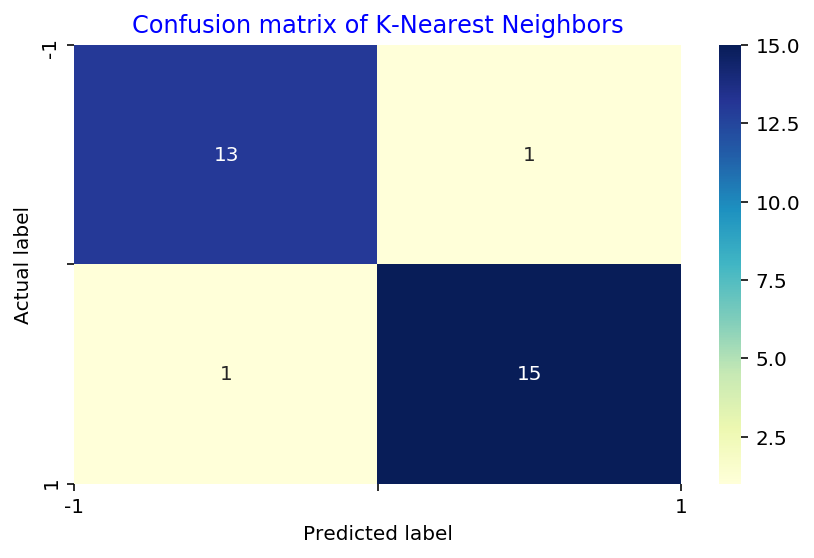

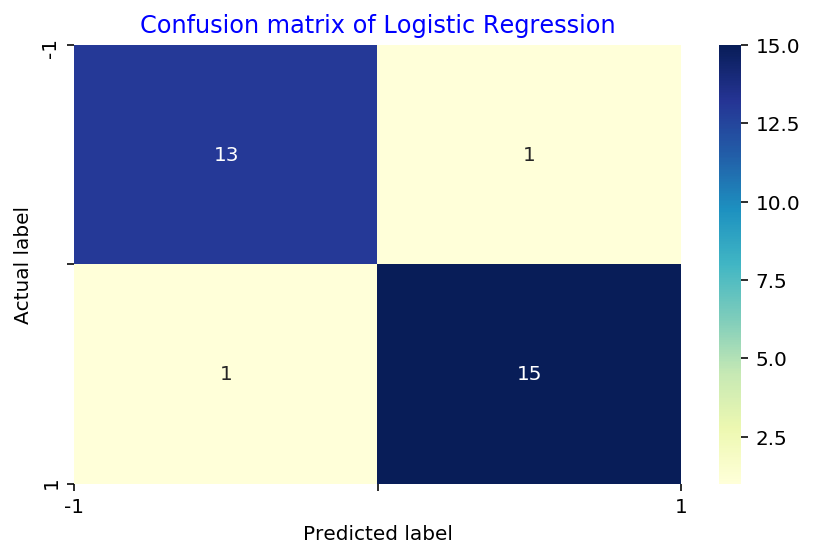

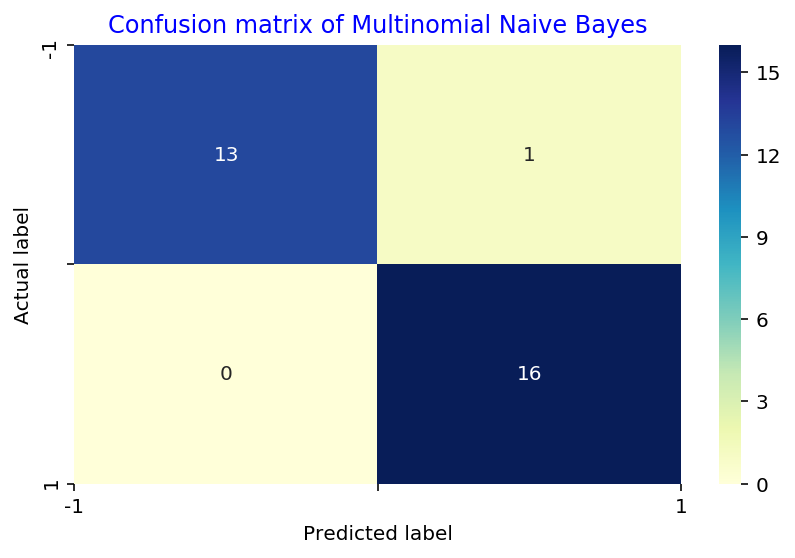

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

machine_learning_models = [
    [KNeighborsClassifier(), 'K-Nearest Neighbors'],
    [LogisticRegression(solver = 'lbfgs'), 'Logistic Regression'],
    [MultinomialNB(), 'Multinomial Naive Bayes']
#     ,
#     [SVC(kernel = 'linear'), 'Support Vector Machine']
]

models_score = []

#กำหนด Default Model ให้เป็น Model ตัวที่ 0 ของ machine_learning_modelsb
selected_model = machine_learning_models[0][0]
check_score = 0

def select_model_highest_acc(model, score):
    global check_score, selected_model
    if score > check_score:
        selected_model = model
        check_score = score
             
for m in machine_learning_models:
    model = m[0]
    model.fit(X_train_selected, y_train)
    y_predict = model.predict(X_test_selected)
    score = model.score(X_test_selected, y_test)
#     score = score * 100
    select_model_highest_acc(model, score)
    models_score.append([score, m[1]])

#     print(f'{m[1]} | score = {score}')
#     print(confusion_matrix(y_test, y_predict))
    show_visualization_confusion_matrix(y_test, y_predict, m[1])

In [29]:
MLs_score_df = pd.DataFrame(models_score, columns=['Accuracy', 'ML_model'])
# MLs_score_df.sort_values('Accuracy', ascending=False)

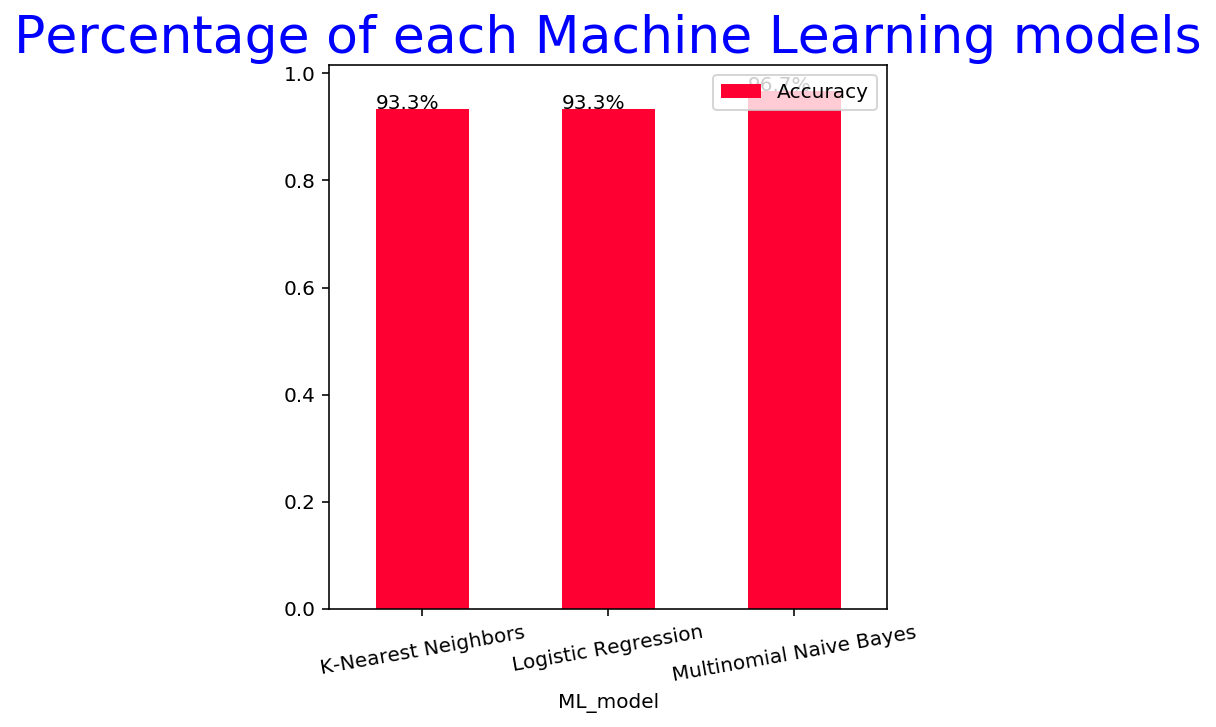

In [30]:
ax = MLs_score_df.plot.bar(x='ML_model', y='Accuracy', rot=10, figsize=(5,5), width = 0.5, color = '#FF0033')
plt.title("Percentage of each Machine Learning models", fontsize = 26, color = "blue")

#show percentage above bar graphs
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.1%}'.format(height), (x, y + height + 0.001))

# --------------------------------------------------------------------------------------------------

# นำ Model ที่มีค่า Accuracy สูงที่สุด มาใช้ทำนายข้อมูลข่าวจริงที่ Scrape มา

In [31]:
#ดึงข้อมูลมาจาก Database ที่ได้ทำการ Scape มาไว้แล้ว
#pip install python-firebase #หลังจากติดตั้งเสร็จแล้ว ให้แก้ชื่อไฟล์ .async ของ firebase ด้วย : https://www.youtube.com/watch?v=TiMACTNbNl8
from firebase import firebase
#pip install DateTime
from datetime import date

#ต้องต่อเน็ตก่อนถึงจะดึงข้อมูลได้ !
url = 'https://cos4105-da928.firebaseio.com/'
action = firebase.FirebaseApplication(url, None)
name_news = "dailynews"
# topic = "politics"
topic = "economics"
unseen_list = []

def read_data(name_news, topic):
    result = action.get('/'+name_news, topic)
    return result

In [32]:
read = read_data(name_news, topic)  

for key in read:
#     print("{}".format(read[key][2]))
    get_date = read[key][2]

In [33]:
scraped_full_data_df = pd.DataFrame.from_dict(read, orient='index', columns=['URL', 'Head', 'Date', 'Content']) 
scraped_full_data_df = scraped_full_data_df.reset_index()
scraped_full_data_df = scraped_full_data_df.rename(columns={"index": "Key"})

In [34]:
size_scrape = len(scraped_full_data_df)
temp_scraped_df = pd.DataFrame(scraped_full_data_df.head(size_scrape))

In [36]:
temp_scraped_df["Cleaned_content"] = temp_scraped_df.Content.map(lambda content_news: "".join(deepcut_and_stopword(content_news)))

คำที่ตัดออก =  ['“']
รวมทั้งหมด 1 คำ
คำที่ตัดออก =  ['อธิบดี', 'กรมทางหลวง', '(', 'ทล.', ')', 'เปิดเผย', 'ความ', 'เรื่อง', 'การ', 'ใช้', 'ความ', 'เร็ว', 'รถ', 'บน', 'ถนน', '4', 'จราจร', 'ขึ้น', 'ไป', 'ได้', 'เกิน', '120', 'กม.', 'ต่อ', 'ชม.', 'จาก', 'เดิม', 'เกิน', '90', 'กม.', 'ต่อ', '.', 'ตาม', 'นโยบาย', 'รมว.', 'คมนาคม', 'ว่า', 'อยู่', 'ระหว่าง', 'ขั้นตอน', 'ออก', 'กฎ', 'กระทรวง', 'โดย', 'สำนักงานคณะกรรมการกฤษฎีกา', 'กำลัง', 'พิจารณา', 'อยู่', 'หาก', 'ตรวจ', 'จะ', 'ส่ง', 'กลับ', 'มา', 'ที่', 'กระทรวงคมนาคม', 'ให้', 'รมว.', 'คมนาคม', 'ลง', 'นาม', 'ให้', 'มี', 'ผล', 'บังคับ', 'ใช้', 'คาด', 'ว่า', 'กฎ', 'กระทรวง', 'จะ', 'ประกาศ', 'ใช้', 'ได้', 'ภาย', 'ใน', 'เดือน', 'พ.ย.', 'นี้', 'และ', 'มี', 'ผล', 'ใช้', 'บังคับ', 'ต่อ', 'ไป', 'ใน', 'ส่วน', 'ของ', 'ทล.', 'เตรียม', 'ความ', 'พร้อม', 'รองรับ', 'การ', 'ใช้', 'ความ', 'เร็ว', '120', 'กม.', 'ต่อ', 'ชม.', 'เพื่อ', 'นำ', 'ร่อง', 'บน', 'ทาง', 'หลวง', 'แผ่นดิน', 'หมายเลข', '32', '(', ')', 'ช่วง', 'บริเวณ', 'หมวด', 'ทาง', '-', 'ทาง', 'ต่าง', 'ระด

คำที่ตัดออก =  ['กรรมการ', 'ผู้', 'จัดการ', '(', ')', 'เปิดเผย', 'ว่า', 'นายก', 'รัฐมนตรี', 'ใน', 'ฐานะ', 'ประธาน', 'ใน', 'งาน', 'มอบ', 'รัฐวิสาหกิจ', 'ประจำ', 'ปี', '2563', 'ซึ่ง', 'จัด', 'ขึ้น', 'โดย', 'สำนักงานคณะกรรมการนโยบายรัฐวิสาหกิจ', '(', 'สคร.', ')', 'ได้', 'ให้', 'เกียรติ', 'เป็น', 'ผู้', 'มอบ', 'รัฐวิสาหกิจ', 'ให้', 'แก่', '(', ')', 'จำนวน', '3', 'ประกอบ', 'ด้วย', '1', '.', 'การ', 'เปิดเผย', 'ข้อมูล', 'และ', 'ความ', '2', '.', 'ความ', 'เพื่อ', 'การ', 'เด่น', 'ด้าน', 'การ', 'ยก', 'ระดับ', 'การ', 'บริหารจัดการ', 'องค์กร', 'ประเภท', 'และ', '3', '.', 'การ', 'สู่', 'รัฐวิสาหกิจ', 'ดิจิทัล', 'ประเภท', 'เกียรติ', 'โดย', 'มี', 'กรรมการ', 'ผู้', 'จัดการ', 'เป็น', 'ผู้', 'แทน', 'ธนาคาร', 'ขึ้น', 'รับ', '"', 'ทั้ง', '3', 'ที่', 'ได้', 'รับ', 'ใน', 'ครั้ง', 'นี้', 'ถือ', 'เป็น', 'การ', 'สะท้อน', 'ความ', 'ใน', 'การ', 'งาน', 'ของ', 'ที่', 'ยังคง', 'งาน', 'ตาม', 'ทำ', 'ให้', 'คน', 'ไทย', 'มี', 'บ้าน', 'เพื่อ', 'ความ', 'สุข', 'และ', 'ความ', 'ให้', 'แก่', 'สถาบัน', 'ครอบครัว', 'ด้วย', 'การ',

คำที่ตัดออก =  ['รอง', 'ผู้', 'จัดการ', 'รักษาการ', 'แทน', 'ผู้', 'จัดการ', 'ธนาคารเพื่อการเกษตรและสหกรณ์การเกษตร', '(', 'ธ.ก.ส.', ')', 'เปิดเผย', 'ว่า', 'มอบ', 'รัฐวิสาหกิจ', 'ประจำ', 'ปี', '2563', 'จัด', 'โดย', 'สำนักงานคณะกรรมการนโยบายรัฐวิสาหกิจ', '(', 'สคร.', ')', 'กระทรวงการคลัง', 'พลเอกประยุทธ์ จันทร์โอชา', 'นายก', 'รัฐมนตรี', 'ได้', 'เป็น', 'ประธาน', 'มอบ', 'รัฐวิสาหกิจ', 'แก่', 'ธ.ก.ส.', 'จำนวน', '7', 'ได้แก่', 'การ', 'บริหารจัดการ', 'องค์กร', 'เด่น', 'ผู้', 'นำ', 'องค์กร', 'การ', 'เปิดเผย', 'ข้อมูล', 'และ', 'ความ', 'การ', 'งาน', 'เพื่อ', 'สังคม', 'และ', 'สิ่ง', 'แวดล้อม', 'ความ', 'เพื่อ', 'การ', 'เด่น', 'ด้าน', 'ความ', 'เชิง', 'ประเภท', 'เด่น', 'การ', 'สู่', 'รัฐวิสาหกิจ', 'ดิจิทัล', 'ประเภท', 'เกียรติ', 'และ', 'บริการ', 'ทั้งนี้', 'สะท้อน', 'ให้', 'เห็น', 'ถึง', 'การ', 'บริหารจัดการ', 'องค์กร', 'ภาย', 'ใต้', 'ความ', 'ใน', 'สภาวะ', 'เศรษฐกิจ', 'สังคม', 'และ', 'การ', 'เมือง', 'ที่', 'ส่ง', 'ผล', 'ต่อ', 'ภาค', 'เกษตร', 'โดย', 'ยังคง', 'ใน', 'การ', 'ขับเคลื่อน', 'บน', 'พื้นฐาน',

คำที่ตัดออก =  ['เมื่อ', 'วัน', 'ที่', '17', 'พ.ย.', 'ผู้', 'สื่อ', 'ข่าว', 'รายงาน', 'ว่า', 'เว็บไซต์', 'ราชกิจจานุเบกษา', 'เผยแพร่', 'ประกาศ', 'กระทรวงคมนาคม', 'เรื่อง', 'กำหนด', 'อัตรา', 'ค่า', 'บริการ', 'อื่น', 'กรณี', 'การ', 'จ้าง', 'โดย', 'มี', 'บริการ', 'สำหรับ', 'รถ', 'ยนต์', 'รับ', 'จ้าง', 'บรรทุก', 'คน', 'โดยสาร', 'เกิน', 'คน', '(', '-', ')', 'ที่', 'จด', 'ทะเบียน', 'ใน', 'เขต', 'กรุงเทพมหานคร', 'พ.ศ.', '2563', 'โดย', 'ที่', 'เป็น', 'การ', 'อัตรา', 'ค่า', 'บริการ', 'อื่น', 'ให้', 'มี', 'ความ', 'มาก', 'ยิ่ง', 'ขึ้น', 'ซึ่ง', 'มี', 'การ', 'ปรับ', 'ค่า', 'บริการ', 'อื่น', 'กรณี', 'การ', 'จ้าง', 'โดย', 'มี', 'บริการ', 'ดัง', 'นี้', '1', '.', 'การ', 'จ้าง', 'ที่', 'มี', 'การ', 'บรรทุก', 'สัมภาระ', 'ที่', 'มี', 'ขนาด', 'ความ', 'กว้าง', 'ความ', 'ยาว', 'หรือ', 'ความ', 'สูง', 'ด้าน', 'ใด', 'ด้าน', 'หนึ่ง', 'เกิน', 'กว่า', '26', 'นิ้ว', 'ขึ้น', 'ไป', 'ให้', 'เรียก', 'เก็บ', 'ค่า', 'บริการ', 'ใน', 'อัตรา', 'ชิ้น', 'ละ', 'เกิน', '20', 'บาท', '2', '.', 'การ', 'จ้าง', 'ที่', 'มี', 'การ', '

คำที่ตัดออก =  ['อธิบดี', '(', ')', 'เปิดเผย', 'ว่า', 'ได้', 'กำหนด', 'แนวทาง', 'เพื่อ', 'เตรียม', 'ความ', 'พร้อม', 'ใน', 'การ', 'ความ', 'การ', 'เดินทาง', 'ให้', 'กับ', 'ประชาชน', 'ที่', 'จะ', 'เดินทาง', 'ใน', 'ช่วง', 'วัน', 'ราชการ', 'เป็น', 'กรณี', 'วัน', 'ที่', '19', '-', '22', 'พ.ย.', '63', 'ตาม', 'นโยบาย', 'ของ', 'รัฐบาล', 'ใน', 'การ', 'เศรษฐกิจ', 'และ', 'การ', 'ซึ่ง', 'อาจ', 'ทำ', 'ให้', 'ประชาชน', 'จำนวน', 'มาก', 'ใช้', 'รถ', 'ใช้', 'ถนน', 'เดินทาง', 'ท่องเที่ยว', 'และ', 'เดินทาง', 'กลับ', 'ภูมิลำเนา', 'โดย', 'ได้', 'มี', 'แนวทาง', 'การ', 'บน', 'โครงข่าย', 'ทาง', 'หลวง', 'ที่', 'มี', 'ประมาณ', '48', ',', 'กม.', 'ทั่ว', 'ประเทศ', 'ให้', 'พร้อม', 'ดัง', 'นี้', '1', '.', '/', 'ถนน', '/', 'สะพาน', 'ใน', 'ความ', 'ให้', 'มี', 'ความ', 'และ', 'ปลอด', 'ไร้', 'หลุม', 'บ่อ', 'มี', 'เครื่องหมาย', 'จราจร', 'อุปกรณ์', 'ความ', 'ปลอด', 'และ', 'ไฟฟ้า', 'แสง', 'สว่าง', 'ไฟ', 'สัญญาณ', 'จราจร', 'ครบถ้วน', '2', '.', 'นำ', 'เข้า', 'ข้อมูล', 'สถิติ', 'ที่', 'เกิด', 'ช่วง', 'วัน', 'ที่', '19', '-', '2

คำที่ตัดออก =  ['ประธาน', 'สภาอุตสาหกรรมแห่งประเทศไทย', '(', ')', 'เปิดเผย', 'ผล', 'การ', 'สำรวจ', 'ดัชนี', 'ความ', 'เชื่อมั่น', 'ภาค', 'อุตสาหกรรม', 'เดือน', 'ต.ค.', '63', 'ว่า', 'ขณะ', 'นี้', 'ผู้', 'ประกอบ', 'การ', 'ภาค', 'เอกชน', 'สถานการณ์', 'ค่า', 'เงิน', 'บาท', 'กลับ', 'มา', 'ค่า', 'ขึ้น', 'ต่อเนื่อง', 'เคลื่อนไหว', 'อยู่', 'ที่', 'ประมาณ', '30', 'บาท', 'กว่า', 'ต่อ', 'ดอลลาร์', 'สหรัฐ', 'ค่า', 'ขึ้น', 'ถึง', '8', '.', '20', '%', '(', 'ตั้งแต่', 'วัน', 'ที่', '1', 'เม.ย.', '–', '16', 'พ.ย.', ')', 'สูง', 'เป็น', 'อันดับ', '4', 'เมื่อ', 'เทียบ', 'ใน', 'ส่ง', 'ผล', 'ให้', 'ขีด', 'ความ', 'สามารถ', 'การ', 'ส่ง', 'ออก', 'ของ', 'ไทย', 'ลง', 'อย่าง', 'มาก', 'เนื่อง', 'จาก', 'คู่แข่ง', 'ทาง', 'การ', 'ค้า', 'ของ', 'ไทย', 'เช่น', 'เวียดนาม', 'ค่า', 'เพียง', '1', '.', '66', '%', 'เท่า', 'นั้น', 'ทำ', 'ให้', 'สินค้า', 'ไทย', 'กว่า', 'ประเทศ', 'อื่น', 'ทันที', 'จึง', 'ให้', 'หน่วย', 'งาน', 'ที่', 'เกี่ยวข้อง', 'โดย', 'เฉพาะ', '(', ')', 'เข้า', 'มา', 'สถานการณ์', 'ค่า', 'เงิน', 'ให้', 'ค่า', '

คำที่ตัดออก =  ['ดัชนี', 'หุ้น', 'ไทย', 'วัน', 'ที่', '17', 'พ.ย.', '63', 'ปิด', 'ตลาด', 'ที่', '1', ',', '.', '81', 'จุด', 'ลง', '1', '.', '25', 'จุด', 'หรือ', '0', '.', '09', '%', 'ด้วย', 'มูลค่า', '90', ',', '.', '63', 'ล้าน', 'บาท', 'ส่วน', 'ปิด', 'ที่', '.', '20', 'จุด', 'ลง', '1', '.', '37', 'จุด', 'หรือ', '0', '.', '43', '%', 'ด้วย', 'มูลค่า', 'ซื้อขาย', '1', ',', '.', '22', 'ล้าน', 'บาท', 'โดย', 'หลักทรัพย์', 'ที่', 'มี', 'มูลค่า', 'การ', 'ซื้อขาย', 'สูง', 'สุด', '5', 'อันดับ', 'ได้แก่', 'ปิด', '72', '.', '75', 'บาท', 'ลง', '2', '.', '25', 'บาท', ',', 'ปิด', '94', 'บาท', 'ลง', '0', '.', '75', 'บาท', ',', 'ปิด', '23', '.', '70', 'บาท', 'ลง', '0', '.', '50', 'บาท', ',', 'พี', 'ปิด', '39', 'บาท', 'เปลี่ยนแปลง', ',', 'ปิด', '66', 'บาท', 'เพิ่ม', 'ขึ้น', '0', '.', '25', 'บาท', 'ข่าว', 'จาก', 'เปิดเผย', 'ว่า', 'บรรยากาศ', 'หุ้น', 'ไทย', 'วัน', 'ที่', '17', 'พ.ย.', '63', 'ใน', 'แดน', 'และ', 'ลบ', 'โดย', 'ปิด', 'ตลาด', 'ช่วง', 'เช้า', 'เคลื่อนไหว', 'ใน', 'แดน', 'ตอบ', 'รับ', 'รายงาน', 

คำที่ตัดออก =  ['ผู้', 'การ', 'อัญมณี', 'และ', 'เครื่อง', 'ประดับ', 'แห่ง', 'ชาติ', '(', 'องค์การมหาชน', ')', 'หรือ', 'เปิดเผย', 'ว่า', 'ได้', 'จัด', 'งาน', 'แสดง', 'สินค้า', 'อัญมณี', 'และ', 'เครื่อง', 'ประดับ', 'ใน', 'งาน', 'บาย', 'หรือ', 'กลาง', 'เมือง', 'ณ', 'ลาน', 'กิจกรรม', 'ชั้น', 'จี', 'ย่าน', 'ทาวน์', 'ระหว่าง', 'วัน', 'ที่', '16', '–', '22', 'พ.ย.', '2563', 'โดย', 'คัดสรร', 'อัญมณี', 'และ', 'เครื่อง', 'ประดับ', 'จาก', 'ผู้', 'ประกอบ', 'การ', 'ที่', 'เข้า', 'ร่วม', 'โครงการ', 'ซื้อ', 'ด้วย', 'ความ', 'และ', 'เครื่อง', 'ประดับ', 'จาก', 'ผู้', 'ประกอบ', 'การ', 'ที่', 'เข้า', 'ร่วม', 'โครงการ', 'เครื่อง', 'ประดับ', 'เอกลักษณ์', 'ทาง', 'วัฒนธรรม', 'แห่ง', 'ดินแดน', '(', 'อีสาน', ')', 'รวม', '30', 'คูหา', 'มา', 'จำหน่าย', 'เพิ่ม', 'ช่วย', 'เพิ่ม', 'ช่องทาง', 'การ', 'ขาย', 'เพิ่ม', 'ราย', 'ได้', 'ให้', 'กับ', 'ผู้', 'ผลิต', 'ผู้', 'ประกอบ', 'การ', 'ที่', 'ได้', 'รับ', 'ผล', 'จาก', 'การ', 'แพร่', 'ของ', '-', '19', 'ทั้งนี้', 'ของ', 'การ', 'จัด', 'งาน', 'ใน', 'ครั้ง', 'นี้', 'ผู้', 'ผล

คำที่ตัดออก =  ['ประธาน', 'คณะ', 'เจ้าหน้าที่', 'ด้าน', 'ธุรกิจ', 'สินเชื่อ', 'ยาน', 'ยนต์', 'เปิดเผย', 'ว่า', 'ได้', 'เปิด', 'ตัว', 'แอพพลิเคชั่น', 'ใหม่', 'Application', 'by', 'ซึ่ง', 'ภาย', 'ใน', 'แอพ', 'สามารถ', 'เข้า', 'ถึง', '3', 'ผลิตภัณฑ์', 'ดิจิทัล', 'ของ', 'ได้', 'เพียง', 'ปลาย', 'นิ้ว', 'ได้แก่', 'ประเมิน', 'วง', 'เงิน', 'สินเชื่อ', 'รถ', 'ยนต์', 'ใหม่', 'รถ', 'ยนต์', 'รถ', 'จักรยาน', 'ยนต์', 'และ', 'พร้อม', 'สตาร์ท', 'สมัคร', 'สินเชื่อ', 'เพื่อ', 'คน', 'มี', 'รถ', 'และ', 'เชื่อม', 'ต่อ', 'สู่', 'บริการ', 'บน', 'เว็บไซต์', 'จาก', 'ตั้ง', 'เป้า', 'ดาวน์', 'โหลด', 'รวม', '1', 'ล้าน', 'ครั้ง', 'ภาย', 'ใน', 'สิ้น', 'ปี', '64', 'นอก', 'จาก', 'นี้', 'ใน', 'เร็วๆ นี้', 'มี', 'แผนที่', 'จะ', 'ขยาย', 'บริการ', 'ไลฟ์สไตล์', 'อื่น', 'ๆ', 'เช่น', 'การ', 'ร่วม', 'กับ', 'ผู้', 'นำ', 'แพลตฟอร์ม', 'The', '1', 'การ', 'นัดหมาย', 'เพื่อ', 'นำ', 'รถ', 'เข้า', 'กับ', 'พันธมิตร', 'รถ', 'ยนต์', 'ตลอดจน', 'เสริม', 'บริการ', 'ที่ปรึกษา', 'ด้าน', 'การ', 'และ', 'พร้อม', 'ต่อ', 'บริการ', 'สินเชื่อ', 'ย

คำที่ตัดออก =  ['ผู้', 'การ', 'ธนาคารออมสิน', 'เปิดเผย', 'ใน', 'การ', 'แถลง', 'ข่าว', 'ร่วม', 'ทุน', 'ระหว่าง', 'ธนาคารออมสิน', 'กับ', 'บริษัท', 'เงิน', 'บริษัท', 'ว่า', 'การ', 'ร่วม', 'ทุน', 'ครั้ง', 'นี้', 'จะ', 'ช่วย', 'ทำ', 'ให้', 'ประชาชน', '6', 'ล้าน', 'คน', 'ได้', 'รับ', 'เพราะ', 'ทำ', 'ให้', 'การ', 'ผู้', 'กู้', 'เงิน', 'สินเชื่อ', 'จำนำ', 'ทะเบียน', 'รถ', 'ที่', 'อยู่แล้ว', 'ประมาณ', '3', 'ล้าน', 'คน', 'ได้', 'รับ', 'ดอกเบี้ย', 'ที่', 'ลง', 'จาก', 'เฉลี่ย', '24', '%', 'เหลือ', 'เพียง', '18', '%', 'รวม', 'ถึง', 'ช่วย', 'ให้', 'คน', 'ที่', 'กู้', 'เงิน', 'ได้', 'มี', 'เข้า', 'มา', 'ขอ', 'สินเชื่อ', 'โครงการ', 'จำนำ', 'ทะเบียน', 'รถ', 'ยนต์', 'ของ', 'ออมสิน', 'ได้', 'อีก', 'ด้วย', '“', 'โครงการ', 'นี้', 'เป็น', 'ส่วน', 'หนึ่ง', 'ของ', 'การ', 'ไป', 'เป็น', 'ธนาคาร', 'เพื่อ', 'สังคม', 'ของ', 'ออมสิน', 'และ', 'เป็น', 'ไป', 'ตาม', 'นโยบาย', 'รัฐบาล', 'ที่', 'แหล่ง', 'เงิน', 'ทุน', 'และ', 'นอก', 'ระบบ', 'ให้', 'กับ', 'ชาว', 'บ้าน', 'เพราะ', 'เชื่อ', 'ว่า', 'หลัง', 'จาก', 'ออม', 'สิน',

คำที่ตัดออก =  ['เลขานุการ', '(', ')', 'เปิดเผย', 'ว่า', 'ที่', 'ประชุม', 'มี', 'ความ', 'ต่อ', 'สถานการณ์', 'ค่า', 'เงิน', 'บาท', 'ปรับ', 'ค่า', 'ขึ้น', 'เร็ว', 'จาก', 'นัก', 'ลง', 'ทุน', 'ต่าง', 'ชาติ', 'ที่', 'กลับ', 'มา', 'ลง', 'ทุน', 'ใน', 'สินทรัพย์', 'ของ', 'กลุ่ม', 'ประเทศ', 'เกิด', 'ใหม่', 'หลัง', 'ผล', 'เลือกตั้ง', 'ประธานาธิบดี', 'สหรัฐ', 'และ', 'ความ', 'วัคซีน', '-', '19', 'ซึ่ง', 'อาจ', 'ต่อ', 'การ', 'ของ', 'เศรษฐกิจ', 'โดย', 'เงิน', 'บาท', 'ค่า', 'เร็ว', 'อาจ', 'ต่อ', 'การ', 'ของ', 'เศรษฐกิจ', 'ที่', 'ยัง', 'จึง', 'เห็น', 'ควร', 'ให้', 'ติดตาม', 'ตลาด', 'อัตรา', 'แลกเปลี่ยน', 'และ', 'เงิน', 'ทุน', 'เคลื่อนย้าย', 'อย่าง', 'ใกล้ชิด', 'รวม', 'ทั้ง', 'พิจารณา', 'ความ', 'จำเป็น', 'ของ', 'การ', 'มาตรการ', 'ที่', 'เพิ่มเติม', 'ทั้งนี้', 'ได้', 'หารือ', 'กัน', 'เรื่อง', 'เงิน', 'บาท', 'ค่า', 'เร็ว', 'กัน', 'อย่าง', 'มาก', 'ซึ่ง', 'อาจ', 'ต่อ', 'การ', 'ฟื้น', 'ตัว', 'เศรษฐกิจ', 'ให้', 'นโยบาย', 'เพิ่มเติม', 'เพราะ', 'มี', 'เงิน', 'ทุน', 'ไหล', 'เข้า', 'จาก', 'นัก', 'ลง', 'ทุน', 'ต่

คำที่ตัดออก =  ['ดัชนี', 'หุ้น', 'ไทย', 'วัน', 'ที่', '18', 'พ.ย.', '63', 'ปิด', 'ตลาด', 'ที่', '1', ',', '364', '.', '59', 'จุด', 'เพิ่ม', 'ขึ้น', '14', '.', '78', 'จุด', 'หรือ', '1', '.', '09', '%', 'ด้วย', 'มูลค่า', '66', ',', '.', '72', 'ล้าน', 'บาท', 'ส่วน', 'ปิด', 'ที่', '.', '96', 'จุด', 'เพิ่ม', 'ขึ้น', '2', '.', '76', 'จุด', 'หรือ', '0', '.', '88', '%', 'ด้วย', 'มูลค่า', 'ซื้อขาย', '1', ',', '.', '19', 'ล้าน', 'บาท', 'ดัชนี', 'ใน', 'แดน', 'และ', 'ลบ', 'โดย', 'ปิด', 'ตลาด', 'ช่วง', 'เช้า', 'ยัง', 'เคลื่อนไหว', 'ใน', 'แดน', 'ลบ', 'จาก', 'ความ', 'การ', 'ชุมนุม', 'ทาง', 'การ', 'เมือง', 'ใน', 'ประเทศ', 'ที่', 'อาจ', 'มี', 'ความ', 'เกิด', 'ขึ้น', 'และ', 'ผล', 'การ', 'ประชุม', 'ยังคง', 'อัตรา', 'ดอกเบี้ย', 'นโยบาย', 'ที่', 'ระดับ', '0', '.', '50', '%', 'รวม', 'ทั้ง', 'ใน', 'ต่าง', 'ประเทศ', 'มี', 'ผู้', 'ติด', '-', '19', 'โดย', 'เฉพาะ', 'สหรัฐอเมริกา', 'จาก', 'นั้น', 'ใน', 'ช่วง', 'บ่าย', 'ดัชนี', 'เริ่ม', 'ปรับ', 'ตัว', 'ขึ้น', 'จาก', 'การ', 'เข้า', 'ซื้อ', 'เพื่อ', 'หวัง', 'เก็ง', 

คำที่ตัดออก =  ['ผู้', 'ว่าการ', 'การท่องเที่ยวแห่งประเทศไทย', '(', ')', 'เปิดเผย', 'ว่า', 'ที่', 'ประชุม', 'เห็น', 'มาตรการ', 'การ', 'ท่องเที่ยว', 'สำหรับ', 'นัก', 'ท่องเที่ยว', 'ต่าง', 'ชาติ', 'เรื่อง', 'แรก', 'คือ', 'มาตรการ', 'การ', 'ท่องเที่ยว', 'สำหรับ', 'นัก', 'ท่องเที่ยว', 'ต่าง', 'ชาติ', '(', 'Thailand', 'Package', ')', 'โดย', 'การ', 'ร่วม', 'กับ', 'และ', 'มี', 'ข้อ', 'เสนอ', 'ทำ', 'ใน', 'ลักษณะ', 'บริการ', 'ครบ', 'วงจร', 'ทั้ง', 'การ', 'จอง', 'ตั๋ว', 'เครื่อง', 'บิน', 'การ', 'ขอ', 'วีซ่า', 'และ', 'กระบวน', 'การ', 'เดินทาง', 'เข้า', 'ประเทศ', 'การ', 'จอง', 'โรง', 'แรม', '/', 'ที่', 'พัก', '/', 'สถานที่', 'ตัว', 'ทาง', 'เลือก', '(', ')', 'และ', 'บริการ', 'ท่องเที่ยว', 'ทั้งนี้', 'ใน', 'มาตรการ', 'นี้', 'นัก', 'ท่องเที่ยว', 'สามารถ', 'เข้า', 'มา', 'ดู', 'เว็บไซต์', 'ของ', 'การบินไทย', 'และ', 'โดย', 'มี', 'ให้', 'เลือก', '3', 'อย่าง', 'คือ', 'พัก', '2', 'คืน', '1', 'คืน', 'ใน', 'กรุงเทพฯ', ',', 'พัก', '2', 'คืน', '1', 'คืน', 'ใน', 'กรุงเทพฯ', 'และ', 'เดินทาง', 'ไป', 'พัก', 'อื่น'

คำที่ตัดออก =  ['ผู้', 'จัดการ', 'วีซ่า', 'ประจำ', 'ประเทศไทย', 'เปิดเผย', 'ว่า', 'วีซ่า', 'ได้', 'สำรวจ', 'และ', 'เผย', 'สถิติ', 'ใหม่', 'ด้าน', 'พฤติกรรม', 'ไร้', 'เงิน', 'สด', 'ของ', 'ผู้', 'บริโภค', 'ชาว', 'ไทย', 'โดย', 'คน', 'ไทย', 'แตะ', 'เพื่อ', 'จ่าย', 'บัตร', 'วี', 'มาก', 'กว่า', '2', 'ล้าน', 'ครั้ง', 'ใน', 'เดือน', 'ก.ย.', '63', 'ที่', 'มา', 'หรือ', 'มาก', 'กว่า', '10', '%', 'จาก', 'การ', 'ชำระ', 'เงิน', 'ณ', 'จุด', 'ขาย', 'ของ', 'วีซ่า', 'ทั้งหมด', 'ซึ่ง', 'การ', 'เพิ่ม', 'ขึ้น', 'ของ', 'จำนวน', 'การ', 'ทำ', 'ธุรกรรม', 'บัตร', 'ของ', 'วีซ่า', 'สอดคล้อง', 'กับ', 'ผล', 'สำรวจ', 'ฉบับ', 'ล่าสุด', 'เกี่ยว', 'กับ', 'การ', 'เรื่อง', 'ทัศนคติ', 'การ', 'ชำระ', 'เงิน', 'ของ', 'ผู้', 'บริโภค', 'ประจำ', 'ปี', 'ของ', 'วีซ่า', '(', 'Visa', ')', 'ที่', 'ระบุ', 'ว่า', '8', 'ใน', '10', 'ของ', 'ผู้', 'บริโภค', 'ชาว', 'ไทย', 'หรือ', '79', '%', 'ชำระ', 'เงิน', 'ใน', 'รูปแบบ', 'มาก', 'กว่า', 'เมื่อ', '2', 'ปี', 'ที่', 'มา', 'นอก', 'จาก', 'นี้', '4', 'ใน', '5', 'ของ', 'ผู้', 'ทำ', 'แบบ', 'สอบถาม

คำที่ตัดออก =  ['กระทรวงพาณิชย์', 'โดย', 'ค้า', 'ติด', 'เครื่อง', 'ช่วย', 'ผู้', 'ประกอบ', 'การ', 'ชุมชน', 'เตรียม', 'จัด', 'งาน', 'สุด', 'แห่ง', 'ปี', '“', 'ของ', '”', 'ครั้ง', 'ที่', '1', 'ระหว่าง', '2', '-', '6', 'ธันวาคม', 'นี้', 'ณ', '7', '-', '8', 'ผู้', 'ประกอบ', 'การ', 'มา', 'จำหน่าย', 'สินค้า', 'กว่า', '400', 'คูหา', 'โชว์', 'สุด', 'ผลิตภัณฑ์', 'กว่า', '10', ',', 'รายการ', 'จาก', 'ทุก', 'ภูมิภาค', 'ทั่ว', 'ประเทศ', 'พร้อม', 'แสดง', 'กระทรวงพาณิชย์', 'นำ', 'สินค้า', 'ผล', 'งาน', 'เด่น', 'ของ', 'ผู้', 'ประกอบ', 'การ', 'ที่', 'แต่ละ', 'หน่วย', 'งาน', 'ภาย', 'ใต้', 'กระทรวง', 'ฯ', 'มา', 'ร่วม', 'จำหน่าย', 'ไฮไลต์', 'พบ', 'กับ', 'สุด', 'ดีไซเนอร์', 'ระดับ', 'ประเทศ', '‘', 'หมู', 'ว่า', '’', 'เสื้อผ้า', 'จาก', 'ผลิตภัณฑ์', 'ใน', 'รูปแบบ', 'ร่วม', 'สมัย', 'นายวีรศักดิ์', ' หวัง', 'รัฐมนตรี', 'ช่วย', 'ว่าการ', 'กระทรวงพาณิชย์', 'เปิดเผย', 'ว่า', '“', 'กระทรวงพาณิชย์', 'โดย', 'ค้า', 'จะ', 'จัด', 'งาน', '“', 'ของ', 'ทั่ว', 'ไทย', 'ครั้ง', 'ที่', '1', '”', 'Thailand', '’', 's', 'โดย', 'ร

คำที่ตัดออก =  [' ผู้', 'ช่วย', 'ผู้', 'จัดการ', 'ใหญ่', 'ธนาคารกรุงเทพ', 'เปิดเผย', 'ว่า', 'ธนาคาร', 'กับ', 'โดย', 'เป็น', 'ตัว', 'แทน', 'ธนาคาร', '(', ')', 'เพื่อ', 'ขยาย', 'ฐาน', 'ลูกค้า', 'จาก', 'ปัจจุบัน', 'มี', 'กว่า', '17', 'ล้าน', 'บัญชี', 'ให้', 'สามารถ', 'ฝาก', 'เงิน', 'เงิน', 'สด', 'เคาน์เตอร์', 'ชำระ', 'เงิน', 'ของ', 'เพิ่มเติม', 'จาก', 'สาขา', 'และ', 'เครื่อง', 'ฝาก', 'เงิน', 'สด', 'อัตโนมัติ', 'โดย', 'ปัจจุบัน', 'สามารถ', 'ใช้', 'บริการ', 'ฝาก', 'เงิน', 'สด', 'ใน', 'ได้', 'กว่า', '90', '%', 'หรือ', 'มาก', 'กว่า', '1', ',', '800', 'สาขา', 'และ', 'ภาย', 'ใน', 'สิ้น', 'ปี', 'นี้', 'จะ', 'ขยาย', 'บริการ', 'ให้', 'ครบ', 'ทั้ง', 'กว่า', '2', ',', 'สาขา', 'ทั่ว', 'ประเทศ', 'ผู้', 'จัดการ', 'อาวุโส', 'ฝ่าย', 'ธุรกิจ', 'บริการ', 'กล่าว', 'ว่า', 'ลูกค้า', 'ที่', 'ฝาก', 'หรือ', 'เงิน', 'สด', 'ช่องทาง', 'เคาน์เตอร์', 'ชำระ', 'เงิน', 'ของ', 'จะ', 'ต้อง', 'แสดง', 'บัตร', 'ประจำ', 'ตัว', 'ประชาชน', 'ชนิด', 'การ์ด', 'ที่', 'มี', 'และ', 'แจ้ง', 'เลข', 'ที่', 'บัญชี', 'สะสม', 'ทรัพย์', 'หร

คำที่ตัดออก =  ['ดัชนี', 'หุ้น', 'ไทย', 'วัน', 'ที่', '19', 'พ.ย.', '63', 'ปิด', 'ตลาด', 'ที่', '1', ',', '.', '42', 'จุด', 'เพิ่ม', 'ขึ้น', '4', '.', '83', 'จุด', 'หรือ', '0', '.', '35', '%', 'ด้วย', 'มูลค่า', '82', ',', '.', '27', 'ล้าน', 'บาท', 'ส่วน', 'ปิด', 'ที่', '.', '56', 'จุด', 'เพิ่ม', 'ขึ้น', '1', '.', '60', 'จุด', 'หรือ', '0', '.', '50', '%', 'ด้วย', 'มูลค่า', 'ซื้อขาย', '2', ',', '.', '64', 'ล้าน', 'บาท', 'เคลื่อนไหว', 'ใน', 'แดน', 'โดย', 'ช่วง', 'เช้า', 'ดัชนี', 'ปรับ', 'ขึ้น', 'เล็กน้อย', 'และ', 'ปรับ', 'ขึ้น', 'ต่อเนื่อง', 'ใน', 'ช่วง', 'บ่าย', 'ตอบ', 'รับ', 'ปัจจัย', 'ระยะ', 'สั้น', 'เมื่อ', 'วาน', 'นี้', 'จาก', 'คง', 'อัตรา', 'ดอกเบี้ย', '0', '.', '50', '%', 'ตาม', 'ที่', 'คาด', 'การณ์', 'ไว้', 'รวม', 'ทั้ง', 'การ', 'ประชุม', 'รัฐสภา', 'มี', 'มติ', 'รับ', 'ร่าง', 'รัฐธรรมนูญ', 'ฉบับ', 'ที่', '1', 'และ', '2', 'รวม', 'ทั้ง', 'ตอบ', 'รับ', 'ปัจจัย', 'จาก', 'ความ', 'ใน', 'การ', 'วัคซีน', 'แม้', 'ก่อนหน้า', 'นี้', 'ตลาด', 'มี', 'การ', 'ตอบ', 'รับ', 'ไป', 'ก่อน', 'ใน', 'ช่ว

คำที่ตัดออก =  ['รายงาน', 'จาก', 'กระทรวงพาณิชย์', 'เปิดเผย', 'ว่า', 'ผล', 'การ', 'เปิด', 'รับฟัง', 'ความ', 'คิดเห็น', 'จาก', 'ผู้', 'ผลิต', 'ผู้', 'นำ', 'เข้า', 'และ', 'หน่วย', 'งาน', 'ที่', 'เกี่ยวข้อง', 'เกี่ยว', 'กับ', 'ผล', 'ที่', 'อาจ', 'เกิด', 'ขึ้น', 'จาก', 'การ', 'ใช้', 'มาตรการ', 'การ', '(', ')', 'สินค้า', 'บรรจุภัณฑ์', '(', ')', 'เมื่อ', 'วัน', 'ที่', '17', 'พ.ย.', '63', 'พบ', 'ว่า', 'มี', 'ผู้', 'ประกอบ', 'การ', 'หลาย', 'ราย', 'ทำ', 'การ', 'การ', 'ออก', 'เช่น', 'บรรจุภัณฑ์', 'พลาสติก', 'ชนิด', 'เทป', 'กาว', 'กระดาษ', 'นอก', 'จาก', 'นี้', 'ยัง', 'ว่า', 'จะ', 'ทำ', 'ให้', 'ต้นทุน', 'การ', 'ผลิต', 'สินค้า', 'เพิ่ม', 'ขึ้น', 'และ', 'ทำ', 'ให้', 'ประชาชน', 'ได้', 'รับ', 'ความ', 'เช่น', 'อาหาร', 'เครื่อง', 'ดื่ม', 'ขนม', 'กึ่ง', 'สำเร็จรูป', 'ยา', 'และ', 'ของ', 'ใช้', 'ส่วน', 'บุคคล', 'และ', 'ของ', 'ใช้', 'ใน', 'ครัวเรือน', 'เนื่อง', 'จาก', 'ผู้', 'ผลิต', 'สินค้า', 'จะ', 'ต้อง', 'จ่าย', 'ต้นทุน', 'การ', 'ทำ', 'บรรจุภัณฑ์', 'ที่', 'ขึ้น', 'และ', 'หาก', 'รับ', 'ภาระ', 'ต้นทุน', 'ได

คำที่ตัดออก =  ['รอง', 'กรรมการ', 'ผู้', 'จัดการ', 'ใหญ่', 'ฝ่าย', 'บริหาร', 'การ', 'เดิน', 'รถ', '(', ')', 'เปิดเผย', 'ว่า', 'ได้', 'จัด', 'โดยสาร', '(', 'รถ', ',', 'รถ', 'ร่วม', ',', 'รถ', 'ตู้', ')', 'เพื่อ', 'รองรับ', 'การ', 'เดินทาง', 'ของ', 'ผู้', 'โดยสาร', 'ใน', 'วัน', 'นี้', '(', '20', 'พ.ย.', '63', ')', 'คาด', 'ว่า', 'จะ', 'มี', 'ผู้', 'โดยสาร', 'เดินทาง', 'ประมาณ', '52', ',', 'คน', 'ส่วน', 'มาก', 'จะ', 'เป็น', 'ผู้', 'โดยสาร', 'ที่', 'ใช้', 'บริการ', 'รถ', 'โดยสาร', 'ใน', 'ระยะ', 'ทาง', 'สั้น', 'ๆ', 'เช่น', 'จ.นครราชสีมา', ',', 'นครสวรรค์', ',', 'สระบุรี', 'และ', 'ส่วน', 'ถ้า', 'เป็น', 'การ', 'เดินทาง', 'รถ', 'โดยสาร', 'ใน', 'ระยะ', 'ทาง', 'ยาว', 'จะ', 'เป็น', 'กลุ่ม', 'นัก', 'ท่องเที่ยว', 'มาก', 'กว่า', 'ขณะ', 'นี้', 'ใน', 'เส้นทาง', 'ที่', 'ได้', 'รับ', 'ความ', 'จำนวน', 'มาก', 'จะ', 'เป็น', 'พื้นที่', 'ภาค', 'เหนือ', 'เพราะ', 'มี', 'อากาศ', 'ที่', 'หนาวเย็น', 'เช่น', 'เส้นทาง', 'กรุงเทพฯ', '-', 'เชียงใหม่', 'และ', 'กรุงเทพฯ', '-', 'น่าน', 'ขณะ', 'ที่', 'ถ้า', 'เป็น', 'กลุ่ม

คำที่ตัดออก =  ['รอง', 'อธิบดี', 'กรมการขนส่งทางบก', 'และ', 'โฆษก', 'กรมการขนส่งทางบก', '(', 'ขบ.', ')', 'เปิดเผย', 'ว่า', 'ตาม', 'ประกาศ', 'กระทรวงคมนาคม', 'เรื่อง', 'กำหนด', 'อัตรา', 'ค่า', 'บริการ', 'อื่น', 'กรณี', 'การ', 'จ้าง', 'โดย', 'มี', 'บริการ', 'สำหรับ', 'รถ', 'ยนต์', 'รับ', 'จ้าง', 'บรรทุก', 'คน', 'โดยสาร', 'เกิน', 'คน', '(', '-', ')', 'ที่', 'จด', 'ทะเบียน', 'ใน', 'เขต', 'กรุงเทพมหานคร', 'พ.ศ.', '2563', 'นั้น', 'ได้', 'กำหนด', 'อัตรา', 'ค่า', 'บรรทุก', 'สัมภาระ', 'ไว้', 'โดย', 'เฉพาะ', 'การ', 'ใช้', 'บริการ', 'รถ', 'แท็กซี่', 'จาก', 'หรือ', 'ท่าอากาศยานสุวรรณภูมิ', 'หรือ', 'การ', 'จ้าง', 'จาก', 'สถานที่', 'อื่น', 'ไป', 'ยัง', 'หรือ', 'ท่าอากาศยานสุวรรณภูมิ', 'เท่า', 'นั้น', 'และ', 'มี', 'ผล', 'ใช้', 'บังคับ', 'เมื่อ', 'วัน', 'ที่', '17', 'พ.ย.', 'ที่', 'มา', 'ส่วน', 'การ', 'ใช้', 'บริการ', 'รถ', 'แท็กซี่', 'เส้นทาง', 'ใน', 'เมือง', 'ทั่วไป', 'ที่', 'ได้', 'มี', 'ต้นทาง', 'หรือ', 'ปลาย', 'ทาง', 'ไป', 'ยัง', 'ท่า', 'อากาศยาน', 'ทั้ง', 'สอง', 'แห่ง', 'จะ', 'มี', 'เพียง', 'ค่า

คำที่ตัดออก =  ['ตลาด', 'หุ้น', 'ไทย', 'ภาค', 'เช้า', '20', 'พ.ย.', '63', 'บรรยากาศ', 'การ', 'ลง', 'ทุน', 'ช่วง', 'เช้า', 'ดัชนี', 'อยู่', 'ใน', 'แดน', 'โดย', 'ปิด', 'ตลาด', 'ภาค', 'เช้า', 'ดัชนี', 'อยู่', 'ที่', '1', ',', '.', '23', 'จุด', 'เพิ่ม', 'ขึ้น', '8', '.', '81', 'จุด', 'มูลค่า', 'การ', 'ซื้อขาย', '41', ',', '.', '03', 'ล้าน', 'บาท', 'โดย', 'เปิดเผย', 'ว่า', 'แนวโน้ม', 'ตลาด', 'หุ้น', 'ไทย', 'วัน', 'นี้', 'ตัว', 'ใน', 'กรอบ', 'แคบ', 'เนื่อง', 'จาก', 'ต่าง', 'ประเทศ', 'กำลัง', 'ระหว่าง', 'ผล', 'จาก', 'การ', 'มี', 'วัคซีน', 'กับ', 'การ', 'ติด', 'เพิ่ม', 'ขึ้น', 'ใน', 'สหรัฐ', '-', 'ยุโรป', 'ตลาด', 'หุ้น', 'ไทย', 'มี', 'ปัจจัย', 'คือ', 'การ', 'ฟื้น', 'ตัว', 'ของ', 'และ', 'เศรษฐกิจ', 'โดย', 'การ', 'ล็อก', 'ดาวน์', 'ใน', 'สหรัฐ', 'และ', 'ยุโรป', 'จาก', 'การ', 'ติด', '-', '19', 'ตลาด', 'หุ้น', 'ทั้ง', 'สอง', 'โซน', 'แต่', 'ตลาด', 'เกิด', 'ใหม่', 'ส่วน', 'ใหญ่', 'รับ', 'รู้', 'ข่าว', 'ใน', 'เรื่อง', 'ความ', 'ของ', 'วัคซีน', 'มาก', 'กว่า', 'จึง', 'มี', 'เงิน', 'ทุน', 'ไหล', 'เข้า', '

คำที่ตัดออก =  ['ผู้', 'การ', 'อัญมณี', 'และ', 'เครื่อง', 'ประดับ', 'แห่ง', 'ชาติ', '(', 'องค์การมหาชน', ')', 'หรือ', 'เปิดเผย', 'ว่า', 'การ', 'ส่ง', 'ออก', 'อัญมณี', 'และ', 'เครื่อง', 'ประดับ', 'ของ', 'ไทย', 'ใน', 'ช่วง', '9', 'เดือน', 'ของ', 'ปี', '2563', '(', 'ม.ค.', '-', 'ก.ย.', ')', 'มี', 'มูลค่า', '16', ',', '130', 'ล้าน', 'ดอลลาร์', 'สหรัฐ', 'เพิ่ม', 'ขึ้น', '23', '.', '72', '%', 'คิด', 'เป็น', 'เงิน', 'บาท', 'มี', 'มูลค่า', ',', '294', 'ล้าน', 'บาท', 'เพิ่ม', 'ขึ้น', '23', '.', '84', '%', 'ทำ', 'ให้', 'อัญมณี', 'และ', 'เครื่อง', 'ประดับ', 'ขึ้น', 'แท่น', 'สินค้า', 'ส่ง', 'ออก', 'อันดับ', '1', 'ติดต่อ', 'กัน', 'เป็น', 'เดือน', 'ที่', '6', 'คิด', 'เป็น', 'สัดส่วน', '9', '.', '32', '%', 'ของ', 'สินค้า', 'ส่ง', 'ออก', 'โดย', 'รวม', 'ของ', 'ไทย', 'แต่', 'หาก', 'ทองคำ', 'ซึ่ง', 'เป็น', 'สินค้า', 'ที่', 'มี', 'ความ', 'ออก', 'การ', 'ส่ง', 'ออก', 'มี', 'มูลค่า', '3', ',', '360', 'ล้าน', 'ดอลลาร์', 'สหรัฐ', 'ลง', '46', '.', '45', '%', 'คิด', 'เป็น', 'เงิน', 'บาท', 'มูลค่า', '103', ',', '

คำที่ตัดออก =  ['บรรยากาศ', 'ตลาด', 'หุ้น', 'ไทย', 'วัน', 'ที่', '20', 'พ.ย.', 'ดัชนี', 'เคลื่อนไหว', 'ใน', 'แดน', 'ตลอด', 'ทั้ง', 'วัน', 'ปรับ', 'ขึ้น', 'มา', 'ค่อนข้าง', 'แรง', '19', 'จุด', 'จาก', 'แรง', 'ซื้อ', 'ของ', 'หุ้น', 'ใน', 'กลุ่ม', 'ธนาคาร', 'ที่', 'เข้า', 'มา', 'ช่วย', 'พยุง', 'ตลาด', 'อีก', 'ทั้ง', 'การ', 'เจรจา', 'ด้าน', 'มาตรการ', 'เศรษฐกิจ', 'จาก', 'ผล', 'ของ', '-', '19', 'ของ', 'สหรัฐ', 'จะ', 'เริ่ม', 'กลับ', 'มา', 'เจรจา', 'กัน', 'อีก', 'ครั้ง', 'แม้', 'ยัง', 'มี', 'ปัจจัย', 'ลบ', 'จาก', 'การ', 'ใช้', 'มาตรการ', 'ล็อก', 'ดาวน์', 'ใน', 'หลาย', 'เมือง', 'ของ', 'สหรัฐ', 'ส่ง', 'ผล', 'ปิด', 'ตลาด', 'ที่', '1', ',', '.', '34', 'จุด', 'เพิ่ม', 'ขึ้น', '19', '.', '92', 'จุด', 'หรือ', '1', '.', '45', '%', 'ด้วย', 'มูลค่า', '90', ',', '.', '97', 'ล้าน', 'บาท', 'ส่วน', 'ปิด', 'ที่', '.', '99', 'จุด', 'เพิ่ม', 'ขึ้น', '2', '.', '43', 'จุด', 'หรือ', '0', '.', '76', '%', 'ด้วย', 'มูลค่า', 'ซื้อขาย', '1', ',', '.', '23', 'ล้าน', 'บาท', 'เคลื่อนไหว', 'ใน', 'แดน', 'รอง', 'กรรมการ', 

คำที่ตัดออก =  ['รายงาน', 'ข่าว', 'จาก', 'เปิดเผย', 'ว่า', 'สัปดาห์', 'ถัด', 'ไป', '(', '23', '-', '27', 'พ.ย.', ')', 'หุ้น', 'ไทย', 'มี', 'แนว', 'รับ', 'ที่', '1', ',', 'และ', '1', ',', '360', 'จุด', 'ขณะ', 'ที่', 'อยู่', 'ที่', '1', ',', '400', 'และ', '1', ',', 'จุด', 'ตาม', 'ลำดับ', 'โดย', 'ประเมิน', 'ปัจจัย', 'ที่', 'ต้อง', 'ติดตาม', 'ได้แก่', 'ตัว', 'เลข', 'ส่ง', 'ออก', 'เดือน', 'ต.ค.', 'ของ', 'ไทย', 'ประเด็น', 'ทาง', 'การ', 'เมือง', 'ของ', 'ไทย', 'สถานการณ์', '-', '19', 'รวม', 'ถึง', 'ประเด็น', 'การ', 'เมือง', 'สหรัฐ', 'ส่วน', 'ข้อมูล', 'เศรษฐกิจ', 'สหรัฐ', 'ที่', 'ได้แก่', 'ตัว', 'เลข', '3', '/', '63', 'บันทึก', 'การ', 'ประชุม', 'เฟด', 'เป็นต้น', 'ทั้งนี้', 'หุ้น', 'ไทย', 'สัปดาห์', 'ที่', 'มา', 'ปรับ', 'ตัว', 'ขึ้น', 'ตาม', 'บรรยากาศ', 'ตลาด', 'ต่าง', 'ประเทศ', 'โดย', 'ดัชนี', 'ปิด', 'ที่', 'ระดับ', '1', ',', '.', '34', 'จุด', 'เพิ่ม', 'ขึ้น', '3', '.', '18', '%', 'จาก', 'สัปดาห์', 'ก่อน', 'ขณะ', 'ที่', 'มูลค่า', 'การ', 'ซื้อขาย', 'เฉลี่ย', 'ต่อ', 'วัน', 'อยู่', 'ที่', '81', ',

คำที่ตัดออก =  ['ผู้', 'การ', 'ธนาคารออมสิน', 'เปิดเผย', 'ว่า', 'แม้', 'การ', 'แพร่', '-', '19', 'จะ', 'เริ่ม', 'แต่', 'หลาย', 'จังหวัด', 'ยังคง', 'ได้', 'รับ', 'ผล', 'ทาง', 'เศรษฐกิจ', 'อยู่', 'โดย', 'เฉพาะ', 'พื้นที่', 'ที่', 'การ', 'ท่องเที่ยว', 'ต่าง', 'ชาติ', 'อย่าง', 'เกาะสมุย', 'จ.สุราษฎร์ธานี', 'ซึ่ง', 'ปัจจุบัน', 'อยู่', 'สภาพ', 'เงียบเหงา', 'หลาย', 'ธุรกิจ', 'ต้อง', 'ปิด', 'กิจการ', 'เพราะ', 'ขาด', 'นัก', 'ท่องเที่ยว', 'อีก', 'ทั้ง', 'คน', 'ใน', 'พื้นที่', 'ราย', 'ได้', 'มี', 'แรงงาน', 'ต้อง', 'โยกย้าย', 'กลับ', 'จำนวน', 'มาก', 'ทั้งนี้', 'ธนาคารออมสิน', 'จึง', 'ได้', 'เร่ง', 'จังหวัด', 'ที่', 'ประสบ', 'การ', 'ท่องเที่ยว', 'โดย', 'นำ', 'ร่อง', 'ที่', 'เกาะสมุย', 'เป็น', 'แห่ง', 'แรก', 'เพื่อ', 'ความ', 'ของ', 'คน', 'โครงการ', 'ออมสิน', 'เพื่อ', 'โดย', 'ให้', 'ผู้', 'บริหาร', 'และ', 'พนักงาน', 'ออมสิน', 'ทั้ง', 'กว่า', '500', 'ชีวิต', 'ลง', 'พื้นที่', 'แบบ', 'ตลอด', '2', 'เดือน', 'เต็ม', 'เพื่อ', 'สำรวจ', 'สภาพ', 'และ', 'ความ', 'เฉพาะ', 'ชาว', 'บ้าน', 'กำหนด', 'เป็น', 'มาตรการ'

คำที่ตัดออก =  ['ผู้', 'ว่าการ', 'การท่องเที่ยวแห่งประเทศไทย', '(', ')', 'เปิดเผย', 'ว่า', 'บรรยากาศ', 'ท่องเที่ยว', 'ช่วง', 'วัน', 'ยาว', '19', '-', '22', 'พ.ย.', '63', 'มี', 'นัก', 'ท่องเที่ยว', 'ชาว', 'ไทย', 'เดินทาง', 'ออก', 'ไป', 'ท่องเที่ยว', 'เพื่อ', 'รับ', 'ลม', 'หนาว', 'จำนวน', 'มาก', 'โดย', 'เฉพาะ', 'ภาค', 'เหนือ', 'และ', 'อีสาน', 'ที่', 'บรรยากาศ', 'อย่าง', 'มาก', 'โดย', 'เฉพาะ', 'ใน', 'ภาค', 'อีสาน', 'คน', 'ไทย', 'ได้', 'ไป', 'สิ่ง', 'ประจำ', 'จังหวัด', 'เช่น', 'วัด', 'วัด', 'ผา', 'ตาก', 'เสื้อ', 'ทำ', 'ให้', 'อัตรา', 'เข้า', 'พัก', 'เพิ่ม', 'ขึ้น', 'อย่าง', 'เช่น', 'อุดรธานี', 'มี', 'เข้า', 'พัก', 'เกิน', '70', '%', 'บึงกาฬ', 'สูง', 'ถึง', '90', '%', 'ส่วน', 'ภาค', 'เหนือ', 'คน', 'ไทย', 'พา', 'ครอบครัว', 'ขับ', 'รถ', 'ท่องเที่ยว', 'สัมผัส', 'ธรรมชาติ', 'ลม', 'หนาว', 'และ', 'ทะเล', 'หมอก', 'เช่น', 'ปาง', 'ตอง', 'ที่', 'แม่ฮ่องสอน', 'และ', 'จุด', 'วิว', '360', 'องศา', 'จ.ลำปาง', 'เข้า', 'พัก', 'เกิน', '90', '%', 'ขณะ', 'ที่', 'แหล่ง', 'ท่องเที่ยว', 'ใกล้', 'ๆ', 'กรุงเทพฯ', '

คำที่ตัดออก =  ['ฝ่าย', 'ประชาสัมพันธ์', 'กรมทางหลวง', '(', 'ทล.', ')', 'รายงาน', 'สภาพ', 'จราจร', 'บน', 'โครงข่าย', 'ทาง', 'หลวง', '10', 'เส้นทาง', 'หลัก', 'ว่า', 'ตั้งแต่', 'เวลา', '14', '.', '00', 'น.', 'วัน', 'นี้', '(', '22', 'พ.ย.', ')', 'เส้นทาง', 'ที่', '1', '.', 'ดอนเมือง', '(', ')', '-', 'นครสวรรค์', '(', 'ทล.', '32', ')', 'สภาพ', 'จราจร', 'คล่อง', 'ตัว', 'ตัว', 'ช่วง', 'ดอนเมือง', '2', '.', '-', 'ชัยนาท', '(', ')', 'สภาพ', 'จราจร', 'คล่อง', 'ตัว', '3', '.', 'ต่าง', 'ระดับ', 'บาง', '(', 'ทล.', '1', ')', '-', 'สระบุรี', '(', 'ทล.', '2', ')', '-', 'นครราชสีมา', '(', ')', 'ตัว', 'ช่วง', ',', 'สี', 'คิ้ว', 'และ', 'หนาแน่น', 'ช่วง', 'กลาง', 'ดง', 'เนื่อง', 'จาก', 'เกิด', '4', '.', '-', 'ฉะเชิงเทรา', '-', 'ปราจีนบุรี', '-', '(', ')', 'สภาพ', 'จราจร', 'คล่อง', 'ตัว', 'ตัว', 'ช่วง', 'คัน', '(', ')', '-', '(', 'ทล.', '33', ')', 'สภาพ', 'จราจร', 'คล่อง', 'ตัว', 'ตัว', 'ช่วง', '6', '.', 'ต่าง', 'ระดับ', 'บาง', '-', 'สมุทรสาคร', '-', 'สมุทรสงคราม', '(', 'ทล.', '35', ')', '-', 'เพชรบุรี',

คำที่ตัดออก =  ['รายงาน', 'จาก', 'กรมทางหลวง', '(', 'ทล.', ')', 'แจ้ง', 'ว่า', 'พิจิตร', 'ได้', 'โครงการ', 'นำ', 'ยางพารา', 'มา', 'ใช้', 'เพื่อ', 'อุปกรณ์', 'เพิ่ม', 'ความ', 'ปลอด', 'ทาง', 'ถนน', 'โดย', 'การ', 'ใช้', 'กำแพง', 'คอนกรีต', 'ด้วย', 'แผ่น', 'ยาง', 'ธรรมชาติ', '(', ':', ')', 'และ', 'หลัก', 'นำ', 'ทาง', 'ยาง', 'ธรรมชาติ', '(', ':', ')', 'โดย', 'นำ', 'ร่อง', 'นำ', 'ยางพารา', 'มา', 'ใช้', 'ทำ', 'กำแพง', 'คอนกรีต', '(', ')', 'ด้วย', 'แผ่น', 'ยาง', 'ธรรมชาติ', 'บน', 'โครงข่าย', 'ถนน', 'ที่', 'อยู่', 'ใน', 'ความ', 'จำนวน', '3', 'เส้นทาง', 'ระยะ', 'ทาง', 'รวม', '5', '.', '56', 'กม.', 'ประมาณ', '45', 'ล้าน', 'บาท', 'แบ่ง', 'เป็น', 'ค่า', 'ติดตั้ง', 'คอนกรีต', '33', 'กว่า', 'ล้าน', 'บาท', 'และ', 'ค่า', 'นำ', 'แผ่น', 'ยาง', 'ธรรมชาติ', 'มา', 'คอนกรีต', '11', 'กว่า', 'ล้าน', 'สำหรับ', '3', 'เส้นทาง', 'นี้', 'ได้แก่', '1', '.', 'ตอน', 'เขา', 'ทราย', '-', 'ตอน', '1', 'ช่วง', 'กม.', '90', '+', '-', '92', '+', 'ระยะ', 'ทาง', '1', ',', 'เมตร', '2', '.', 'ทล.', 'ตอน', 'เขา', 'ทราย', '-', 'ตอ

คำที่ตัดออก =  ['รอง', 'ผู้', 'ว่าการ', 'ด้าน', 'สินค้า', 'และ', 'ธุรกิจ', 'ท่องเที่ยว', 'การท่องเที่ยวแห่งประเทศไทย', '(', ')', 'เปิดเผย', 'ว่า', 'ใน', 'ปี', '64', 'ได้', 'เตรียม', 'ความ', 'พร้อม', 'ทำ', 'เส้นทาง', 'ท่องเที่ยว', 'หรือ', 'แห่ง', 'ท่องเที่ยว', 'ใหม่', 'เพื่อ', 'ตอบ', 'โจทย์', 'นัก', 'ท่องเที่ยว', 'แบบ', 'เฉพาะ', 'กลุ่ม', 'มาก', 'ขึ้น', 'โดย', 'หนึ่ง', 'ใน', 'นั้น', 'เตรียม', 'ทำ', 'เส้นทาง', 'ท่องเที่ยว', 'โสด', 'ทั้ง', 'ใน', 'เส้นทาง', 'เที่ยว', 'บน', 'เครื่อง', 'บิน', 'หรือ', 'เส้นทาง', 'ล่อง', 'เรือ', 'แม่น้ำเจ้าพระยา', 'เพื่อ', 'ไป', 'ทำ', 'กิจกรรม', 'เช่น', 'พระ', 'ทั้งนี้', 'ใน', 'เบื้อง', 'ต้น', 'ได้', 'หารือ', 'กับ', 'ทาง', 'ผู้', 'ประกอบ', 'การ', 'เรือ', 'และ', 'น่า', 'จะ', 'นำ', 'ร่อง', 'ใน', 'เส้นทาง', 'นี้', 'ได้', 'ก่อน', 'ใน', 'ช่วง', 'ต้น', 'ปี', 'หน้า', 'ซึ่ง', 'ถือ', 'เป็น', 'การ', 'เปิด', 'ให้', 'คน', 'โสด', 'เท่า', 'นั้น', 'ที่', 'จะ', 'ขึ้น', 'ไป', 'เที่ยว', 'ใน', 'เส้นทาง', 'นี้', 'เพื่อ', 'หา', 'สัมพันธ์', 'และ', 'ต้อนรับ', 'เดือน', 'ก.พ.', 'ซึ่ง',

คำที่ตัดออก =  ['รักษาการ', 'กรรมการ', 'ผู้', 'การ', 'ใหญ่', ')', 'เปิดเผย', 'ความ', 'โครงการ', 'ศูนย์', '(', ')', 'ว่า', 'การบินไทย', 'กับ', 'มี', 'การ', 'แผน', 'การ', 'ลง', 'ทุน', 'อย่าง', 'ต่อเนื่อง', 'ซึ่ง', 'ตั้งแต่', 'แอร์บัส', 'ประเทศฝรั่งเศส', 'ตัว', 'เข้า', 'มา', 'ร่วม', 'ทุน', 'ก็', 'ได้', 'เริ่ม', 'เจรจา', 'กับ', 'พันธมิตร', 'ราย', 'ใหม่', 'แต่', 'ก็', 'ยัง', 'มี', 'ความ', 'แต่อย่างใด', 'และ', 'ยัง', 'รู้', 'ว่า', 'จะ', 'มี', 'ราย', 'ใด', 'ที่', 'จะ', 'เข้า', 'มา', 'ร่วม', 'ลง', 'ทุน', 'หรือ', 'อย่าง', 'ไร', 'ก็ตาม', 'ใน', 'ระยะ', 'สั้น', 'การ', 'ต้อง', 'เน้น', 'การ', 'กิจการ', 'ให้', 'ขึ้น', 'ก่อน', 'จึง', 'ทำ', 'ให้', 'โครงการ', 'ต้อง', 'แผน', 'ออก', 'ไป', 'ซึ่ง', 'เวลา', 'นี้', 'ธุรกิจ', 'การ', 'บิน', 'ก็', 'กำลัง', 'ได้', 'รับ', 'ผล', 'จาก', 'การ', 'แพร่', 'ของ', '-', '19', 'คง', 'ต้อง', 'รอ', 'ให้', 'อุตสาหกรรม', 'การ', 'บิน', 'กลับ', 'ฟื้น', 'ตัว', 'เป็น', 'ปกติ', 'ด้วย', 'กล่าว', 'ต่อ', 'ว่า', 'ส่วน', 'การ', 'ประกาศ', 'ขาย', 'เครื่อง', 'บิน', 'ใช้', 'หรือ', 'เครื่อง',

คำที่ตัดออก =  ['รอง', 'โฆษก', 'ประจำ', 'สำนักนายกรัฐมนตรี', 'เปิดเผย', 'ว่า', 'ที่ประชุม', 'ครม.', 'รับ', 'ทราบ', 'ข้อ', 'สังเกต', 'ของ', 'กรรมาธิการ', 'พิจารณา', 'ผล', 'จาก', 'การ', 'เข้า', 'ร่วม', 'ความ', 'ตกลง', 'ที่', 'ครอบคลุม', 'และ', 'สำหรับ', 'หุ้นส่วน', 'ทาง', 'เศรษฐกิจ', 'ภาคพื้น', 'แปซิฟิก', '(', ')', 'โดย', 'ครม.', 'ได้', 'มอบหมาย', 'ให้', 'นายดอน ปรมัตถ์', 'วินัย', 'รอง', 'นายก', 'รัฐมนตรี', 'และ', 'รมว.', 'การต่างประเทศ', 'รับ', 'ข้อ', 'สังเกต', 'ไป', 'พิจารณา', 'ร่วม', 'กับ', 'กระทรวงการคลัง', 'กระทรวงการต่างประเทศ', 'กระทรวงเกษตรและสหกรณ์', 'กระทรวงพาณิชย์', 'สิ่ง', 'แวดล้อม', 'กระทรวงแรงงาน', 'กระทรวงสาธารณสุข', 'กระทรวงอุตสาหกรรม', 'และ', 'หน่วย', 'งาน', 'ที่', 'เกี่ยวข้อง', 'โดย', 'ให้', 'ส่ง', 'ผล', 'การ', 'พิจารณา', 'ให้', 'ภาย', 'ใน', '30', 'วัน', 'เพื่อ', 'เสนอ', 'ครม.', 'ต่อ', 'ไป', '“', 'รัฐบาล', 'ขอ', 'ย้ำ', 'ว่า', 'ใน', 'ลำดับ', 'ต่อ', 'ไป', 'จะ', 'เป็น', 'การ', 'พิจารณา', 'ว่า', 'จะ', 'ไป', 'เจรจา', 'หรือ', 'บน', 'เงื่อนไข', '/', 'ข้อ', 'สงวน', 'ลักษณะ', 'ใ

คำที่ตัดออก =  ['เลขาธิการ', 'การ', 'ประกอบ', 'ธุรกิจ', '(', 'เลขาธิการ', ')', 'เปิดเผย', 'ว่า', 'ได้', 'นำ', 'คณะ', 'ผู้', 'บริหาร', 'ผู้', 'ข้อ', 'พิพาท', 'ด้าน', 'ผู้', 'บริหาร', 'กอง', 'ผู้', 'ประสบ', 'ผู้', 'จัดการ', 'กอง', 'ชีวิต', 'ผู้', 'แทน', 'กอง', 'ทุน', 'ผู้', 'บริหาร', 'สมาคม', 'ไทย', 'ผู้', 'บริหาร', 'ชีวิต', 'ไทย', 'นายก', 'แทน', 'ชีวิต', 'และ', 'ที่ปรึกษา', 'ทาง', 'การ', 'เงิน', 'ลง', 'พื้นที่', 'ชุมชน', 'จังหวัดนครศรีธรรมราช', 'ใน', 'โครงการ', 'เพื่อ', 'ชุมชน', 'เพื่อ', 'สำรวจ', 'ความ', 'และ', 'ฐาน', 'การ', 'วิถี', 'ชีวิต', 'ต่างๆ', 'ภาย', 'ใน', 'ชุมชน', 'ทั้งนี้', 'ได้', 'พบ', 'ว่า', 'ประชาชน', 'ยัง', 'ขาด', 'ความ', 'รู้', 'ความ', 'ด้าน', 'การ', 'อาทิ', 'ทราบ', 'ว่า', 'รถ', 'ทุก', 'คัน', 'ต้อง', 'จัดทำ', 'การ', 'บังคับ', '(', 'พ.ร.บ.', ')', 'และ', 'หาก', 'เจ้าของ', 'รถ', 'นำ', 'รถ', 'ไป', 'จัดทำ', 'รถ', 'ภาค', 'บังคับ', '(', 'พ.ร.บ.', ')', 'จะ', 'มี', 'ปรับ', 'เกิน', '10', ',', 'บาท', 'ทั้ง', 'ยัง', 'ความ', 'แตกต่าง', 'ระหว่าง', 'การ', 'ทำ', 'รถ', 'ยนต์', 'ภาค', 'สมัค

คำที่ตัดออก =  ['รายงาน', 'ข่าว', 'จาก', '(', ')', 'แจ้ง', 'แนวทาง', 'การ', 'บริหาร', 'ท่า', 'อากาศยาน', '5', 'แห่ง', 'ที่', 'มี', 'เที่ยว', 'บิน', 'พาณิชย์', 'จาก', 'สนามบิน', 'ของ', 'ทั้งหมด', '29', 'แห่ง', 'ทั่ว', 'ประเทศ', 'ประกอบ', 'ด้วย', 'ท่า', ',', ',', 'ตาก', ',', 'เพชรบูรณ์', 'และ', 'นครราชสีมา', 'แม้', 'ที่', 'มา', 'มี', 'เที่ยว', 'บิน', 'พาณิชย์', 'แต่', 'ยัง', 'การ', 'กิจกรรม', 'อื่น', 'ๆ', 'อาทิ', 'ใช้', 'เป็น', 'ศูนย์', 'ปฏิบัติการ', 'ทำ', 'กิจกรรม', 'ของ', 'หลวง', 'เช่น', 'ท่า', 'ส่วน', 'ท่า', 'มี', 'กิจกรรม', 'ของ', 'หน่วย', 'งาน', 'ต่างๆ', 'ที่', 'ใช้', 'ผลิต', 'นัก', 'บิน', 'ให้', 'กับ', 'สาย', 'การ', 'บิน', 'ของ', 'เอกชน', 'อย่าง', 'ไร', 'ก็ตาม', 'ขณะ', 'นี้', 'มี', 'ผู้', 'ประกอบ', 'การ', 'เอกชน', 'เข้า', 'มา', 'ใช้', 'บริการ', 'ท่า', 'อากาศยาน', 'ทำ', 'กิจกรรม', 'ต่างๆ', 'มากมาย', 'ล่าสุด', 'โรง', 'พยาบาล', 'เอกชน', 'แห่ง', 'หนึ่ง', 'มา', 'หารือ', 'ถึง', 'ความ', 'เป็น', 'ไป', 'ได้', 'ที่', 'จะ', 'ให้', 'มี', 'โรง', 'พยาบาล', 'ภาย', 'ใน', 'ท่า', 'อากาศยาน', 'รองรับ

คำที่ตัดออก =  ['นายอาคม เติม', 'พิทยาไพสิฐ', 'รมว.', 'คลัง', 'กล่าว', 'ว่า', 'ขณะ', 'นี้', 'ไทย', 'มี', 'เรื่อง', 'ทาง', 'การ', 'คลัง', 'ซึ่ง', 'ยัง', 'เป็น', 'ไป', 'ตาม', 'กรอบ', 'วินัย', 'การ', 'เงิน', 'การ', 'คลัง', 'อยู่', 'เพราะ', 'กระทรวงการคลัง', 'ได้', 'มี', 'การ', 'ติดตาม', 'การ', 'ใช้จ่าย', 'เงิน', 'ประมาณ', 'และ', 'เงิน', 'กู้', 'อย่าง', 'ต่อเนื่อง', 'โดย', 'พบ', 'ว่า', 'ยัง', 'มี', 'หรือ', 'ว่าง', 'ทาง', 'การ', 'คลัง', 'ที่', 'สามารถ', 'กู้', 'ได้', 'อยู่', 'ประมาณ', '30', '%', 'หรือ', 'ราว', '9', '.', '8', 'แสน', 'ล้าน', 'บาท', 'ของ', 'วง', 'เงิน', 'ประมาณ', 'ของ', 'ปี', '2564', 'ที่', 'อยู่', 'ที่', '3', '.', '3', 'ล้าน', 'ล้าน', 'บาท', 'ทั้งนี้', 'ใน', 'ปัจจุบัน', 'มี', 'โครงการ', 'ต่างๆ', 'ที่', 'แต่ละ', 'มา', 'โดย', 'เฉพาะ', 'โครงการ', 'ที่', 'จำเป็น', 'เช่น', 'โครงการ', 'ใน', 'ปี', 'นี้', 'เช่น', 'โครงการ', 'ราย', 'ได้', 'พืชผล', 'ต่างๆ', 'ก็', 'จะ', 'ใช้', 'เงิน', 'ประมาณ', 'ปี', '64', 'การ', 'ซึ่ง', 'ยัง', 'มี', 'แต่', 'หาก', 'มี', 'โครงการ', 'ที่', 'มาก', 'ขึ้น', 

คำที่ตัดออก =  ['รายงาน', 'ข่าว', 'จาก', '(', ')', 'เปิดเผย', 'ว่า', 'หรือ', 'แจ้ง', 'ว่า', 'บริษัท', 'ได้', 'ทำ', 'ซื้อขาย', 'หุ้น', 'โรง', 'หรือ', 'ที่', 'บริษัท', 'ถือ', 'อยู่', '180', ',', ',', 'หุ้น', 'หรือ', '22', '.', '71', '%', 'ให้', 'กับ', 'ผู้', 'ซื้อ', 'หุ้น', 'ละ', '103', 'บาท', 'คิด', 'เป็น', 'เงิน', '18', ',', '.', '7', 'ล้าน', 'บาท', 'เมื่อ', 'วัน', 'ที่', '19', 'พ.ย.', '63', 'โดย', 'ผู้', 'ซื้อ', 'ได้', 'เป็น', 'ผู้', 'เกี่ยวข้อง', 'กับ', 'บริษัทฯ', 'ทั้งนี้', 'วัน', 'ที่', '24', 'พ.ย.', '63', 'บริษัทฯ', 'ได้', 'รับ', 'การ', 'จาก', 'ผู้', 'ซื้อ', 'เกี่ยว', 'กับ', 'ความ', 'ของ', 'แหล่ง', 'เงิน', 'ทุน', 'โดย', 'จะ', 'ขาย', 'เงิน', 'ลง', 'ทุน', 'บาง', 'ส่วน', 'กระดาน', 'ซื้อขาย', 'หลักทรัพย์', 'ราย', 'ใหญ่', 'ใน', 'ใน', 'เบื้อง', 'ต้น', '90', ',', '500', ',', 'หุ้น', 'ที่', 'ราคา', '103', 'บาท', 'ต่อ', 'หุ้น', 'หรือ', 'คิด', 'เป็น', '9', ',', '.', '5', 'ล้าน', 'บาท', 'ใน', 'วัน', 'ที่', '26', 'พ.ย.', '63', 'สำหรับ', 'เงิน', 'ลง', 'ทุน', 'ที่', 'เหลือ', 'อีก', '90', ',', '

คำที่ตัดออก =  ['รอง', 'อธิบดี', 'ค้า', 'เปิดเผย', 'ว่า', 'จด', 'ทะเบียน', 'ธุรกิจ', 'ใน', 'เดือน', 'ต.ค.', '63', 'มี', 'ผู้', 'ประกอบ', 'การ', 'ยื่น', 'ขอ', 'จด', 'ทะเบียน', 'จัดตั้ง', 'ห้าง', 'หุ้นส่วน', 'บริษัท', 'ใหม่', 'ทั่ว', 'ประเทศ', '5', ',', 'ราย', 'ลง', '6', '%', 'เมื่อ', 'เทียบ', 'กับ', 'ช่วง', 'เดียว', 'กัน', 'ของ', 'ปี', 'ก่อน', 'มี', 'ทุน', 'จด', 'ทะเบียน', 'มูลค่า', 'รวม', '43', ',', 'ล้าน', 'บาท', 'ลง', '56', '%', 'เมื่อ', 'เทียบ', 'กับ', 'เดือน', 'ที่', 'เนื่อง', 'จาก', 'ผู้', 'ประกอบ', 'การ', 'ยัง', 'การ', 'จัดตั้ง', 'ทำ', 'ธุรกิจ', 'ใหม่', 'เพราะ', 'เป็น', 'ช่วง', 'ปลาย', 'ปี', 'จึง', 'อยาก', 'ทำ', 'บัญชี', 'และ', 'อยาก', 'ยื่น', 'การ', 'เงิน', 'ซึ่ง', 'คาด', 'ว่า', 'แนวโน้ม', 'ใน', 'เดือน', 'พ.ย.', '-', 'ธ.ค.', '63', 'จด', 'ตั้ง', 'ใหม่', 'ยัง', 'จะ', 'ลง', 'ต่อเนื่อง', 'และ', 'จะ', 'เริ่ม', 'ฟื้น', 'ตัว', 'ขึ้น', 'ใน', 'ช่วง', 'ต้น', 'ปี', '64', 'สำหรับ', 'ธุรกิจ', 'จัดตั้ง', 'ใหม่', 'สูง', 'สุด', '3', 'อันดับ', 'แรก', 'ได้แก่', 'ธุรกิจ', 'ก่อสร้าง', 'อาคาร', 'ทั่

คำที่ตัดออก =  ['ประชาสัมพันธ์', 'กรมทางหลวง', '(', 'ทล.', ')', 'แจ้ง', 'ว่า', 'ทาง', 'ที่', '1', 'ได้', 'ก่อสร้าง', 'โครงการ', 'ขยาย', 'ทาง', 'หลวง', 'หมายเลข', '121', 'สาย', 'ทาง', 'รอบ', 'นอก', '(', 'ด้าน', 'เหนือ', ')', 'ตอน', '–', 'โดย', 'ขยาย', 'จาก', '2', 'จราจร', 'ไป', 'กลับ', 'เป็น', 'มาตรฐาน', 'ทาง', 'ชั้น', '4', 'จราจร', 'ไป', 'ด้าน', 'ด้าน', 'ละ', '2', 'ผิว', 'จราจร', 'เป็น', 'คอนกรีต', 'กว้าง', 'จราจร', 'ละ', '3', '.', '5', 'เมตร', 'ไหล่', 'ทาง', 'ด้าน', 'นอก', 'กว้าง', 'ข้าง', 'ละ', '2', '.', '5', 'เมตร', 'และ', 'ด้าน', 'ใน', 'กว้าง', '1', '.', '5', 'เมตร', 'มี', 'เกาะ', 'กลาง', 'แบบ', 'กว้าง', '6', '.', '05', 'เมตร', 'ประมาณ', ',', ',', 'บาท', 'มี', 'แนว', 'เส้นทาง', 'อยู่', 'ใน', 'อ.ดอยสะเก็ด', 'จ.เชียงใหม่', 'แบ่ง', 'ก่อสร้าง', 'เป็น', '2', 'ตอน', 'โดย', 'ตอน', 'ที่', '1', 'ระหว่าง', 'กม.', '15', '–', 'กม.', '23', 'ระยะ', 'ทาง', 'ประมาณ', '7', '.', '69', 'กม.', 'ส่วน', 'ตอน', 'ที่', '2', '71', '%', 'จะ', 'แล้วเสร็จ', 'ภาย', 'ใน', 'ปี', '64', 'ระหว่าง', 'ก่อสร้าง', 'ได้

คำที่ตัดออก =  ['ผู้', 'ว่าการ', 'การ', 'รถไฟฟ้า', 'ขนส่งมวลชนแห่งประเทศไทย', '(', 'รฟม.', ')', 'เปิดเผย', 'ความ', 'โครงการ', 'รถ', 'ไฟฟ้า', 'สาย', 'สี', 'ม่วง', 'ใต้', 'ช่วง', 'เตา', 'ปูน', '-', 'ระยะ', 'ทาง', '23', '.', '6', 'กิโลเมตร', '(', 'กม.', ')', 'ลง', 'ทุน', '1', '.', '24', 'แสน', 'ล้าน', 'บาท', 'ว่า', 'ขณะ', 'นี้', 'อยู่', 'ใน', 'ขั้นตอน', 'การ', 'ร่าง', 'รายละเอียด', 'เงื่อนไข', 'การ', 'ประกวด', 'ราคา', '(', 'ทีโออาร์', ')', 'คาด', 'ว่า', 'จะ', 'เปิด', 'ประกวด', 'ราคา', 'ได้', 'ภาย', 'ใน', 'เดือน', 'ก.พ.', '64', 'ได้', 'ผู้', 'ประมูล', 'ประมาณ', 'เดือน', 'มิ.ย.', '-', 'ก.ค.', '64', 'เริ่ม', 'ก่อสร้าง', 'ภาย', 'ใน', 'เดือน', 'ส.ค.', '-', 'ก.ย.', '64', 'และ', 'เปิด', 'ให้', 'บริการ', 'ภาย', 'ใน', 'ปี', '70', 'ผู้', 'สื่อ', 'ข่าว', 'ถาม', 'ว่า', 'การ', 'เปิด', 'ประมูล', 'ครั้ง', 'นี้', 'จะ', 'เป็น', 'เอกชน', 'ราย', 'เดิม', 'ที่', 'ได้', 'รับ', 'สัมปทาน', 'โครงการ', 'รถ', 'ไฟฟ้า', 'สาย', 'สี', 'น้ำเงิน', 'และ', 'โครงการ', 'รถ', 'ไฟฟ้า', 'สาย', 'สี', 'ม่วง', 'ช่วง', 'เตา', 'ปูน'

คำที่ตัดออก =  ['ฝ่าย', 'ประชาสัมพันธ์', '(', ')', 'แจ้ง', 'ว่า', 'ใน', 'ฐานะ', 'หน่วย', 'งาน', 'กำกับ', 'ด้าน', 'การ', 'ขนส่ง', 'ได้', 'ลง', 'พื้นที่', 'ร่วม', 'กับ', 'เจ้าหน้าที่', 'ของ', 'บริษัท', 'ระบบ', 'หรือ', 'ผู้', 'ให้', 'บริการ', 'รถ', 'ไฟฟ้า', 'และ', '(', ')', 'เพื่อ', 'ตรวจ', 'วัด', 'ค่า', 'ระดับ', 'เสียง', 'จาก', 'การ', 'เดิน', 'รถ', 'ไฟฟ้า', 'หลัง', 'จาก', 'มี', 'ประชาชน', 'ร้องเรียน', 'ว่า', 'ได้', 'รับ', 'ความ', 'จาก', 'มลภาวะ', 'ทาง', 'เสียง', 'เนื่อง', 'จาก', 'การ', 'เดิน', 'รถ', 'ไฟฟ้า', 'ช่วง', 'ทาง', 'โค้ง', 'ระหว่าง', 'กับ', 'สถานี', 'อุดมสุข', 'ฝ่าย', 'ประชาสัมพันธ์', 'แจ้ง', 'ต่อ', 'ว่า', 'การ', 'ลง', 'พื้นที่', 'ครั้ง', 'นี้', 'ได้', 'การ', 'ตรวจ', 'วัด', 'เสียง', 'ทั้ง', 'ภาย', 'ใน', 'ขบวน', 'รถ', 'และ', 'นอก', 'ขบวน', 'รถ', '(', 'เปิด', 'หน้าต่าง', 'รถ', 'ไฟฟ้า', 'ขณะ', 'ตรวจ', 'วัด', ')', 'โดย', 'ใช้', 'เครื่อง', 'ตรวจ', 'วัด', 'ค่า', 'ระดับ', 'เสียง', '(', ')', '2', 'เครื่อง', 'เพื่อ', 'ให้', 'ค่า', 'ระดับ', 'เสียง', 'มี', 'ความ', 'และ', 'เชื่อถือ', 'ได้', 

คำที่ตัดออก =  ['กรรมการ', 'ผู้', 'จัดการ', 'บริษัท', 'ครอบครัว', 'ขนส่ง', '(', ')', 'ผู้', 'ให้', 'บริการ', 'เดิน', 'เรือ', 'เส้นทาง', '-', 'สะพาน', 'เปิดเผย', 'ว่า', 'ได้', 'เตรียม', 'มาตรการ', 'ขนาด', 'เล็ก', '(', '2', '.', '5', ')', 'ใน', 'พื้นที่', 'กรุงเทพฯ', 'และ', 'ปริมณฑล', 'โดย', 'กรมเจ้าท่า', 'จะ', 'เข้า', 'มา', 'การ', 'ตรวจ', 'วัด', 'ค่า', 'ควัน', 'ดำ', 'เรือ', 'แสบ', 'ที่', 'มี', 'ทั้งหมด', '72', 'ลำ', 'แต่', 'ให้', 'บริการ', 'ประมาณ', '60', '-', '65', 'ลำ', 'ต่อ', 'วัน', 'เพื่อ', 'ให้', 'เกิน', 'ค่า', 'มาตรฐาน', 'ที่', 'กำหนด', 'ที่', 'เกิน', '45', '%', 'โดย', 'ท่า', 'จะ', 'ตรวจ', 'ทุก', '15', 'วัน', 'หาก', 'พบ', 'ว่า', 'มี', 'ค่า', 'ควัน', 'มาตรฐาน', 'กำหนด', 'จะ', 'ต้อง', 'นำ', 'ไป', 'ก่อน', 'จะ', 'นำ', 'มา', 'ให้', 'บริการ', 'ผู้', 'โดยสาร', 'ต่อ', 'ไป', 'กล่าว', 'ต่อ', 'ว่า', 'นอก', 'จาก', 'นี้', 'ยัง', 'คุม', 'เข้ม', 'การ', 'ความ', 'เร็ว', 'ใน', 'การ', 'เดินเรือ', 'แบ่ง', 'เป็น', 'สาย', 'นอก', 'ช่วง', 'ท่า', 'เรือ', '-', 'ประตู', 'น้ำ', 'กำหนด', 'ให้', 'ใช้', 'ความ',

คำที่ตัดออก =  ['นา', 'ยก', 'เปิดเผย', 'ว่า', 'สัปดาห์', 'ที่', 'มา', 'ได้', 'ร่วม', 'หารือ', 'กับ', 'หน่วย', 'งาน', 'รัฐ', 'และ', 'เอกชน', 'ด้าน', 'การ', 'ท่องเที่ยว', 'พิจารณา', 'แนวทาง', 'การ', 'เปิด', 'ประเทศ', 'เพื่อ', 'การ', 'ท่องเที่ยว', 'อย่าง', 'จับ', 'คู่', 'กับ', 'เมือง', 'ใน', 'ประเทศจีน', 'ที่', 'ปลอด', '-', '19', 'เป็น', 'ระยะ', 'เวลา', 'มาก', 'กว่า', '150', 'วัน', 'โดย', 'มี', 'ข้อ', 'สรุป', 'ว่า', 'รัฐบาล', 'และ', 'ภาค', 'เอกชน', 'ต้อง', 'หา', 'ประเทศ', 'ที่', 'มี', 'ความ', 'วิด', 'และ', 'มี', 'จาก', 'นัก', 'ท่องเที่ยว', 'เดินทาง', 'เข้า', 'ไทย', 'เพื่อ', 'ขอ', 'เจรจา', 'ทำ', 'หรือ', 'จับ', 'คู่', 'แลกเปลี่ยน', 'นัก', 'ท่องเที่ยว', 'แบบ', 'ตัว', 'ทด', 'แทน', 'ตลาด', 'นัก', 'ท่องเที่ยว', 'จีน', 'เพราะ', 'ทาง', 'การ', 'จีน', 'ออก', 'มา', 'ย้ำ', 'ชัด', 'ถึง', 'นโยบาย', 'ยัง', 'ให้', 'นำ', 'ชาว', 'จีน', 'ออก', 'ท่องเที่ยว', 'ต่าง', 'ประเทศ', 'โดย', '4', 'ประเทศ', 'ที่', 'มอง', 'ว่า', 'มี', 'ความ', 'พร้อม', 'ได้แก่', 'สิงคโปร์', 'และ', 'สำหรับ', 'ประเทศ', 'ที่', 'มอง', 'ว่า'

คำที่ตัดออก =  ['ผู้', 'การ', 'ฝ่าย', 'สื่อสาร', 'และ', 'ประชาสัมพันธ์', 'องค์การ', 'การไฟฟ้าฝ่ายผลิตแห่งประเทศไทย', '(', 'กฟผ.', ')', 'เป็น', 'ผู้', 'แทน', 'กฟผ.', 'เป็น', 'ประธาน', 'กิจ', 'การ', 'ประกวด', 'นวัตกรรม', 'สิ่ง', 'ประดิษฐ์', 'เพื่อ', 'การ', 'ฝึก', 'ทักษะ', 'นัก', 'ประดิษฐ์', 'การ', 'ค้นคว้า', 'วิจัย', 'รวม', 'ถึง', 'ความ', 'คิด', 'แก่', 'เยาวชน', 'ใน', 'สถาบัน', 'อุดมศึกษา', 'ทั้ง', 'ทั้ง', 'ของ', 'รัฐ', 'และ', 'เอกชน', 'ทั่ว', 'ประเทศ', 'ภาย', 'ใต้', 'โครงการ', '“', 'นัก', 'ประดิษฐ์', 'เพื่อ', 'ชุมชน', 'ปี', '2', '”', 'ณ', 'ศูนย์', 'การ', 'กฟผ.', 'ซึ่ง', 'โครงการ', 'นี้', 'กฟผ.', 'จัด', 'ขึ้น', 'ต่อเนื่อง', 'เป็น', 'ปี', 'ที่', '2', 'เพื่อ', 'ทักษะ', 'การ', 'เป็น', 'นัก', 'ประดิษฐ์', 'การ', 'ค้นคว้า', 'วิจัย', 'แก่', 'เยาวชน', 'ใน', 'ระดับ', 'อุดมศึกษา', 'และ', 'ตระหนัก', 'ถึง', 'เศรษฐกิจ', 'ใน', 'ภาพ', 'รวม', 'และ', 'ของ', 'ประเทศ', 'ที่', 'ได้', 'รับ', 'ผล', 'จาก', 'สถานการณ์', 'การ', 'แพร่', 'ของ', 'ติด', '(', '-', '19', ')', 'ให้', 'สามารถ', 'ฟื้น', 'ตัว', 'ได้', 'อย

คำที่ตัดออก =  ['ประธาน', 'คณะ', 'กรรมการ', 'บริหาร', ')', 'เปิดเผย', 'ถึง', 'กรณี', 'ข่าว', 'เข้า', 'ลง', 'ทุน', 'ซื้อ', 'หุ้น', 'ราษฎร์', '(', ')', 'จำนวน', '90', '.', '5', 'ล้าน', 'หุ้น', 'ราคา', 'หุ้น', 'ละ', '103', 'บาท', 'รวม', 'มูลค่า', '9', ',', '.', '50', 'ลบ.', 'จาก', '(', ')', 'และ', 'ยัง', 'ส่วน', 'ที่', 'เหลือ', 'อีก', '11', '.', '34', '%', 'ของ', 'ทาง', 'ที่', 'ถือ', 'อยู่', 'ใน', 'ด้วย', 'นั้น', '“', 'ใน', 'ข้อ', 'เท็จจริง', 'ตน', 'ซึ่ง', 'เป็น', 'ผู้', 'ถือ', 'หุ้น', 'ใหญ่', 'ได้', 'เป็น', 'ผู้', 'เข้า', 'ทำ', 'ซื้อ', 'หุ้น', 'โรง', 'ราษฎร์', 'จาก', 'กลุ่ม', 'เป็น', 'การ', 'ซื้อ', 'ใน', 'นาม', 'ส่วน', 'ตัว', 'ใน', 'รูปแบบ', '“', '”', 'เป็น', 'การ', 'ซื้อ', 'เพื่อ', 'ลง', 'ทุน', 'และ', 'เชื่อมั่น', 'ใน', 'ของ', '”', 'อย่าง', 'ไร', 'ก็ดี', 'ขณะ', 'นี้', 'ยัง', 'อยู่', 'ใน', 'ขั้นตอน', 'การ', 'งาน', 'กับ', 'สถาบัน', 'การ', 'เงิน', 'และ', 'กลุ่ม', 'และ', 'ใน', 'เรื่อง', 'ขั้นตอน', 'การ', 'จัดหา', 'แหล่ง', 'เงิน', 'ทุน', 'มา', 'ซื้อ', 'หุ้น', 'จำนวน', 'ดัง', 'กล่าว', 'โดย', 

คำที่ตัดออก =  ['เลขาธิการ', 'การ', 'ประกอบ', 'ธุรกิจ', '(', ')', 'เปิดเผย', 'ว่า', 'จาก', 'กรณี', 'การ', 'เกิด', 'รถ', 'ยนต์', 'หมายเลข', 'ทะเบียน', 'กรุงเทพมหานคร', 'หลัก', 'พลิก', 'จังหวัดเชียงใหม่', 'เป็น', 'เหตุ', 'ให้', 'มี', 'ผู้', 'ชีวิต', '5', 'ราย', 'หนึ่ง', 'ใน', 'นั้น', 'เป็น', 'นายก', 'เทศมนตรี', 'โดย', 'ได้', 'สั่งการ', 'ให้', 'สาย', 'และ', 'ติดตาม', 'และ', 'ตรวจสอบ', 'การ', 'จัดทำ', 'ซึ่ง', 'พบ', 'ว่า', 'ได้', 'ทำ', 'รถ', 'ภาค', 'บังคับ', 'ไว้', 'กับ', 'และ', 'ทำ', 'รถ', 'ภาค', 'สมัครใจ', 'ประเภท', '1', 'ไว้', 'กับ', 'ทั้งนี้', 'ล่าสุด', 'บริษัท', 'ผู้', 'รับ', 'ทั้ง', '2', 'แห่ง', 'ได้', 'นำ', 'จ่าย', 'ค่า', 'ทดแทน', 'ตาม', 'ให้', 'แก่', 'ทายาท', 'ผู้', 'ประสบ', 'ที่', 'ชีวิต', 'ทั้ง', '5', 'ราย', 'เป็น', 'ที่', 'รวม', 'เป็น', 'เงิน', '6', ',', ',', 'บาท', 'ที่', 'โดย', 'มี', 'เลขาธิการ', 'และ', 'ผู้', 'ว่า', 'ราชการ', 'ร่วม', 'เป็น', 'สัก', 'ขีพยาน', 'ซึ่ง', 'การ', 'จ่าย', 'เป็น', 'ผู้', 'โดยสาร', '(', 'บุคคล', 'ภาย', 'นอก', ')', '3', 'ราย', 'ได้', 'รับ', 'ค่า', 'ทดแทน

คำที่ตัดออก =  ['เมื่อ', 'วัน', 'ที่', '26', 'พ.ย.', 'ที่', 'กระทรวงคมนาคม', 'ผู้', 'สื่อ', 'ข่าว', 'รายงาน', 'ว่า', 'ปลัด', 'กระทรวงคมนาคม', 'เป็น', 'ประธาน', 'ใน', 'พิธี', 'ลง', 'นาม', 'บันทึก', 'ข้อ', 'ตกลง', 'และ', 'ลง', 'นาม', 'การ', 'ก่อสร้าง', 'โครงการ', 'ความ', 'ระหว่าง', 'รัฐบาล', 'แห่ง', 'ราชอาณาจักรไทย', 'รัฐบาล', 'แห่ง', 'สาธารณรัฐประชาชนจีน', 'ใน', 'การ', 'ระบบ', 'รถไฟ', 'ความ', 'เร็ว', 'สูง', '(', ')', 'เพื่อ', 'เชื่อมโยง', 'ภูมิภาค', 'ช่วง', 'กรุงเทพฯ', '-', 'หนองคาย', '(', 'ระยะ', 'ที่', '1', 'ช่วง', 'กรุงเทพฯ', '-', 'นครราชสีมา', ')', 'จำนวน', '5', 'ระหว่าง', 'การรถไฟแห่งประเทศไทย', '(', ')', 'และ', 'บริษัท', 'คู่', 'โดย', '5', 'ที่', 'ลง', 'นาม', 'ใน', 'ครั้ง', 'นี้', 'มี', 'ระยะ', 'ทาง', 'รวม', '101', '.', '15', 'กิโลเมตร', '(', 'กม.', ')', 'ลงทุน', 'รวม', '40', ',', 'ล้าน', 'บาท', 'ทั้งนี้', 'การ', 'ลง', 'นาม', 'ดัง', 'กล่าว', 'ได้', 'รับ', 'เกียรติ', 'จาก', 'รมช.', 'คมนาคม', 'เป็น', 'สัก', 'ขีพยาน', 'ด้วย', 'ผู้', 'ว่า', 'กล่าว', 'ว่า', 'สำหรับ', '5', 'ประกอบ', 'ด้

คำที่ตัดออก =  ['ประธาน', 'เจ้าหน้าที่', 'บริหาร', 'และ', 'กรรมการ', 'ผู้', 'จัดการ', 'ใหญ่', 'เปิดเผย', 'ใน', 'วาระ', 'เป็น', 'ประธาน', 'เปิด', 'งาน', 'สัมมนา', 'ออนไลน์', 'The', 'ภาย', 'ใต้', 'หัวข้อ', '“', 'The', ':', 'เมื่อ', 'ปฏิวัติ', 'โลก', '…', 'เจาะ', 'ลึก', 'จุด', 'เปลี่ยน', 'โลก', 'พลังงาน', '”', 'โดย', 'ทีม', 'นัก', 'วิเคราะห์', 'สถานการณ์', 'น้ำมัน', 'ของ', '(', ')', 'ว่า', 'ทีม', 'นัก', 'วิเคราะห์', 'นั้น', 'ได้', 'มี', 'การ', 'คาด', 'การณ์', 'ราคา', 'น้ำมัน', 'ดิบ', 'ตลาด', 'ดู', 'ใน', 'ปี', '2564', 'อยู่', 'ที่', '45', '-', '55', 'ดอลลาร์', 'สหรัฐ', 'ต่อ', 'ปรับ', 'ตัว', 'สูง', 'ขึ้น', 'จาก', 'ปี', '63', 'เนื่อง', 'ด้วย', 'สัญญาณ', 'จาก', 'ความ', 'การ', 'วัคซีน', '-', '19', 'การ', 'ออก', 'มาตรการ', 'เศรษฐกิจ', 'ของ', 'นานา', 'ประเทศ', 'และ', 'แนวโน้ม', 'การ', 'ใช้', 'พลังงาน', 'ทดแทน', 'ซึ่ง', 'การ', 'ฟื้น', 'ตัว', 'ของ', 'ตลาด', 'น้ำมัน', 'ยังคง', 'มี', 'ความ', 'หาก', 'การ', 'แพร่', 'ของ', 'วิด', 'เกิด', 'การ', 'ต่อเนื่อง', 'และ', 'ยัง', 'สามารถ', 'ควบคุม', 'ได้', 'ทำ'

คำที่ตัดออก =  ['รอง', 'อธิบดี', 'ราชการ', 'แทน', 'อธิบดี', 'เปิดเผย', 'ว่า', 'ได้', 'สั่งการ', 'ให้', 'เจ้าหน้าที่', 'ร่วม', 'กับ', 'พาณิชย์', 'จังหวัด', 'ตรวจสอบ', 'การ', 'รับ', 'ซื้อ', 'ข้าว', 'เปลือก', 'ของ', 'ท่า', 'ข้าว', 'จาก', 'ชาว', 'นา', 'ทั่ว', 'ประเทศ', 'โดย', 'ล่าสุด', 'ได้', 'พบ', 'การ', 'กระทำ', 'ต่อ', 'ชาว', 'นา', '3', 'กรณี', 'ใน', 'พื้นที่', 'โดย', 'กรณี', 'แรก', 'มี', 'หนังสือ', 'ประกอบ', 'การ', 'ค้า', 'ข้าว', 'อย่าง', 'โดย', 'ใช้', 'หนังสือ', 'ประกอบ', 'การ', 'ค้า', 'ข้าวของ', 'ที่', 'อื่น', 'มา', 'แสดง', 'มี', 'ความ', 'ตาม', 'มาตรา', '9', 'พ.ร.บ.', 'การ', 'ค้า', 'ข้าว', 'กำหนด', 'ระวาง', 'สูง', 'สุด', 'จำ', 'เกิน', '5', 'ปี', 'ปรับ', 'เกิน', '5', ',', 'บาท', 'หรือ', 'ทั้ง', 'จำ', 'ทั้ง', 'ปรับ', 'ส่วน', 'กรณี', 'ที่', '2', '.', 'มี', 'การ', 'วัด', 'ความ', 'ชื้น', 'ใน', 'การ', 'รับ', 'ซื้อ', 'ข้าว', 'เปลือก', 'และ', 'ค่อย', 'มา', 'ระบุ', 'เปอร์เซ็นต์', 'ความ', 'ชื้น', 'ใน', 'ใบ', 'ให้', 'เกษตรกร', 'ใน', 'ภาย', 'หลัง', 'ซึ่ง', 'ประกาศ', 'คณะ', 'ว่า', 'ด้วย', 'ราคา', 

คำที่ตัดออก =  ['เมื่อ', 'วัน', 'ที่', '26', 'พฤศจิกายน', '2563', 'ผู้', 'ช่วย', 'ผู้', 'ว่าการ', 'หรือ', 'เป็น', 'ประธาน', 'ใน', 'พิธี', 'ส่งมอบ', 'ระบบ', 'รด', 'น้ำ', 'อัตโนมัติ', 'ด้วย', 'พลังงาน', 'แสง', 'อาทิตย์', 'และ', 'ตรวจ', 'จับ', 'ความ', 'ชื้น', 'ใน', 'ดิน', 'ให้', 'แก่', 'ชุมชน', 'เพื่อ', 'เป็น', 'การ', 'นวัตกรรม', 'ใน', 'ชุมชน', 'ภาย', 'ใต้', 'โครงการ', 'ความ', 'แก่', 'ชุมชน', 'ประจำ', 'ปี', '2563', 'ของ', 'ณ', 'ศูนย์', 'ปรัชญา', 'ของ', 'เศรษฐกิจ', 'และ', 'เกษตร', 'ใหม่', 'ชุมชน', 'กทม.', 'ผู้', 'ช่วย', 'ผู้', 'ว่าการ', 'กล่าว', 'ว่า', 'มี', 'ภารกิจ', 'ใน', 'การ', 'จ่าย', 'กระแส', 'ไฟฟ้า', 'และ', 'ให้', 'บริการ', 'ด้าน', 'ระบบ', 'ไฟฟ้า', 'แก่', 'ประชาชน', 'ใน', 'พื้นที่', 'กรุงเทพมหานคร', 'นนทบุรี', 'และ', 'ถึง', 'ความ', 'เชื่อถือ', 'ได้', 'ของ', 'ระบบ', 'และ', 'ความ', 'ปลอด', 'ของ', 'ผู้', 'ใช้', 'ไฟฟ้า', 'รวม', 'ทั้ง', 'ให้', 'ความ', 'ด้าน', 'ความ', 'ต่อ', 'สังคม', 'และ', 'สิ่งแวดล้อม', 'โดย', 'มี', 'ประเด็น', 'ที่', 'คือ', 'การ', 'ใช้', 'ทักษะ', 'และ', 'ความ', 'รู้', 'ค

คำที่ตัดออก =  ['เมื่อ', 'เวลา', '15', '.', '00', 'น.', 'วัน', 'ที่', '27', 'พ.ย.', 'ที่', '(', ')', 'ผู้', 'ว่าการ', 'เปิดเผย', 'ว่า', 'ได้', 'รับ', 'พระราชทาน', 'ให้', 'จัด', 'พิมพ์', 'ธนบัตร', 'ที่', 'ระลึก', 'เนื่อง', 'ใน', 'พุทธศักราช', '2562', 'เพื่อ', 'เป็น', 'การ', 'เฉลิม', 'ใน', 'และ', 'ยัง', 'เป็น', 'การ', 'บันทึก', 'เหตุการณ์', 'ประวัติศาสตร์', 'ตลอดจน', 'ที่', 'สะท้อน', 'ถึง', 'วัฒนธรรม', 'อัน', 'เป็น', 'เอกลักษณ์', 'ของ', 'ความ', 'เป็น', 'ชาติ', 'ไทย', 'โดย', 'จะ', 'นำ', 'ออก', 'ใช้', 'ใน', 'วัน', 'ที่', '12', 'ธ.ค.', '2563', 'ซึ่ง', 'เป็น', 'วัน', 'ครบ', '1', 'ปี', 'ของ', 'การ', 'เลียบ', 'พระนคร', 'โดย', 'ขบวน', 'ทาง', 'เนื่อง', 'ใน', 'พุทธศักราช', '2562', 'สำหรับ', 'ธนบัตร', 'ที่', 'ระลึก', 'ชุด', 'นี้', 'มี', '2', 'ชนิด', 'ราคา', 'คือ', '1', ',', 'บาท', 'จัด', 'พิมพ์', 'จำนวน', '10', 'ล้าน', 'ฉบับ', 'และ', '100', 'บาท', 'จัด', 'พิมพ์', 'จำนวน', '20', 'ล้าน', 'ฉบับ', 'โดย', 'ธนบัตร', 'ที่', 'ระลึก', 'ชนิด', 'ราคา', '1', ',', 'บาท', 'มี', 'รูปทรง', 'แนว', 'ตั้ง', 'ใช้', '

คำที่ตัดออก =  ['บรรยากาศ', 'หุ้น', 'ไทย', 'วัน', 'ที่', '27', 'พ.ย.', '63', 'ผัน', 'ใน', 'แดน', 'และ', 'ลบ', 'โดย', 'ปรับ', 'ลง', 'เล็กน้อย', 'ใน', 'ช่วง', 'เช้า', 'จาก', 'นั้น', 'ค่อย', 'ๆ', 'ปรับ', 'ตัว', 'เข้า', 'สู่', 'แดน', 'จาก', 'แรง', 'ซื้อ', 'กลุ่ม', 'อิเล็กทรอนิกส์', 'แม้', 'นัก', 'ลง', 'ทุน', 'บาง', 'กลุ่ม', 'ยัง', 'การ', 'แพร่', '-', '19', 'อยู่', 'บ้าง', 'โดย', 'เฉพาะ', 'ใน', 'ญี่ปุ่น', 'ที่', 'กลับ', 'มา', 'ระลอก', '3', 'อีก', 'ครั้ง', 'หุ้น', 'กลุ่ม', 'พลังงาน', 'ส่ง', 'ผล', 'ให้', 'ดัชนี', 'ปิด', 'ตลาด', 'ที่', '1', ',', '.', '78', 'จุด', 'เพิ่ม', 'ขึ้น', '4', '.', '22', 'จุด', 'หรือ', '0', '.', '29', '%', 'ด้วย', 'มูลค่า', '77', ',', '.', '67', 'ล้าน', 'บาท', 'ส่วน', 'ปิด', 'ที่', '.', '93', 'จุด', 'เพิ่ม', 'ขึ้น', '3', '.', '06', 'จุด', 'หรือ', '0', '.', '94', '%', 'ด้วย', 'มูลค่า', 'ซื้อขาย', '1', ',', '.', '48', 'ล้าน', 'บาท', 'รายงาน', 'ข่าว', 'จาก', 'เปิดเผย', 'ว่า', 'ช่วง', 'สัปดาห์', 'หน้า', 'นัก', 'ลง', 'ทุน', 'ต้อง', 'ติดตาม', 'ประเด็น', 'การ', 'แพร่', '-', '

คำที่ตัดออก =  ['รายงาน', 'ข่าว', 'จาก', 'ธนาคารกสิกรไทย', 'เปิดเผย', 'ว่า', 'ได้', 'ประเมิน', 'กรอบ', 'การ', 'เคลื่อนไหว', 'ค่า', 'เงิน', 'บาท', 'สัปดาห์', '30', '.', '00', '-', '30', '.', '40', 'บาท', 'ต่อ', 'ดอลลาร์', 'ฯ', 'โดย', 'ระบุ', 'ต้อง', 'จับตา', 'ของ', 'ประธาน', 'เฟด', 'การ', 'ตอบ', 'รับ', 'ของ', 'ตลาด', 'ต่อ', 'ทีม', 'เศรษฐกิจ', 'ใหม่', 'ของ', 'ว่า', 'ที่', 'ประธานาธิบดี', 'สหรัฐฯ', 'สถานการณ์', '-', '19', 'โลก', 'ส่วน', 'ปัจจัย', 'ใน', 'ประเทศ', 'ได้แก่', 'รายงาน', 'เศรษฐกิจ', 'การ', 'เงิน', 'เดือน', 'ต.ค.', 'อัตรา', 'เงิน', 'เดือน', 'พ.ย.', 'กระแส', 'เงิน', 'ลง', 'ทุน', 'ของ', 'นัก', 'ลง', 'ทุน', 'ต่าง', 'ชาติ', 'และ', 'ปัจจัย', 'ทาง', 'การ', 'เมือง', 'ของ', 'ไทย', 'ทั้งนี้', 'เงิน', 'บาท', 'สัปดาห์', 'ที่', 'มา', 'ค่า', 'เล็กน้อย', 'แต่', 'การ', 'เคลื่อนไหว', 'ใน', 'ภาพ', 'รวม', 'ยัง', 'เป็น', 'กรอบ', 'แคบ', 'ๆ', 'ตลอด', 'สัปดาห์', 'ขณะ', 'ที่', 'ติดตาม', 'ปัจจัย', 'และ', 'สถานการณ์', 'ทาง', 'การ', 'เมือง', 'ใน', 'ประเทศ', 'รวม', 'ถึง', 'สัญญาณ', 'การ', 'เข้า', 'ค่า', '

คำที่ตัดออก =  ['ฝ่าย', 'ประชาสัมพันธ์', 'กรมทางหลวง', '(', 'ทล.', ')', 'แจ้ง', 'ว่า', 'ได้', 'รับ', 'รายงาน', 'สถานการณ์', 'น้ำ', 'และ', 'ดิน', 'ใน', 'โครงข่าย', 'ทาง', 'หลวง', 'เมื่อ', 'วัน', 'ที่', '28', 'พ.ย.', '63', 'พบ', 'ว่า', 'มี', 'น้ำ', '3', 'จังหวัด', 'รวม', '4', 'แห่ง', 'ซึ่ง', 'รถ', 'ยนต์', 'สามารถ', 'ได้', 'ทั้ง', '4', 'แห่ง', 'ประกอบ', 'ด้วย', '1', '.', 'จ.', '2', 'แห่ง', 'คือ', '-', 'เขา', 'อ.เมือง', 'ช่วง', 'กม.', 'ที่', '1', ',', '116', '+', '-', '1', ',', '116', '+', 'ระดับ', 'น้ำ', 'สูง', '25', 'ซม.', 'และ', 'รอบ', 'ช่วง', 'กม.', 'ที่', '21', '+', '220', '-', '21', '+', '250', 'ระดับ', 'น้ำ', 'สูง', '10', 'ซม.', '3', '.', 'จ.พัทลุง', '1', 'แห่ง', 'คือ', 'ทล.', '4', '-', 'อ.เขาชัยสน', ' ช่วง', 'กม.', 'ที่', '1', ',', '191', '+', '500', '-', '1', ',', '+', '200', 'ระดับ', 'น้ำ', 'สูง', '10', 'ซม.', 'และ', '4', '.', 'จ.สงขลา', '1', 'แห่ง', 'คือ', 'ปาก', 'จ่า', '-', 'ช่วง', 'กม.', 'ที่', '22', '+', '700', '-', '23', '+', '400', 'น้ำ', 'สูง', '25', 'ซม.', 'อย่าง', 'ไร', 

คำที่ตัดออก =  ['เลขาธิการ', 'การ', 'ประกอบ', 'ธุรกิจ', '(', ')', 'เป็น', 'ประธาน', 'เปิด', 'การ', 'สัมมนา', 'รับฟัง', 'ความ', 'คิดเห็น', 'ร่าง', 'หลักเกณฑ์', 'ใน', 'การ', 'พิจารณา', 'ออก', 'คำ', 'สั่ง', 'ทาง', 'ปกครอง', 'กรณี', 'พัก', 'ใช้', 'เพิกถอน', 'ใบ', 'บุคลากร', 'โดย', 'มี', 'วัตถุประสงค์', 'เพื่อ', 'รับฟัง', 'ความ', 'คิดเห็น', 'จาก', 'ผู้', 'มี', 'ส่วน', 'เกี่ยวข้อง', 'เพื่อ', 'นำ', 'ข้อ', 'เสนอ', 'แนะ', 'ไป', 'ประกอบ', 'การ', 'จัดทำ', 'ร่าง', 'หลักเกณฑ์', 'ใน', 'การ', 'พิจารณา', 'ออก', 'คำ', 'สั่ง', 'ทาง', 'ปกครอง', 'กรณี', 'พัก', 'ใช้', 'เพิกถอน', 'ใบ', 'บุคลากร', 'ให้', 'เกิด', 'และ', 'ความ', 'ต่อ', 'ไป', 'สำหรับ', 'พระราชบัญญัติ', 'ชีวิต', '(', 'ฉบับ', 'ที่', '4', ')', 'พ.ศ.', '2562', 'และ', 'พระราชบัญญัติ', '(', 'ฉบับ', 'ที่', '4', ')', 'พ.ศ.', '2562', 'ที่', 'มี', 'ผล', 'ใช้', 'บังคับ', 'ตั้งแต่', 'วัน', 'ที่', '21', 'พฤศจิกายน', '2562', 'มี', 'การ', 'หลักเกณฑ์', 'ที่', 'เกี่ยวข้อง', 'กับ', 'การ', 'กำกับดูแล', 'ธุรกิจ', 'ใน', 'หลาย', 'ภาค', 'ส่วน', 'โดย', 'เฉพาะ', 'ซึ่ง'

คำที่ตัดออก =  ['ตลาด', 'หุ้น', 'ไทย', 'ภาค', 'เช้า', '30', 'พ.ย.', '63', 'บรรยากาศ', 'การ', 'ลง', 'ทุน', 'ช่วง', 'เช้า', 'ดัชนี', 'อยู่', 'ใน', 'แดน', 'ลบ', 'โดย', 'ปิด', 'ตลาด', 'ภาค', 'เช้า', 'ดัชนี', 'อยู่', 'ที่', '1', ',', '.', '89', 'จุด', 'ลง', '18', '.', '89', 'จุด', 'มูลค่า', 'การ', 'ซื้อขาย', '45', ',', '219', '.', '17', 'ล้าน', 'บาท', 'โดย', 'มอง', 'แนวโน้ม', 'ตลาด', 'หุ้น', 'ไทย', 'วัน', 'นี้', 'คาด', 'ตัว', 'ใน', 'กรอบ', '1', ',', '-', '1', ',', 'จุด', 'โดย', 'จับ', 'ตา', 'ดู', 'ตัว', 'เลข', 'ภาค', 'การ', 'ผลิต', 'จีน', 'เดือน', 'พ.ย.', 'เช้า', 'นี้', '(', 'ตลาด', 'คาด', 'เพิ่ม', 'ขึ้น', 'เล็กน้อย', 'เป็น', '51', '.', '5', ')', 'รวม', 'ถึง', 'การ', 'ประชุม', 'ซึ่ง', 'ยัง', 'ว่า', 'จะ', 'สามารถ', 'ตกลง', 'เลื่อน', 'ระยะ', 'เวลา', 'เพิ่ม', 'กำลัง', 'การ', 'ผลิต', 'ราว', '2', 'ล้าน', 'บาร์', 'ออก', 'ไป', 'จาก', 'เดิม', 'ที่', 'จะ', 'เริ่ม', 'เดือน', 'ม.ค.', '64', 'ได้', 'หรือ', 'ส่วน', 'ปัจจัย', 'การ', 'เมือง', 'ใน', 'ประเทศ', 'ต้อง', 'ความ', 'เป็น', 'นายก', 'ฯ', 'ของ', 'กรณ

คำที่ตัดออก =  ['ผู้', 'การ', 'อัญมณี', 'และ', 'เครื่อง', 'ประดับ', 'แห่ง', 'ชาติ', '(', 'องค์การมหาชน', ')', 'หรือ', 'เปิดเผย', 'ว่า', 'พร้อม', 'จัด', 'งาน', 'เทศกาล', 'นานา', 'และ', 'เครื่อง', 'ประดับ', 'จันทบุรี', 'ใน', 'วัน', 'ที่', '18', '-', '22', 'ธ.ค.', '63', 'ณ', 'อัญมณี', 'และ', 'เครื่อง', 'ประดับ', 'จันทบุรี', 'และ', 'โดย', 'ว่า', 'การ', 'จัด', 'งาน', 'จะ', 'เป็น', 'ช่องทาง', 'ช่วย', 'ผู้', 'ประกอบ', 'การ', 'อัญมณี', 'และ', 'เครื่อง', 'ประดับ', 'ที่', 'ได้', 'รับ', 'ผล', 'จาก', '-', '19', 'ให้', 'มี', 'ขาย', 'ใน', 'ประเทศ', 'เพิ่ม', 'ขึ้น', 'ทดแทน', 'การ', 'ส่ง', 'ออก', 'และ', 'ขาย', 'แก่', 'นัก', 'ท่องเที่ยว', 'ต่าง', 'ชาติ', 'ที่', 'ตัว', 'นอก', 'จาก', 'นี้', 'เพื่อ', 'ผู้', 'ซื้อ', 'จาก', 'ต่าง', 'ประเทศ', 'เดินทาง', 'เข้า', 'มา', 'ไทย', 'ได้', 'ที', 'จึง', 'จัด', 'กิจกรรม', 'ทาง', 'ธุรกิจ', 'ซึ่ง', 'เป็น', 'กิจกรรม', 'จับ', 'คู่', 'ธุรกิจ', 'เน้น', 'กลุ่ม', 'ใน', 'ประเทศ', 'เช่น', 'บริษัท', 'ต่าง', 'ชาติ', 'ที่', 'มี', 'ตัว', 'แทน', 'หรือ', 'ที่', 'ทำ', 'การ', 'ใน', 'ประ

คำที่ตัดออก =  ['เลขาธิการ', 'การ', 'ประกอบ', 'ธุรกิจ', '(', ')', 'เปิดเผย', 'ว่า', 'ได้', 'ลง', 'นาม', 'ความ', 'กับ', 'สถาบันนิติวิทยาศาสตร์', 'เพื่อ', 'นำ', 'เทคโนโลยี', 'กระบวนการ', 'ทาง', 'นิติวิทยาศาสตร์', 'มา', 'ใช้', 'การ', 'ใน', 'การ', 'การ', 'เพื่อ', 'หวัง', 'เงิน', 'การ', 'ข้อ', 'พิพาท', 'การ', 'ค่า', 'ทดแทน', 'ระหว่าง', 'ผู้', 'เอา', 'กับ', 'และ', 'ช่วย', 'ด้าน', 'ให้', 'กับ', 'ประชาชน', '“', 'ใน', 'อดีต', 'แม้', 'จะ', 'มี', 'การ', 'ใช้', 'กระบวนการ', 'นิติวิทยาศาสตร์', 'ใน', 'วง', 'การ', 'อยู่', 'บ้าง', 'แต่', 'ยัง', 'มาก', 'ทั้ง', 'ที่', 'กระบวนการ', 'นิติวิทยาศาสตร์', 'สามารถ', 'เข้า', 'มา', 'ช่วย', 'ตรวจ', 'พิสูจน์', 'หลักฐาน', 'ด้าน', 'วิทยาศาสตร์', 'และ', 'การ', 'แพทย์', 'เพื่อ', 'ใช้', 'ประกอบ', 'การ', 'การ', 'พิจารณา', 'จ่าย', 'ค่า', 'ได้', 'มาก', 'ไม่ว่า', 'จะ', 'เป็น', 'การ', 'วิเคราะห์', 'บุคคล', 'สาร', 'ติด', 'วิเคราะห์', 'จาก', 'เอกสาร', 'ถึง', 'สาเหตุ', 'ของ', 'การ', 'เกิด', 'สาเหตุ', 'ของ', 'การ', 'ซึ่ง', 'ข้อมูล', 'เหล่า', 'นี้', 'สามารถ', 'นำ', 'มา', 'ใช้', 

คำที่ตัดออก =  ['กรรมการ', 'และ', 'ผู้', 'จัดการ', 'ทั่วไป', 'สินเชื่อ', 'อุตสาหกรรม', 'ขนาด', 'ย่อม', '(', ')', 'เปิดเผย', 'ว่า', 'ผล', 'งาน', 'รอบ', '11', 'เดือน', 'ตั้งแต่', 'เดือน', 'ม.ค.', '-', 'พ.ย.', '63', 'มี', 'ค้ำ', 'สินเชื่อ', 'ถึง', '140', ',', 'ล้าน', 'บาท', 'ช่วย', 'ผู้', 'ประกอบ', 'การ', 'ราย', 'ใหม่', 'ได้', '130', ',', 'ราย', 'รวม', 'ถึง', 'ยัง', 'ซึ่ง', 'ถือ', 'เป็น', 'การ', 'อย่าง', 'กระโดด', 'ท่ามกลาง', 'สถานการณ์', '“', 'เมื่อ', 'เปรียบเทียบ', 'ผล', 'งาน', 'รอบ', '10', 'เดือน', 'ปี', '63', 'เปรียบเทียบ', 'กับ', 'ปี', '62', 'มี', 'การ', 'ขึ้น', '%', 'จาก', '61', ',', 'ล้าน', 'บาท', 'เพิ่ม', 'เป็น', '135', ',', 'ล้าน', 'บาท', 'อีก', 'ทั้ง', 'ยัง', 'ช่วย', 'เข้า', 'ถึง', 'สินเชื่อ', 'เพิ่ม', 'ขึ้น', '167', '%', 'จาก', '47', ',', 'ราย', 'เป็น', '127', ',', 'ราย', 'และ', 'ที่', 'จำนวน', 'การ', 'หนังสือ', 'สินเชื่อ', 'ก็', 'เพิ่ม', 'ขึ้น', '%', 'จาก', '61', ',', 'รายการ', 'เป็น', '169', ',', 'รายการ', '”', 'กล่าว', 'ว่า', 'โครงการ', 'ที่', 'ประสบ', 'ความ', 'และ', 'ช่วย',

คำที่ตัดออก =  ['ประชาสัมพันธ์', 'การ', 'รถ', 'ไฟฟ้า', 'ขนส่งมวลชนแห่งประเทศไทย', '(', 'รฟม.', ')', 'และ', 'บริษัท', 'ทาง', 'ด่วน', 'และ', 'รถ', 'ไฟฟ้า', 'กรุงเทพ จำกัด (มหาชน)', 'หรือ', 'แจ้ง', 'ว่า', 'ได้', 'จัด', 'กิจกรรม', 'ค่า', 'โดยสาร', 'ให้', 'คุณ', 'พ่อ', 'ที่', 'โดยสาร', 'รถไฟฟ้า', 'มหานคร', 'สาย', 'เฉลิมรัชมงคล', '(', 'MRT', 'สาย', 'สี', 'น้ำเงิน', ')', 'และ', 'รถ', 'ไฟฟ้า', 'มหานคร', 'สาย', '(', 'MRT', 'สาย', 'สี', 'ม่วง', ')', 'ใน', 'วัน', 'เสาร์', 'ที่', '5', 'ธันวาคม', '2563', 'ตลอด', 'เส้นทาง', 'และ', 'ตลอด', 'ระยะ', 'เวลา', 'การ', 'เปิด', 'ให้', 'บริการ', 'เพื่อ', 'เป็น', 'การ', 'ความ', 'สัมพันธ์', 'ภาย', 'ใน', 'ครอบครัว', 'และ', 'ให้', 'ประชาชน', 'หัน', 'มา', 'ใช้', 'บริการ', 'ระบบ', 'รถ', 'ไฟฟ้า', 'ชน', 'ซึ่ง', 'เป็น', 'ทาง', 'เลือก', 'ของ', 'การ', 'เดินทาง', 'ใน', 'เขต', 'เมือง', 'ที่', 'รวดเร็ว', 'ตรง', 'ต่อ', 'เวลา', 'และ', 'ปลอด', 'สำหรับ', 'คุณ', 'ลูก', 'สามารถ', 'พา', 'คุณ', 'พ่อ', 'มา', 'แสดง', 'ตัว', 'ที่', 'ห้อง', 'ออก', 'บัตร', 'โดยสาร', 'ได้', 'ทุก', 'สถาน

คำที่ตัดออก =  ['ฝ่าย', 'ประชาสัมพันธ์', 'กรมทางหลวง', '(', 'ทล.', ')', 'แจ้ง', 'ว่า', 'ได้', 'รายงาน', 'สถานการณ์', 'น้ำ', 'และ', 'ดิน', 'ใน', 'โครงข่าย', 'ทาง', 'หลวง', 'เมื่อ', 'เวลา', '09', '.', '30', 'น.', 'วัน', 'ที่', '1', 'ธ.ค.', '63', 'พบ', 'ว่า', 'น้ำ', '2', 'จังหวัด', 'รวม', '13', 'แห่ง', 'การ', 'จราจร', 'ได้', '13', 'แห่ง', 'ดัง', 'นี้', '1', '.', 'จ.พัทลุง', '5', 'แห่ง', 'ได้แก่', 'จำนวน', '2', 'ช่วง', 'คือ', 'ช่วง', 'พับ', 'ผ้า', '-', 'พัทลุง', 'ช่วง', 'กม.', 'ที่', '1', ',', '+', '900', '-', '1', ',', '155', '+', '900', 'ระดับ', 'น้ำ', 'สูง', '20', 'ซม.', 'และ', 'ช่วง', 'กม.', 'ที่', '1', ',', '+', '500', '-', '1', ',', '+', 'น้ำ', 'สูง', '15', 'ซม.', ',', 'ทล.', '41', 'ไม้', 'เสียบ', '-', 'สี่', 'ช่วง', 'กม.', 'ที่', '366', '+', '-', '366', '+', '400', 'น้ำ', 'สูง', '5', 'ซม.', ',', 'ทล.', '-', 'เขา', 'ปู่', 'ช่วง', 'กม.', 'ที่', '0', '+', '-', '0', '+', '500', 'น้ำ', 'สูง', '25', 'ซม.', 'และ', '-', 'ช่วง', 'กม.', 'ที่', '2', '+', '400', '-', '2', '+', '600', 'น้ำ', 'สู

คำที่ตัดออก =  ['ที่ปรึกษา', 'ด้าน', 'เศรษฐกิจ', 'การ', 'เงิน', 'คลัง', 'ใน', 'ฐานะ', 'รอง', 'โฆษก', 'กระทรวงการคลัง', 'เปิดเผย', 'ถึง', 'กรณี', 'ร้าน', 'ค้า', 'ที่', 'เข้า', 'ร่วม', 'โครงการ', 'คน', 'ละ', 'ครึ่ง', 'ฉวย', 'คิด', 'ค่า', 'ธรรมเนียม', 'การ', 'ใช้', 'อินเทอร์เน็ต', 'กับ', 'ลูกค้า', 'ครั้ง', 'ละ', '10', 'บาท', 'ว่า', 'ขอ', 'ความ', 'ร้าน', 'ค้า', 'ที่', 'เข้า', 'ร่วม', 'โครงการ', 'คน', 'ละ', 'ครึ่ง', 'ทำ', 'การ', 'ฉวย', 'ขึ้น', 'ราคา', 'สินค้า', 'หรือ', 'ใช้', 'วิธี', 'การ', 'อื่น', 'ๆ', 'ทำ', 'ให้', 'ราคา', 'สินค้า', 'สูง', 'ขึ้น', 'เนื่อง', 'จาก', 'เป็น', 'การ', 'ประชาชน', 'และ', 'บรรยากาศ', 'ของ', 'การ', 'อีก', 'ทั้ง', 'ยัง', 'เงื่อนไข', 'ของ', 'โครงการ', 'ซึ่ง', 'มี', 'วัตถุประสงค์', 'ใน', 'การ', 'ช่วย', 'ภาระ', 'ค่า', 'ใช้จ่าย', 'ให้', 'แก่', 'ประชาชน', 'ตลอดจน', 'ช่วย', 'ให้', 'ร้าน', 'ค้า', 'มี', 'ราย', 'ได้', 'เพิ่ม', 'มาก', 'ขึ้น', 'ทั้งนี้', 'หาก', 'พบ', 'พฤติกรรม', 'การ', 'ขึ้น', 'ราคา', 'สินค้า', 'หรือ', 'มี', 'การ', 'ใช้จ่าย', 'ที่', 'เป็น', 'ไป', 'ตาม', 'เงื่อน

คำที่ตัดออก =  ['ผู้', 'ช่วย', 'ผู้', 'จัดการ', 'ใหญ่', 'ธนาคารกรุงเทพ', 'เปิดเผย', 'ว่า', 'ธนาคารกรุงเทพ', 'เร่ง', 'ขยาย', 'บริการ', 'ตัว', 'แทน', 'ธนาคาร', 'หรือ', 'แบงก์', 'โดย', 'จับ', 'มือ', 'กับ', 'เคาน์เตอร์', 'เซอร์วิส', 'บริษัท', 'ใน', 'กลุ่ม', 'ธุรกิจ', 'ผู้', 'บริหาร', 'ร้านเซเว่นอีเลฟเว่น', 'ผู้', 'นำ', 'ธุรกิจ', 'ค้า', 'ปลีก', 'ของ', 'ประเทศไทย', 'เพื่อ', 'ขยาย', 'บริการ', 'รับ', 'ฝาก', 'เงิน', 'สด', 'แก่', 'ลูกค้า', 'ธนาคารกรุงเทพ', 'สามารถ', 'นำ', 'ฝาก', 'เงิน', 'สด', 'เข้า', 'บัญชี', 'สะสม', 'ทรัพย์', 'และ', 'กระแส', 'ราย', 'วัน', 'ต้อง', 'ไป', 'สาขา', 'ธนาคาร', 'และ', 'ต้อง', 'ว่า', 'จะ', 'มี', 'เครื่อง', 'รับ', 'ฝาก', 'เงิน', 'อัตโนมัติ', 'อยู่', 'ใน', 'บริเวณ', 'ใกล้เคียง', 'หรือ', 'เพราะ', 'สามารถ', 'เข้า', 'ไป', 'ใช้', 'บริการ', 'ได้', 'ที่', 'เคาน์เตอร์', 'เซอร์วิส', 'ใน', 'ร้านเซเว่นอีเลฟเว่น', 'ซึ่ง', 'มี', 'สาขา', 'ครอบคลุม', 'ทั่ว', 'ประเทศ', 'มาก', 'กว่า', '12', ',', '500', 'สาขา', 'นอก', 'จาก', 'นี้', 'ยัง', 'มอบ', 'โปรโมชั่น', 'ช่วง', 'บริการ', 'พร้อม', 'ทั

คำที่ตัดออก =  ['รอง', 'นายก', 'รัฐมนตรี', 'และ', 'รมว.', 'พลังงาน', 'กล่าว', 'ถึง', 'โครงการ', 'รถ', 'แถม', 'ว่า', 'ใน', 'ฐานะ', 'ที่', 'กำกับ', 'กระทรวงการคลัง', 'เห็น', 'ว่า', 'โครงการ', 'ยัง', 'มี', 'ความ', 'พร้อม', 'และ', 'ยัง', 'ได้', 'มี', 'ความ', 'ใด', 'ๆ', 'ออก', 'มา', 'ขณะ', 'เดียว', 'กัน', 'ใน', 'ด้าน', 'ของ', 'รายละเอียด', 'นั้น', 'ตอน', 'นี้', 'ก็', 'ยัง', 'ได้', 'ดู', 'ผล', 'อย่าง', 'รอบ', 'ด้าน', 'จึง', 'น่า', 'จะ', 'ต้อง', 'พัก', 'เอา', 'ไว้', 'ก่อน', 'เพื่อ', 'ให้', 'ประชาชน', 'เกิด', 'ความ', 'สับสน', 'แต่', 'ใน', 'รายละเอียด', 'เพิ่มเติม', 'ของ', 'โครงการ', 'นี้', 'คง', 'ต้อง', 'ไป', 'ถาม', 'กระทรวงอุตสาหกรรม', 'อีก', 'ที', 'ว่า', 'เป็น', 'อย่าง', 'ไร', '“', 'ตอน', 'นี้', 'ยัง', 'เรื่อง', 'ภาษี', 'ยัง', 'ได้', 'ข้อ', 'สรุป', 'ต้อง', 'ก็', 'ไป', 'ก่อน', 'เพราะ', 'คิด', 'ว่า', 'ตอน', 'นี้', 'ยัง', 'พร้อม', 'อะไร', 'สัก', 'อย่าง', 'และ', 'คง', 'ต้อง', 'การ', 'ต่อ', 'อะไร', 'ใน', 'เรื่อง', 'นี้', 'เพื่อ', 'ให้', 'เกิด', 'ความ', 'สับสน', 'ของ', 'ประชาชน', '”']
รวมทั้งหมด 1

คำที่ตัดออก =  ['รอง', 'ประธาน', '(', ')', 'ฝ่าย', 'งาน', 'ภาค', 'รัฐ', 'และ', 'เอกชน', 'เปิดเผย', 'ว่า', 'ได้', 'เตรียม', 'ความ', 'พร้อม', 'รองรับ', 'การ', 'เปิด', 'ประเทศ', 'หลัง', 'สถานการณ์', 'การ', 'แพร่', 'ของ', '-', '19', 'หลัง', 'จาก', 'มี', 'วัคซีน', 'หรือ', 'กำหนด', 'นโยบาย', 'เพื่อ', 'รับ', 'นัก', 'ท่องเที่ยว', 'ที่', 'จะ', 'เข้า', 'มา', 'เที่ยว', 'ใน', 'ประเทศไทย', 'ซึ่ง', 'สิ่ง', 'ที่', 'จะ', 'ต้อง', 'ทำ', 'จาก', 'นี้', 'มี', '7', 'เรื่อง', 'หลัก', 'ๆ', 'ที่', 'ต้อง', 'การ', 'สำหรับ', '7', 'เรื่อง', 'ดัง', 'กล่าว', 'คือ', '1', '.', 'กำหนด', 'ให้', 'มี', 'ใบ', 'รับรอง', 'การ', 'ตรวจ', 'หา', 'ก่อน', 'การ', 'เข้า', 'มา', 'เมืองไทย', 'หรือ', 'ที่', 'เรียก', 'ว่า', 'Fit', '(', '72', 'ชม.', 'ก่อน', 'การ', 'เดินทาง', ')', '2', '.', '14', 'วัน', 'หรือ', 'กว่า', 'ตาม', 'ที่', 'รัฐ', 'กำหนด', 'ใน', 'สถาน', 'ตัว', 'ที่', 'รัฐ', 'กำหนด', '3', '.', 'กำหนด', 'ที่', 'จะ', 'ท่องเที่ยว', 'โดย', 'กำหนด', 'เป็น', 'เส้นทาง', 'การ', 'เดินทาง', 'เพื่อ', 'จะ', 'ควบคุม', 'ให้', 'นัก', 'ท่องเที่ยว

คำที่ตัดออก =  ['โฆษก', 'ประจำ', 'สำนักนายกรัฐมนตรี', 'เปิดเผย', 'ว่า', 'ที่ประชุม', 'ครม.', 'เห็น', 'การ', 'รายละเอียด', 'วิธี', 'การ', 'โครงการ', 'คน', 'ละ', 'ครึ่ง', 'เพื่อ', 'ขยาย', 'ประเภท', 'ร้าน', 'ค้า', 'ให้', 'รวม', 'ถึง', 'ร้าน', 'ค้า', 'ของ', 'กอง', 'บ้าน', 'หรือ', 'กอง', 'ทุน', 'ชุมชน', 'เมือง', 'ตาม', 'พระราชบัญญัติ', 'กอง', 'ทุน', 'หมู่', 'บ้าน', 'และ', 'ชาติ', 'พ.ศ.', '2547', 'หรือ', 'ชุมชน', 'ตาม', 'พระราชบัญญัติ', 'ชุมชน', 'พ.ศ.', '2548', 'และ', 'ที่', 'เพิ่มเติม', 'เพื่อ', 'ครอบคลุม', 'ผู้', 'ประกอบ', 'การ', 'ร้าน', 'ค้า', 'ราย', 'ย่อย', 'ที่', 'มี', 'ความ', 'ต่อ', 'วงจร', 'เศรษฐกิจ', 'ได้แก่', 'หมู่', 'บ้าน', 'และ', 'ชุมชน', 'เมือง', 'และ', 'ร้าน', 'ค้า', 'ชุมชน', 'และ', 'ให้', 'มี', 'การ', 'ใช้จ่าย', 'ไป', 'ยัง', 'ชุมชน', 'เพิ่ม', 'ขึ้น', 'เพื่อ', 'บรรลุ', 'วัตถุประสงค์', 'ใน', 'การ', 'เศรษฐกิจ', 'ถึง', 'ระดับ', 'ฐาน', 'ราก', 'ทั้งนี้', 'ยัง', 'เห็น', 'การ', 'กลั่นกรอง', 'การ', 'ใช้จ่าย', 'เงิน', 'กู้', 'โครงการ', 'ใช้จ่าย', 'เงิน', 'กู้', 'เพิ่มเติม', 'จำนวน', '2',

คำที่ตัดออก =  ['รอง', 'นายก', 'รัฐมนตรี', 'และ', 'รมว.', 'พลังงาน', 'เปิดเผย', 'ใน', 'งาน', 'ฝ่า', 'พลิก', 'เศรษฐกิจ', 'ไทย', 'จัด', 'โดย', 'แห่ง', 'ว่า', 'เชื่อมั่น', 'ว่า', 'เศรษฐกิจ', 'ไทย', 'จะ', 'ฟื้น', 'ตัว', 'จาก', 'ภาวะ', 'การ', 'ของ', '-', '19', 'ได้', 'โดย', 'ใช้', 'เวลา', 'ประมาณ', '12', '-', '18', 'เดือน', 'ถือ', 'ว่า', 'เป็น', 'การ', 'ฟื้น', 'ตัว', 'ที่', 'เร็ว', 'หาก', 'ทุก', 'ฝ่าย', 'ทั้ง', 'รัฐ', 'เอกชน', 'ประชาชน', 'ช่วย', 'กัน', 'ให้', 'เศรษฐกิจ', 'ขยาย', 'ตัว', 'ต่อ', 'ไป', 'สัก', '3', '-', '4', '%', 'แม้', 'ว่า', 'ที่', 'มา', 'การ', 'และ', 'การ', 'เศรษฐกิจ', 'จะ', 'ใช้', 'เงิน', 'ไป', 'ประมาณ', '1', 'ล้าน', 'ล้าน', 'บาท', 'แต่', 'ก็', 'ยัง', 'พบ', 'ว่า', 'ทาง', 'เศรษฐกิจ', 'ของ', 'ไทย', 'ยังคง', 'อยู่', 'เช่น', 'เดียว', 'กับ', 'การ', 'ปรับ', 'โครงสร้าง', 'เศรษฐกิจ', 'เป็น', 'สิ่ง', 'ที่', 'ต้อง', 'ปรับเปลี่ยน', 'จาก', 'การ', 'ส่ง', 'ออก', 'และ', 'การ', 'ท่องเที่ยว', 'หัน', 'มา', 'ทาง', 'ดิจิทัล ', 'และ', 'เทคโนโลยี', 'มาก', 'ขึ้น', '"', 'ตอน', 'นี้', 'เรา', 'มา', '

คำที่ตัดออก =  ['ผู้', 'ช่วย', 'ผู้', 'จัดการ', 'ใหญ่', 'ผู้', 'บริหาร', 'สายงาน', 'and', 'Management', 'ธนาคารไทยพาณิชย์', 'เปิดเผย', 'ว่า', '“', 'ทุก', 'วัน', 'นี้', 'ความ', 'ใน', 'การ', 'ทำ', 'ธุรกรรม', 'ระหว่าง', 'ประเทศ', 'โดย', 'เฉพาะ', 'อย่าง', 'ยิ่ง', 'การ', 'โอน', 'และ', 'รับ', 'เงิน', 'มี', 'แนวโน้ม', 'การ', 'อย่าง', 'รวดเร็ว', 'ธนาคาร', 'จึง', 'ได้', 'มี', 'การ', 'เตรียม', 'พร้อม', 'ใน', 'การ', 'นำ', 'เทคโนโลยี', 'อัน', 'ทัน', 'สมัย', 'มา', 'ใช้', 'เป็น', 'แกน', 'หลัก', 'ใน', 'การ', 'ขีด', 'ความ', 'สามารถ', 'ใหม่', 'ๆ', 'ให้', 'กับ', 'ผลิตภัณฑ์', 'และ', 'บริการ', 'ทาง', 'การ', 'เงิน', 'อย่าง', 'ต่อเนื่อง', 'รวม', 'ถึง', 'การ', 'ผนึก', 'กำลัง', 'พันธมิตร', 'ด้าน', 'การ', 'เงิน', 'ทั้ง', 'ระดับ', 'โลก', 'และ', 'ระดับ', 'ภูมิภาค', 'ใน', 'การ', 'เพิ่ม', 'ขยาย', 'การ', 'ให้', 'บริการ', 'และ', 'เพิ่ม', 'การ', 'เข้า', 'ถึง', 'บริการ', 'ทาง', 'การ', 'เงิน', 'สำหรับ', 'กลุ่ม', 'ลูกค้า', 'บุคคล', 'ทั้ง', 'ชาว', 'ไทย', 'และ', 'ชาว', 'ต่าง', 'ประเทศ', '”', 'ล่าสุด', 'ธนาคาร', 'ได้', 'กั

คำที่ตัดออก =  ['ผู้', 'การ', 'ฝ่าย', 'วิจัย', 'และ', '(', 'กฟผ.', ')', 'เป็น', 'ประธาน', 'ใน', 'พิธี', 'เปิด', 'ตัว', 'อุปกรณ์', 'ชาร์จ', 'รถ', 'ยนต์', 'ไฟฟ้า', 'ภาย', 'ใต้', 'แบรนด์', 'รั้ง', 'แรก', 'ใน', 'ไทย', 'ที่', 'งาน', 'มหกรรม', 'ยาน', 'ยนต์', 'ครั้ง', 'ที่', '37', 'หรือ', 'Expo', 'เพื่อ', 'รุก', 'ธุรกิจ', '(', ')', 'แบบ', 'ครบ', 'วงจร', 'โดย', 'มี', 'พันธมิตร', 'ทาง', 'ธุรกิจ', 'เข้า', 'ร่วม', 'ใน', '03', 'สำหรับ', 'สถานี', 'ไฟฟ้า', '(', ')', 'และ', 'อุปกรณ์', 'ชาร์จ', 'รถ', 'ยนต์', 'ไฟฟ้า', 'ขนาด', 'เล็ก', 'สำหรับ', 'ที่อยู่อาศัย', 'ถือ', 'เป็น', 'อีก', 'หนึ่ง', 'ปัจจัย', 'ที่', 'จะ', 'ช่วย', 'ความ', 'สำหรับ', 'ผู้', 'ใช้', 'รถ', 'ยนต์', 'ไฟฟ้า', 'และ', 'ให้', 'เกิด', 'การ', 'ใช้', 'รถ', 'ยนต์', 'ไฟฟ้า', 'ใน', 'ประเทศ', 'เพิ่ม', 'ขึ้น', 'กฟผ.', 'ร่วม', 'กับ', 'บริษัท', 'ซึ่ง', 'เป็น', 'อัพ', 'ของ', 'ประเทศ', 'สเปน', 'ที่', 'และ', 'ผลิต', 'อุปกรณ์', 'ชาร์จ', 'รถ', 'ยนต์', 'ไฟฟ้า', 'แบบ', '2', 'ทิศทาง', '(', '-', ')', 'สำหรับ', 'ติดตั้ง', 'ใน', 'ที่', 'พัก', 'อาศัย', 'ราย', 'แ

คำที่ตัดออก =  ['เมื่อ', 'วัน', 'ที่', '2', 'ธ.ค.', 'รอง', 'หัวหน้า', 'คณะ', 'ตรวจสอบ', 'ข้อ', 'เท็จจริง', 'ใน', 'การ', 'บริหาร', 'กิจการ', 'ของ', ')', 'เปิดเผย', 'ภาย', 'หลัง', 'การ', 'ประชุม', 'คณะ', 'ตรวจสอบ', 'เท็จจริง', 'ฯ', 'มี', 'อดีต', 'ผู้', 'บัญชา', 'การ', 'เป็น', 'ประธาน', 'ว่า', 'ที่ประชุม', 'ได้', 'เตรียม', 'ความ', 'พร้อม', 'ใน', 'การ', 'ไป', 'ให้', 'กับ', '(', 'ป.ป.ช.', ')', 'ใน', 'วัน', 'ที่', '14', 'ธ.ค.', '63', 'เนื่อง', 'จาก', 'ขณะ', 'นี้', 'ป.ป.ช.', 'ได้', 'ส่ง', 'หนังสือ', 'กลับ', 'มา', 'ยัง', 'นายถาวร เสนเนียม', 'รมช.', 'คมนาคม', 'เพื่อ', 'ขอ', 'ทราบ', 'ข้อ', 'เท็จจริง', 'และ', 'ขอ', 'เอกสาร', 'เพิ่มเติม', 'เพื่อ', 'ประกอบ', 'การ', 'พิจารณา', 'การ', 'ตรวจสอบ', 'ต่อ', 'ไป', 'พร้อม', 'กัน', 'นี้', 'ได้', 'เชิญ', 'ไป', 'ให้', 'ใน', 'วัน', 'ที่', '2', 'ธ.ค.', '63', 'ด้วย', 'แต่', 'ทาง', 'คณะ', 'ตรวจสอบ', 'ฯ', 'ติด', 'ภารกิจ', 'จึง', 'ขอ', 'เลื่อน', 'ไป', 'ให้', 'ใน', 'วัน', 'ที่', '14', 'ธ.ค.', 'นี้', 'แทน', 'กล่าว', 'ต่อ', 'ว่า', 'ก่อนหน้า', 'นี้', 'คณะ', 'ตรวจสอบ', '

คำที่ตัดออก =  ['นายอาคม เติม', 'พิทยาไพสิฐ', 'รมว.', 'คลัง', 'เปิดเผย', 'ว่า', 'แนวโน้ม', 'สถานการณ์', '-', '19', 'ใน', 'ปี', 'หน้า', 'จะ', 'เริ่ม', 'ขึ้น', 'โดย', 'หาก', 'ไทย', 'ควบคุม', 'การ', 'แพร่', 'และ', 'เปิด', 'รับ', 'นัก', 'ท่องเที่ยว', 'ต่าง', 'ชาติ', 'กลับ', 'เข้า', 'มา', 'ได้', 'ใน', 'ปี', '64', 'จะ', 'มี', 'ชาว', 'ต่าง', 'ชาติ', 'เข้า', 'มา', 'ได้', 'เป็น', '8', 'ล้าน', 'คน', 'แต่', 'หาก', 'จะ', 'ทำ', 'ให้', 'การ', 'ท่องเที่ยว', 'ฟื้น', 'กลับ', 'มา', 'เป็น', 'สถานการณ์', 'ปกติ', 'อย่าง', 'ปี', 'ที่', 'ที่', 'มี', '40', 'ล้าน', 'คน', 'อาจ', 'ต้อง', 'ใช้', 'เวลา', 'อีก', '4', 'ปี', 'หรือ', 'ปี', '67', 'ถึง', 'จะ', 'ฟื้น', 'กลับ', 'มา', 'เหมือน', 'เดิม', 'ได้', 'ดัง', 'นั้น', 'ระหว่าง', 'นี้', 'รัฐบาล', 'จำเป็น', 'ต้อง', 'ออก', 'มาตรการ', 'เศรษฐกิจ', 'เพิ่ม', 'ทั้ง', 'การ', 'เพิ่ม', 'กำลัง', 'ซื้อ', 'ใน', 'ประเทศ', 'ซึ่ง', 'มี', 'การ', 'ขยาย', 'อายุ', 'มาตรการ', 'คน', 'ละ', 'ครึ่ง', 'และ', 'การ', 'เติม', 'เงิน', 'ให้', 'ผู้', 'ถือ', 'บัตร', 'แห่ง', 'รัฐ', 'ออก', 'ไป', 'อีก',

คำที่ตัดออก =  ['รอง', 'นายก', 'รัฐมนตรี', 'และ', 'รมว.', 'พาณิชย์', 'กล่าว', 'ว่า', 'ขณะ', 'นี้', 'กระทรวงพาณิชย์', 'ได้', 'จัดทำ', 'และ', 'การ', 'ส่ง', 'ออก', 'ปี', '64', 'โดย', 'จะ', 'มี', 'การ', 'ทำ', 'งาน', 'ร่วม', 'กับ', 'เอกชน', 'ใน', 'การ', 'กิจกรรม', 'กิจกรรม', 'แบ่ง', 'เป็น', 'กิจกรรม', 'ใน', 'ประเทศ', '135', 'กิจกรรม', 'และ', 'ต่าง', 'ประเทศ', 'กิจกรรม', 'เพื่อ', 'การ', 'ส่ง', 'ออก', 'ปี', 'หน้า', 'ให้', 'ถึง', '4', '%', 'ขณะ', 'เดียว', 'กัน', 'จะ', 'เร่ง', 'เจรจา', 'ความ', 'ตกลง', 'การ', 'ค้า', 'ระหว่าง', 'ประเทศ', 'เพื่อ', 'ความ', 'ได้', 'เปรียบ', 'สินค้า', 'เช่น', 'ความ', 'ตกลง', 'การ', 'ค้า', '(', ')', 'ไทย', '-', 'สหภาพยุโรป', '(', 'อียู', ')', 'ที่', 'รอ', 'ขอ', 'กรอบ', 'เจรจา', 'จาก', 'ครม.', 'ไทย', '-', '(', ')', 'กำลัง', 'เริ่ม', 'ขณะ', 'ที่', 'ไทย', '-', 'ยูเรเซีย', 'ไทย', '-', 'รวม', 'ทั้ง', 'อาเซียน', '-', 'แคนาดา', 'ไทย', 'มี', 'แผน', 'จะ', 'ดำเนินการ', 'ใน', 'ปี', 'หน้า', 'ทั้งนี้', 'มี', 'ตัวอย่าง', 'กิจกรรม', 'ที่', 'จะ', 'ดำเนินการ', 'เช่น', 'การ', 'จัด', 'ก

คำที่ตัดออก =  ['รายงาน', 'ข่าว', 'จาก', '(', ')', 'แจ้ง', 'ว่า', 'ใน', 'เดือน', 'ธ.ค.', 'นี้', 'จะ', 'มี', 'วัน', 'ยาว', 'ต่อเนื่อง', 'หลาย', 'ครอบครัว', 'มี', 'การ', 'วาง', 'แผน', 'หลาน', 'เดินทาง', 'ท่องเที่ยว', 'ใน', 'ต่าง', 'จังหวัด', 'ระบบ', 'ขนส่ง', 'ทาง', 'อากาศ', 'ดัง', 'นั้น', 'เพื่อ', 'ให้', 'การ', 'เดินทาง', 'มี', 'ความ', 'ตั้งแต่', 'ขึ้น', 'เครื่อง', 'บิน', 'ถึง', 'จุดหมาย', 'ปลายทาง', 'ผู้', 'โดยสาร', 'ควร', 'เตรียม', 'เอกสาร', 'ที่', 'ต้อง', 'แสดง', 'เพื่อ', 'จุด', 'ตรวจ', 'ค้น', 'และ', 'ก่อน', 'ขึ้น', 'อากาศยาน', 'ให้', 'พร้อม', 'มิ', 'ฉะนั้น', 'จะ', 'มี', 'ได้', 'ขึ้น', 'เครื่อง', 'บิน', 'ซึ่ง', 'จะ', 'เป็น', 'ใน', 'การ', 'เดินทาง', 'โดย', 'เฉพาะ', 'เด็ก', 'ที่', 'มี', 'อายุ', 'กว่า', '7', 'ปี', 'ผู้', 'ปกครอง', 'หลาย', 'คน', 'ยัง', 'คิด', 'ว่า', 'ใช้', 'เพียง', 'บัตร', 'โดยสาร', '(', ')', 'เท่า', 'นั้น', 'แต่', 'ความ', 'ต้อง', 'ใช้', 'บัตร', 'ขึ้น', 'อากาศยาน', 'ใน', 'รูปแบบ', 'เอกสาร', 'ทั่วไป', 'หรือ', 'อิเล็กทรอนิกส์', '(', 'บัตร', 'โดยสาร', ')', 'และ', 'หรือ', 'หน

คำที่ตัดออก =  ['คมนาคม', 'เปิดเผย', 'ว่า', 'จาก', 'สถานการณ์', 'น้ำ', 'และ', 'น้ำ', 'ป่า', 'ไหลหลาก', 'ใน', 'พื้นที่', '9', 'จังหวัด', 'ภาค', 'ใต้', 'ได้แก่', 'จ.สุราษฎร์ธานี', 'นครศรีธรรมราช', 'พัทลุง', 'สงขลา', 'ปัตตานี', 'ยะลา', 'และ', 'นราธิวาส', 'ทำ', 'ให้', 'ประชาชน', 'ได้', 'รับ', 'ผล', 'เป็น', 'จำนวน', 'มาก', 'จึง', 'ได้', 'สั่งการ', 'ด่วน', 'ที่สุด', 'ให้', 'กรมเจ้าท่า', 'ตั้ง', 'ศูนย์', 'ผู้', 'ประสบ', 'สำนัก', 'ที่', '4', 'พร้อม', 'จัด', 'กำลัง', 'เจ้าหน้าที่', 'เรือ', 'พระราชทาน', 'ยานพาหนะ', 'การ', 'ปฏิบัติ', 'งาน', 'ร่วม', 'กับ', 'หน่วย', 'งาน', 'ใน', 'พื้นที่', 'ใน', 'การ', 'ให้', 'ความ', 'ผู้', 'ประสบ', 'กล่าว', 'ต่อ', 'ว่า', 'โดย', 'ให้', 'ติดตาม', 'สถานการณ์', 'น้ำ', 'อย่าง', 'ใกล้ชิด', 'และ', 'เตรียม', 'ความ', 'พร้อม', 'เจ้าหน้าที่', 'ตลอด', '24', 'ชม.', 'ทั้งนี้', 'ใน', 'ส่วน', 'ของ', 'กรมเจ้าท่า', 'ได้', 'จัด', 'กำลัง', 'เจ้าหน้าที่', 'รวม', '91', 'นาย', 'เรือ', '27', 'ลำ', 'รถ', 'ยนต์', '13', 'คัน', 'เพื่อ', 'นำ', 'น้ำ', 'ดื่ม', 'จำนวน', '1', ',', 'ขวด', 'ถุง', '

คำที่ตัดออก =  ['ฝ่าย', 'ประชาสัมพันธ์', 'สายการบินไทย', 'แจ้ง', 'ว่า', 'ทาง', 'สาย', 'การ', 'บิน', 'ได้', 'ออก', 'มาตรการ', 'ผู้', 'โดยสาร', 'ที่', 'ได้', 'รับ', 'ผล', 'จาก', 'สถานการณ์', 'น้ำ', 'ที่', 'จ.นครศรีธรรมราช', 'โดย', 'หาก', 'ผู้', 'โดยสาร', 'ได้', 'รับ', 'ความ', 'ใน', 'การ', 'เดินทาง', 'ระหว่าง', 'วัน', 'ที่', '3', '–', '7', 'ธ.ค.', '63', 'ทาง', 'สาย', 'การ', 'บิน', 'จะ', 'ทำ', 'การ', 'เก็บ', 'เครดิต', 'อัตโนมัติ', 'ภาย', 'ใน', 'ระยะ', 'เวลา', '45', 'วัน', 'ทั้งนี้', 'ผู้', 'โดยสาร', 'สามารถ', 'แจ้ง', 'การ', 'เปลี่ยนแปลง', 'เที่ยว', 'บิน', 'ได้', 'ดัง', 'นี้', '1', '.', 'ผู้', 'โดยสาร', 'สามารถ', 'เก็บ', 'วง', 'เงิน', 'ไว้', 'ใช้', 'ได้', 'ภาย', 'ใน', '45', 'วัน', '(', 'สามารถ', 'ทำ', 'การ', 'จอง', 'วัน', 'เดินทาง', 'ใน', 'วัน', 'ที่', '31', 'ธ.ค.', '63', '-', '1', 'ม.ค.', '64', ')', '2', '.', 'ผู้', 'โดยสาร', 'สามารถ', 'เปลี่ยนแปลง', 'วัน', 'เดินทาง', 'ได้', '1', 'ครั้ง', 'ภาย', 'ใน', '45', 'วัน', '(', 'สามารถ', 'ทำ', 'การ', 'จอง', 'วัน', 'เดินทาง', 'ใน', 'วัน', 'ที่', '31

คำที่ตัดออก =  ['กรรมการ', 'ผู้', 'จัดการ', '(', ')', 'เปิดเผย', 'ว่า', '(', ')', 'ประกาศ', '7', 'มาตรการ', 'ชาว', 'ใต้', 'ที่', 'ได้', 'รับ', 'ความ', 'จาก', 'เหตุ', 'น้ำ', 'และ', 'น้ำ', 'ป่า', 'ไหลหลาก', '“', 'โครงการ', 'เงิน', 'กู้', 'ที่อยู่อาศัย', 'เพื่อ', 'ผู้', 'ประสบ', 'ทาง', 'ธรรมชาติ', 'ปี', '2563', '”', 'ประกอบ', 'ด้วย', '1', ')', 'ดอกเบี้ย', 'เหลือ', '0', '%', 'ต่อ', 'ปี', 'นาน', '4', 'เดือน', 'แรก', '2', ')', 'ให้', 'กู้', 'เพิ่ม', 'หรือ', 'กู้', 'ใหม่', 'ดอกเบี้ย', '3', '.', '00', '%', 'ต่อ', 'ปี', 'คง', 'ที่', '3', 'ปี', 'แรก', '3', ')', 'ระยะ', 'เวลา', 'เกิน', '1', 'ปี', '4', 'เดือน', 'ดอกเบี้ย', '0', '%', 'ต่อ', 'ปี', '4', 'เดือน', 'ต้อง', 'ชำระ', 'เงิน', 'งวด', 'ส่วน', 'มาตรการ', '4', ')', 'เกิน', '1', 'ปี', 'ดอกเบี้ย', '1', '%', 'ต่อ', 'ปี', '5', ')', 'ชีวิต', 'หรือ', 'ถาวร', 'ให้', 'ผ่อน', 'ชำระ', 'ดอกเบี้ย', '0', '.', '01', '%', 'ต่อ', 'ปี', '6', ')', 'ที่อยู่อาศัย', 'ทั้ง', 'หลัง', 'ได้', 'ให้', 'ใน', 'ส่วน', 'ของ', 'อาคาร', 'และ', '7', ')', 'พิจารณา', 'เร่งด่วน', 

คำที่ตัดออก =  ['อธิบดี', 'กรมธนารักษ์', 'เปิดเผย', 'ว่า', 'กรมฯ', 'ได้', 'มอบ', 'หนังสือ', 'ให้', 'ใช้', 'ที่', 'ราชพัสดุ', 'แปลง', 'หมายเลข', 'ทะเบียน', 'ที่', 'อ.ถลาง', 'จ.ภูเก็ต', 'เนื้อที่', 'ประมาณ', 'ไร่', 'ให้', 'และ', 'กระทรวงสาธารณสุข', 'โครงการ', 'ยก', 'ระดับ', 'การ', 'ท่องเที่ยว', 'เชิง', 'จังหวัดภูเก็ต', 'สู่', 'เมือง', 'ท่องเที่ยว', 'เชิง', 'ระดับ', 'โลก', 'ตาม', 'นโยบาย', 'ของ', 'รัฐบาล', 'โดย', 'มี', 'มูลค่า', 'ลง', 'ทุน', 'กว่า', '5', 'พัน', 'ล้าน', 'บาท', 'แบ่ง', 'เป็น', 'มูลค่า', 'ที่ดิน', 'พัน', 'กว่า', 'ล้าน', 'บาท', 'และ', 'การ', 'ลง', 'ทุน', 'อีก', 'กว่า', '3', 'พัน', 'ล้าน', 'บาท', '“', 'ที่', 'ราชพัสดุ', 'แห่ง', 'นี้', 'ถือ', 'เป็น', 'ที่', 'ราชพัสดุ', 'ผืน', 'สุดท้าย', 'ที่', 'มี', 'ขนาด', 'ใหญ่', 'และ', 'ทำ', 'สุด', 'ใน', 'ภูเก็ต', 'โดย', 'มี', 'เพื่อ', 'ให้', 'เป็น', 'ศูนย์กลาง', 'การ', 'ท่องเที่ยว', 'ทาง', 'ระดับ', 'โลก', 'และ', 'ดึง', 'ชาว', 'ต่าง', 'ชาติ', 'รวม', 'ถึง', 'คน', 'ไทย', 'ที่', 'มี', 'ราย', 'ได้', 'สูง', 'กว่า', '1', 'แสน', 'บาท', 'เข้า', 'มา'

คำที่ตัดออก =  ['บรรยากาศ', 'หุ้น', 'ไทย', 'วัน', 'ที่', '3', 'ธ.ค.', '63', 'เคลื่อนไหว', 'ใน', 'แดน', 'ตลอด', 'ทั้ง', 'วัน', 'จาก', 'ความ', 'หวัง', 'ว่า', 'กิจกรรม', 'การ', 'ทาง', 'เศรษฐกิจ', 'จะ', 'กลับ', 'สู่', 'ภาวะ', 'ปกติ', 'หลัง', 'อังกฤษ', 'เป็น', 'ประเทศ', 'แรก', 'ที่', 'ให้', 'มี', 'การ', 'ใช้', 'วัคซีน', '-', '19', 'ได้', 'ตั้งแต่', 'สัปดาห์', 'หน้า', 'รวม', 'ถึง', 'การ', 'เร่ง', 'มาตรการ', 'เศรษฐกิจ', 'เงิน', '9', '.', '08', 'แสน', 'ล้าน', 'ดอลลาร์', 'ก่อน', 'สิ้น', 'ปี', 'นี้', 'แม้', 'ใน', 'ประเทศ', 'ยัง', 'มี', 'ความ', 'ทาง', 'การ', 'เมือง', 'ส่ง', 'ผล', 'ให้', 'ดัชนี', 'ปิด', 'ตลาด', 'ที่', '1', ',', '.', '32', 'จุด', 'เพิ่ม', 'ขึ้น', '20', '.', '37', 'จุด', 'หรือ', '1', '.', '44', '%', 'ด้วย', 'มูลค่า', '82', ',', '.', '93', 'ล้าน', 'บาท', 'ส่วน', 'ปิด', 'ที่', '330', '.', '23', 'จุด', 'เพิ่ม', 'ขึ้น', '2', '.', '01', 'จุด', 'หรือ', '0', '.', '61', '%', 'ด้วย', 'มูลค่า', 'ซื้อขาย', '1', ',', '.', '59', 'ล้าน', 'บาท', 'มา', 'สิน', 'ผู้', 'ช่วย', 'กรรมการ', 'ผู้', 'จัดกา

คำที่ตัดออก =  ['รอง', 'กรรมการ', 'ผู้', 'การ', 'สายงาน', 'ธุรกิจ', 'กลุ่ม', 'สินค้า', 'บ้าน', 'เดี่ยว', '(', 'ไทยแลนด์', ')', 'เปิดเผย', 'ว่า', 'ภาพ', 'รวม', 'ตลาด', 'แนว', 'ราบ', 'โค้ง', 'สุดท้าย', 'ของ', 'ปี', 'มอง', 'ว่า', 'ลูกค้า', 'กลาง', 'บน', 'ที่', 'มอง', 'หา', 'บ้าน', 'หลัง', 'ใหม่', 'ยัง', 'มี', 'แนวโน้ม', 'ที่', 'สะท้อน', 'จาก', 'สัญญาณ', 'ลูกค้า', 'เข้า', 'โครงการ', 'และ', 'ขาย', 'แนว', 'ราบ', 'ที่', 'อย่าง', 'กระโดด', 'โดย', 'ล่าสุด', 'บริษัท', 'สามารถ', 'ขาย', 'แนว', 'ราบ', '11', 'เดือน', 'ได้', 'ถึง', '26', ',', 'ล้าน', 'บาท', 'ทะลุ', 'เป้า', 'ที่', 'ตั้ง', 'ไว้', 'ทั้ง', 'ปี', 'ที่', '22', ',', '500', 'ล้าน', 'บาท', 'โดย', 'เฉพาะ', 'การ', 'รุก', 'เปิด', 'บ้าน', 'เดี่ยว', 'โครงการ', 'ใหม่', 'ใน', 'ที่', 'ศูนย์กลาง', 'หรือ', 'เป็น', 'ของ', 'กรุงเทพ', 'อย่าง', 'เนื่อง', 'จาก', 'บ้าน', 'เดี่ยว', 'ใน', 'เมือง', 'ยัง', 'มี', 'มาก', 'โดย', 'เฉพาะ', 'ใน', 'สถานการณ์', 'ที่', 'ลูกค้า', 'ครอบครัว', 'รุ่น', 'ใหม่', 'มอง', 'หา', 'บ้าน', 'เดี่ยว', 'เป็น', 'บ้าน', 'หลัก', 'แรก', 'เพ

คำที่ตัดออก =  ['ฝ่าย', 'ประชาสัมพันธ์', 'การรถไฟแห่งประเทศไทย', '(', ')', 'แจ้ง', 'ว่า', 'ใน', 'วัน', 'นี้', '(', '4', 'ธ.ค.', '63', ')', 'ได้', 'ประกาศ', 'ปรับเปลี่ยน', 'การ', 'เดิน', 'รถ', 'และ', 'งด', 'เดิน', 'ขบวน', 'รถ', 'เพิ่มเติม', 'เพื่อ', 'ให้', 'กับ', 'สถานการณ์', 'และ', 'ความ', 'ปลอด', 'ใน', 'การ', 'เดินทาง', 'ของ', 'ผู้', 'โดยสาร', 'สำหรับ', 'ขบวน', 'รถ', 'ที่', 'งด', 'ให้', 'บริการ', 'จำนวน', '8', 'ขบวน', 'ประกอบ', 'ด้วย', '1', '.', 'ขบวน', 'รถ', 'เร็ว', 'ที่', '/', '172', '2', '.', 'ขบวน', 'รถ', 'ด่วน', 'ที่', '31', '/', '32', 'กรุงเทพ', '-', '-', 'กรุงเทพ', '3', '.', 'ขบวน', 'รถ', 'ด่วน', 'ที่', '37', '/', '38', 'และ', '4', '.', 'ขบวน', 'รถ', 'ด่วน', 'ที่', '85', '/', '86', 'กรุงเทพ', '-', 'นครศรีธรรมราช', '-', 'กรุงเทพ', 'ส่วน', 'ขบวน', 'รถ', 'ที่', 'ปรับเปลี่ยน', 'ต้นทาง', '-', 'ปลาย', 'ทาง', 'ที่', 'และ', 'ทำ', 'การ', 'ผู้', 'โดยสาร', 'ทาง', 'รถ', 'ยนต์', 'จำนวน', '4', 'ขบวน', 'ประกอบ', 'ด้วย', '1', '.', 'ขบวน', 'รถ', 'ด่วน', 'ที่', '83', '/', '84', 'กรุงเทพ', '-', '

คำที่ตัดออก =  ['ฝ่าย', 'ประชาสัมพันธ์', '(', ')', 'แจ้ง', 'ว่า', 'ทาง', 'ได้', 'รายงาน', 'สถานการณ์', 'เมื่อ', 'เวลา', '08', '.', '30', 'น.', 'วัน', 'ที่', '4', 'ธ.ค.', '63', 'พบ', 'ว่า', 'มี', 'ถนน', 'ทาง', 'หลวง', 'ชนบท', 'ที่', 'ประสบ', 'ใน', '6', 'จังหวัด', 'ได้แก่', 'จ.นครศรีธรรมราช', 'สุราษฎร์ธานี', 'สงขลา', 'ปัตตานี', 'และ', 'พัทลุง', 'ได้', 'รับ', 'ผล', '61', 'สาย', 'ทาง', 'ได้', '42', 'สาย', 'ทาง', 'และ', 'ได้', '19', 'สาย', 'ทาง', 'ดัง', 'นี้', 'จ.นครศรีธรรมราช', 'สาย', 'ทาง', 'ได้', '15', 'สาย', 'ทาง', 'ได้แก่', 'สาย', 'ทล.', '(', 'กม.', 'ที่', '19', '+', ')', '-', ',', 'จ.นครศรีธรรมราช', '(', 'ระดับ', 'น้ำ', '70', 'ซม.', 'กม.', 'ที่', '0', '+', '-', '3', '+', '800', ')', ',', 'สาย', '(', 'กม.', 'ที่', '18', '+', ')', '-', ' จ.นครศรีธรรมราช', '(', 'ระดับ', 'น้ำ', '120', 'ซม.', 'กม.', 'ที่', '8', '+', '-', '14', '+', '800', ')', ',', 'สาย', 'ทล.', '(', 'กม.', 'ที่', '2', '+', '380', ')', ',', 'จ.นครศรีธรรมราช', '(', 'ระดับ', 'น้ำ', '40', '-', '55', 'ซม.', 'กม.', 'ที่', '9', 

คำที่ตัดออก =  ['ประธาน', 'กรรมการ', 'เปิดเผย', 'ว่า', 'ได้', 'เปิด', 'ตัว', 'รายงาน', 'ที่', 'สรุป', 'เทรนด์', 'ด้าน', 'การ', 'คมนาคม', 'ใน', 'อนาคต', 'ของ', 'ภูมิภาค', 'เอเชีย', 'ภาย', 'ใต้', 'หัวข้อ', '“', 'เมือง', 'แห่ง', 'การ', ':', 'ขับ', 'เคลื่อน', 'การ', 'คมนาคม', 'ใน', 'เอเชีย', '”', 'ซึ่ง', 'เป็น', 'รายงาน', 'ที่', 'รวบรวม', 'ข้อมูล', 'การ', 'วิจัย', 'และ', 'บท', 'สัมภาษณ์', 'ต่างๆ', 'เพื่อ', 'สรุป', 'เป็น', 'ข้อมูล', 'เชิง', 'ลึก', 'เกี่ยว', 'กับ', 'เทรนด์', 'ด้าน', 'การ', 'คมนาคม', 'ของ', '5', 'ประเทศ', 'ได้แก่', 'สิงคโปร์', 'อินเดีย', 'ฟิลิปปินส์', 'จีน', 'และ', 'ประเทศไทย', 'โดย', 'รายงาน', 'ได้', 'กล่าว', 'ถึง', 'ความ', 'ที่', 'แต่ละ', 'ประเทศ', 'ต้อง', 'ประสบ', 'ไม่ว่า', 'จะ', 'เป็น', 'ผล', 'จาก', 'การ', 'เปลี่ยน', 'ด้าน', 'ดิจิทัล', '(', ')', 'ความ', 'จำเป็น', 'ของ', 'ทาง', 'เลือก', 'ใน', 'การ', 'เดินทาง', 'และ', 'การ', 'คมนาคม', 'ที่', 'เป็น', 'ต่อ', 'สิ่ง', 'แวดล้อม', 'รวม', 'ถึง', 'ความ', 'ของ', 'ผู้', 'บริโภค', 'ที่', 'เปลี่ยนแปลง', 'อยู่', 'ตลอด', 'เวลา', 'อีก', '

คำที่ตัดออก =  ['ทุก', 'ปี', 'สำนักงานคณะกรรมการนโยบายรัฐวิสาหกิจ', ' (', 'สคร.', ')', 'ได้', 'จัด', 'งาน', 'มอบ', 'หรือ', 'เพื่อ', 'เป็น', 'การ', 'และ', 'ใน', 'การ', 'ปฏิบัติ', 'งาน', 'ของ', 'รัฐวิสาหกิจ', 'รวม', 'ทั้ง', 'ให้', 'รัฐวิสาหกิจ', 'มี', 'ความ', 'งาน', 'เพื่อ', 'องค์กร', 'ให้', 'มี', 'สู่', 'ความ', 'เป็น', 'โดย', 'การ', 'จัด', 'งาน', 'ใน', 'ปี', '2563', 'ภาย', 'ใต้', 'แนว', 'คิด', '“', 'ไทย', 'ปลอด', '”', 'เพื่อ', 'เป็น', 'การ', 'รัฐวิสาหกิจ', 'ที่', 'มี', 'ความ', 'สามารถ', 'ใน', 'การ', 'ปรับ', 'ตัว', 'และ', 'บริหารจัดการ', 'ผล', 'จาก', 'สถานการณ์', 'การ', 'แพร่', 'ของ', 'ติด', '(', '-', '19', ')', 'ของ', 'รัฐวิสาหกิจ', 'ได้', 'เป็น', 'อย่าง', 'โดย', 'มี', 'พล.อ.ประยุทธ์ จันทร์โอชา', 'นายก', 'รัฐมนตรี', 'และ', 'รมว.', 'กลาโหม', 'ให้', 'เกียรติ', 'เป็น', 'ประธาน', 'มอบ', 'และ', 'มอบ', 'นโยบาย', 'ให้', 'แก่', '(', 'ปตท.', ')', 'เป็น', 'หนึ่ง', 'ใน', 'รัฐวิสาหกิจ', 'ของ', 'ไทย', 'ที่', 'มุ่ง', 'ความ', 'ทาง', 'พลังงาน', 'ให้', 'ประเทศ', 'รวม', 'ทั้ง', 'นวัตกรรม', 'ยก', 'ระดับ',

คำที่ตัดออก =  ['ฝ่าย', 'ประชาสัมพันธ์', 'การรถไฟแห่งประเทศไทย', '(', ')', 'แจ้ง', 'ว่า', 'ได้', 'ประกาศ', 'ปรับเปลี่ยน', 'การ', 'เดิน', 'รถ', 'และ', 'งด', 'เดิน', 'ขบวน', 'รถ', 'เพิ่มเติม', 'วัน', 'ที่', '4', '-', '5', 'ธ.ค.', '63', 'สำหรับ', 'ใน', 'วัน', 'นี้', '(', '4', 'ธ.ค.', '63', ')', 'ได้', 'เปิด', 'เดิน', 'ขบวน', 'รถ', 'ด่วน', 'ที่', '85', 'กรุงเทพฯ', '-', 'นครศรีธรรมราช', 'เป็น', 'การ', 'เพิ่มเติม', 'เพื่อ', 'เป็น', 'การ', 'ความ', 'ให้', 'กับ', 'ประชาชน', 'ที่', 'จะ', 'เดินทาง', 'โดย', 'ให้', 'ขบวน', 'รถ', 'ปรับเปลี่ยน', 'ปลาย', 'ทาง', 'เป็น', 'ที่', 'และ', 'ทำ', 'การ', 'ผู้', 'โดยสาร', 'ทาง', 'รถ', 'ยนต์', 'ต่อ', 'ไป', 'ขณะ', 'ที่', 'ใน', 'วัน', '5', 'ธ.ค.', '63', 'ได้', 'ทำ', 'การ', 'ปรับเปลี่ยน', 'การ', 'เดิน', 'รถ', 'และ', 'งด', 'เดิน', 'ขบวน', 'รถ', 'เพิ่มเติม', 'เพื่อ', 'ให้', 'กับ', 'สถานการณ์', 'และ', 'ความ', 'ปลอด', 'ใน', 'การ', 'เดินทาง', 'ของ', 'ผู้', 'โดยสาร', 'ดัง', 'นี้', 'ขบวน', 'รถ', 'ที่', 'งด', 'ให้', 'บริการ', 'จำนวน', '6', 'ขบวน', 'ประกอบ', 'ด้วย', '1', '.

คำที่ตัดออก =  ['บรรยากาศ', 'หุ้น', 'ไทย', 'วัน', 'ที่', '4', 'ธ.ค.', '63', 'เคลื่อนไหว', 'ใน', 'แดน', 'ตลอด', 'ทั้ง', 'วัน', 'จาก', 'แรง', 'หุ้น', 'กลุ่ม', 'พลังงาน', 'หลัง', 'จาก', 'ประกาศ', 'เพิ่ม', 'กำลัง', 'การ', 'ผลิต', 'น้ำมัน', 'เพียง', '5', 'แสน', 'ต่อ', 'วัน', 'ใน', 'ช่วง', 'เดือน', 'ม.ค.', '64', 'ขณะ', 'เดียว', 'กัน', 'นัก', 'วิเคราะห์', 'คาด', 'ว่า', 'หุ้น', 'ใน', 'ตลาด', 'เกิด', 'ใหม่', 'มี', 'ปรับ', 'ขึ้น', 'อีก', '20', '%', 'และ', 'กระแส', 'เงิน', 'ลง', 'ทุน', 'ต่าง', 'ชาติ', 'ยัง', 'มี', 'การ', 'ไหล', 'เข้า', 'ต่อ', 'ส่ง', 'ผล', 'ให้', 'ดัชนี', 'ปิด', 'ตลาด', 'ที่', '1', ',', '449', '.', '83', 'จุด', 'เพิ่ม', 'ขึ้น', '11', '.', '51', 'จุด', 'หรือ', '0', '.', '80', '%', 'ด้วย', 'มูลค่า', '82', ',', '.', '88', 'ล้าน', 'บาท', 'ส่วน', 'ปิด', 'ที่', '.', '18', 'จุด', 'เพิ่ม', 'ขึ้น', '0', '.', '95', 'จุด', 'หรือ', '0', '.', '29', '%', 'ด้วย', 'มูลค่า', 'ซื้อขาย', '1', ',', '.', '15', 'ล้าน', 'บาท', 'รายงาน', 'ข่าว', 'จาก', 'กล่าว', 'ว่า', 'ประเด็น', 'ที่', 'นัก', 'ลง', 'ทุน'

คำที่ตัดออก =  ['รมว.', 'พาณิชย์', 'เปิดเผย', 'ว่า', 'งาน', 'ประชุม', 'ข้าว', 'โลก', 'ที่', 'สหรัฐอเมริกา', 'ได้', 'ประกาศ', 'ให้', 'ไทย', '105', 'ได้', 'รับ', 'เป็น', 'ข้าว', 'ที่', 'ที่สุด', 'ใน', 'โลก', 'ประจำ', 'ปี', '2563', 'จาก', 'ที่', 'มี', 'ผู้', 'ปลูก', 'ข้าว', 'จาก', 'ทั่ว', 'โลก', 'ทั้ง', 'ไทย', 'เวียดนาม', 'กัมพูชา', 'จีน', 'และ', 'สหรัฐอเมริกา', 'ส่ง', 'ข้าว', 'ประกวด', 'กว่า', '20', 'ตัวอย่าง', 'และ', 'ถือ', 'ว่า', 'ไทย', 'สามารถ', 'ทวง', 'กลับคืน', 'มา', 'ได้', 'ใน', 'รอบ', '4', 'ปี', 'หลัง', 'จาก', 'ก่อนหน้า', 'นี้', 'ไป', 'ให้', 'เวียดนาม', 'และ', 'กัมพูชา', '“', 'ผล', 'จาก', 'การ', 'ที่', 'ไทย', 'ได้', 'รับ', 'การ', 'ประกวด', 'ข้าว', 'โลก', 'จะ', 'ช่วย', 'ให้', 'ทั้ง', 'เกษตรกร', 'และ', 'ระบบ', 'การ', 'ค้า', 'ข้าวของ', 'ไทย', 'อีก', 'ทั้ง', 'ยัง', 'เป็น', 'การ', 'ยก', 'ระดับ', 'ความ', 'เชื่อมั่น', 'ด้าน', 'ข้าว', 'ของ', 'ไทย', 'ใน', 'ตลาด', 'โลก', 'และ', 'การ', 'ส่ง', 'ออก', 'ข้าวของ', 'ไทย', 'ต่อ', 'ไป', 'ใน', 'อนาคต', 'ด้วย', '”', 'กล่าว', 'ด้วย', 'ว่า', 'การ', 'ปร

คำที่ตัดออก =  ['ผู้', 'ว่าการ', 'การไฟฟ้าฝ่ายผลิตแห่งประเทศไทย', '(', 'กฟผ.', ')', 'เปิดเผย', 'ว่า', 'กฟผ.', 'พนักงาน', 'และ', 'กฟผ.', 'จัดทำ', 'ถุง', 'ยัง', 'ชีพ', '“', 'กฟผ.', '”', 'พร้อม', 'ส่งมอบ', 'เพื่อ', 'เร่ง', 'ประชาชน', 'ผู้', 'ประสบ', 'เหตุ', 'ใน', 'พื้นที่', 'ภาค', 'ใต้', 'เนื่อง', 'จาก', 'อิทธิพล', 'ของ', 'ตะวัน', 'ออก', 'เฉียง', 'เหนือ', 'และ', 'ความ', 'กด', 'อากาศ', 'ทำ', 'ให้', 'เกิด', 'ฝน', 'อย่าง', 'ต่อเนื่อง', 'ตั้งแต่', 'วัน', 'ที่', '1', 'ธันวาคม', '2563', 'ส่ง', 'ผล', 'ให้', 'เกิด', 'น้ำ', 'และ', 'น้ำ', 'ป่า', 'ไหลหลาก', 'ใน', 'หลาย', 'พื้นที่', 'ซึ่ง', 'กฟผ.', 'ได้', 'เร่ง', 'การ', 'ให้', 'ความ', 'โดย', 'ส่งมอบ', 'ถุง', 'ยัง', 'ชีพ', '“', 'กฟผ.', '”', 'จำนวน', '2', ',', '600', 'ชุด', 'ให้', 'แก่', '7', 'จังหวัด', 'ที่', 'ได้', 'รับ', 'ผล', 'ได้แก่', 'จังหวัดนครศรีธรรมราช', 'พัทลุง', 'สงขลา', 'นราธิวาส', 'สุราษฎร์ธานี', 'และ', 'ยะลา', 'และ', 'เตรียม', 'ส่งมอบ', 'เพิ่มเติม', 'อีก', 'จำนวน', '2', ',', 'ชุด', 'เพื่อ', 'ความ', 'ของ', 'ประชาชน', 'ผู้', 'ประสบ', 'เหตุ'

คำที่ตัดออก =  ['รายงาน', 'ข่าว', 'จาก', '(', ')', 'แจ้ง', 'ว่า', 'มี', 'แผน', 'โครงการ', 'ก่อสร้าง', 'ศูนย์', 'ขนส่ง', 'ผู้', 'โดยสาร', 'และ', 'ลาน', 'จอด', 'รถ', 'ยนต์', 'ภาย', 'ใน', 'ท่า', 'อากาศยาน', 'ต่างๆ', 'ตาม', 'นโยบาย', 'รมว.', 'คมนาคม', 'ที่', 'ให้', 'เชื่อม', 'ต่อ', 'การ', 'เดินทาง', 'จาก', 'ทาง', 'อากาศ', 'ไป', 'ทาง', 'บก', 'แบบ', 'ไร้', 'รอย', 'ต่อ', 'เพื่อ', 'ความ', 'ประชาชน', 'โดย', 'เฉพาะ', 'การ', 'เดินทาง', 'เข้า', 'ตัวเมือง', 'และ', 'แหล่ง', 'ท่องเที่ยว', 'ต่างๆ', 'อีก', 'ทั้ง', 'ยัง', 'ช่วย', 'การ', 'ท่องเที่ยว', 'ด้วย', 'เบื้อง', 'ต้น', 'ใน', 'ปี', '64', 'จะ', 'นำ', 'ร่อง', 'ก่อสร้าง', 'ศูนย์', 'ฯ', 'ที่', '2', 'แห่ง', 'ได้แก่', 'และ', 'อุบลราชธานี', 'วง', 'เงิน', 'รวม', 'ประมาณ', '260', 'ล้าน', 'บาท', 'หรือ', 'แห่ง', 'ละ', '130', 'ล้าน', 'บาท', 'คาด', 'ว่า', 'จะ', 'เริ่ม', 'เปิด', 'ประมูล', 'โครงการ', 'ทั้ง', '2', 'แห่ง', 'ได้', 'ใน', 'เดือน', 'ม.ค.', '64', 'ใช้', 'เวลา', 'ก่อสร้าง', '2', 'ปี', 'และ', 'เปิด', 'บริการ', 'ประมาณ', 'ปี', '66', 'ศูนย์', 'ขนส่ง', 'ผู้'

คำที่ตัดออก =  ['เลขาธิการ', 'การ', 'ประกอบ', 'ธุรกิจ', '(', 'เลขาธิการ', ')', 'เปิดเผย', 'ว่า', 'ได้', 'เปิด', 'ตัว', 'ที่', 'การ', 'ประกอบ', 'ธุรกิจ', '44', 'เพื่อ', 'ให้', 'สถานที่', 'แห่ง', 'นี้', 'เป็น', 'ศูนย์กลาง', 'ของ', 'นวัตกรรม', 'ด้าน', 'เทคโนโลยี', 'ยุค', 'ดิจิทัล', 'รวม', 'ถึง', 'เป็น', 'จุด', 'ให้', 'บริการ', 'และ', 'เข้า', 'ถึง', 'ข้อมูล', 'แก่', 'หน่วย', 'งาน', 'ที่', 'เกี่ยวข้อง', 'ทั้ง', 'ภาค', 'อุตสาหกรรม', 'กลุ่ม', 'รวม', 'ถึง', 'นัก', 'ประชาชน', 'ทั่วไป', 'ได้', 'อย่าง', 'ทั่วถึง', 'และ', 'มี', 'โดย', 'มี', 'การ', 'แบ่ง', 'พื้นที่', 'ใน', 'การ', 'ภารกิจ', 'ต่างๆ', 'เป็น', '6', 'ชั้น', 'ทั้งนี้', 'ศูนย์', 'ช่วย', 'ยก', 'ระดับ', 'การ', 'บริการ', 'ด้าน', 'เทคโนโลยี', 'ของ', 'ไทย', 'ให้', 'ไกล', 'ไป', 'อีก', 'ระดับ', 'ครอบคลุม', 'ผู้', 'เกี่ยวข้อง', 'ทุก', 'กลุ่ม', 'โดย', 'มี', 'นโยบาย', 'หลัก', 'มุ่งเน้น', 'ให้', 'เกิด', 'การ', 'ทำ', 'งาน', 'แบบ', 'ที่', 'ตอบ', 'โจทย์', 'ยุค', 'ดิจิทัล', 'มี', 'การ', 'ให้', 'นำ', 'เทคโนโลยี', 'ด้าน', 'มา', 'ใช้', 'ความ', 'ให้', 'แก่'

คำที่ตัดออก =  ['รัฐมนตรี', 'ว่าการ', 'กระทรวงอุตสาหกรรม', 'เปิดเผย', 'ว่า', 'จาก', 'เหตุการณ์', 'ใน', 'ภาค', 'ใต้', 'ส่ง', 'ผล', 'ใน', 'วง', 'กว้าง', 'ทั้ง', 'ประชาชน', 'และ', 'ผู้', 'ประกอบ', 'การ', 'ดัง', 'นั้น', 'กระทรวงอุตสาหกรรม', 'ใน', 'ฐานะ', 'หน่วย', 'งาน', 'กำกับ', 'โรง', 'งาน', 'อุตสาหกรรม', 'จึง', 'ได้', 'ติดตาม', 'ผล', 'ความ', 'ที่', 'เกิด', 'ขึ้น', 'กับ', 'ผู้', 'ประกอบ', 'การ', 'ใน', 'พื้นที่', 'ขณะ', 'เดียว', 'กัน', 'ยัง', 'ได้', 'มอบหมาย', 'ให้', 'เจ้าหน้าที่', 'อุตสาหกรรม', 'จังหวัด', 'ลง', 'พื้นที่', 'เพื่อ', 'ติดตาม', 'สถานการณ์', 'ที่', 'เกิด', 'ขึ้น', 'เพื่อ', 'รายงาน', 'สถานการณ์', 'และ', 'สั่งการ', 'ใน', 'ส่วน', 'ที่', 'เกี่ยวข้อง', 'ให้', 'ความ', 'ต่อ', 'ไป', '“', 'กระทรวง', 'มี', 'ความ', 'ใน', 'เรื่อง', 'นี้', 'อย่าง', 'มาก', 'โดย', 'หาก', 'มี', 'การ', 'ประเมิน', 'ความ', 'ได้', 'อาจ', 'จะ', 'มี', 'การ', 'ประชุม', 'ร่วม', 'กับ', 'ทีม', 'ผู้', 'บริหาร', 'กระทรวง', 'เพื่อ', 'ออก', 'มาตรการ', 'และ', 'ต่อ', 'ไป', 'ปัจจุบัน', 'โรง', 'งาน', 'ใน', 'ภาค', 'ใต้', 'ก็', 

คำที่ตัดออก =  ['รอง', 'อธิบดี', 'ราชการ', 'แทน', 'อธิบดี', 'เปิดเผย', 'ว่า', 'นับ', 'ตั้งแต่', 'โครงการ', 'คน', 'ละ', 'ครึ่ง', 'เริ่ม', 'เมื่อ', 'วัน', 'ที่', '23', 'ต.ค.', '63', 'เป็นต้น', 'มา', 'กรมฯ', 'ได้', 'รับ', 'ร้องเรียน', 'ร้าน', 'ค้า', 'ที่', 'เข้า', 'ร่วม', 'คน', 'ละ', 'ครึ่ง', 'และ', 'ร้าน', 'ธง', 'ฟ้า', 'ที่', 'มี', 'พฤติกรรม', 'ผู้', 'บริโภค', 'สวย', 'ด่วน', 'โทร', '.', 'จำนวน', 'ราย', 'แบ่ง', 'เป็น', 'เรื่อง', 'ฟ้า', '125', 'ราย', 'และ', 'ร้าน', 'ค้า', 'ใน', 'โครงการ', 'คน', 'ละ', 'ครึ่ง', 'อีก', 'ราย', 'โดย', 'พฤติกรรม', 'ที่', 'รับ', 'เรียน', 'มี', 'ทั้ง', 'ปรับ', 'ขึ้น', 'ราคา', 'ขาย', 'สูง', 'ขึ้น', 'จาก', 'ราคา', 'ปกติ', 'ปิด', 'ป้าย', 'แสดง', 'ราคา', 'สินค้า', 'จาก', 'ก่อนหน้า', 'นี้', 'ปิด', 'ป้าย', 'หรือ', 'แสดง', 'ราคา', 'ขาย', 'สินค้า', 'เป็น', 'ภาษา', 'อื่น', 'ที่', 'ภาษา', 'ไทย', 'เช่น', 'ภาษา', 'อังกฤษ', 'รวม', 'ถึง', 'ทำ', 'เงื่อนไข', 'การ', 'เข้า', 'ร่วม', 'เป็น', 'ร้าน', 'ธง', 'ฟ้า', 'ซึ่ง', 'กรมฯ', 'ได้', 'ตาม', 'พ.ร.บ.', 'ราคา', 'สินค้า', 'และ', 'บริกา

คำที่ตัดออก =  ['ฝ่าย', 'ประชาสัมพันธ์', 'กรมทางหลวง', '(', 'ทล.', ')', 'แจ้ง', 'ว่า', 'ได้', 'รายงาน', 'สถานการณ์', 'น้ำ', 'และ', 'ดิน', 'ใน', 'โครงข่าย', 'ทาง', 'หลวง', 'เมื่อ', 'เวลา', '09', '.', '30', 'น.', 'วัน', 'ที่', '7', 'ธ.ค.', '63', 'พบ', 'ว่า', 'มี', 'น้ำ', '2', 'จังหวัด', 'รวม', '4', 'แห่ง', 'การ', 'จราจร', 'ได้', '2', 'แห่ง', 'ได้', '2', 'แห่ง', 'ดัง', 'นี้', '1', '.', 'จ.นครศรีธรรมราช', '(', '1', 'แห่ง', ')', 'การ', 'จราจร', 'ได้', '1', 'แห่ง', 'คือ', 'เส้นทาง', 'โรง', 'เหล็ก', '-', 'ช่วง', 'กม.', 'ที่', '1', '+', '-', '1', '+', 'สะพาน', 'ขาด', 'โดย', 'ศูนย์', 'และ', 'สะพาน', 'ที่', '4', '(', 'นครศรีธรรมราช', ')', 'ได้', 'ทำ', 'การ', 'ติดตั้ง', '(', ')', 'เวลา', '22', '.', '00', 'น.', 'วัน', 'ที่', '7', 'ธ.ค.', '63', 'ขณะ', 'นี้', 'เจ้าหน้าที่', 'คอย', 'ความ', 'ด้าน', 'การ', 'จราจร', 'พร้อม', 'ติดตั้ง', 'ป้าย', 'เตือน', 'และ', '2', '.', 'จ.สุราษฎร์ธานี', '(', '3', 'แห่ง', ')', 'การ', 'จราจร', 'ได้', '2', 'แห่ง', 'การ', 'จราจร', 'ได้', '1', 'แห่ง', 'คือ', 'ทล.', 'เขา', 'ว

คำที่ตัดออก =  ['(', ')', 'และ', 'ให้', 'คำ', 'ปรึกษา', 'ชั้น', 'นำ', 'ของ', 'โลก', 'ได้', 'เปิดเผย', '10', 'หัวข้อ', 'ด้าน', 'ไอที', 'ที่', 'ผู้', 'บริหาร', 'ด้าน', 'ไอที', 'ใน', 'ไทย', 'และ', 'ทั่ว', 'โลก', 'ค้นหา', 'มาก', 'ที่สุด', 'ใน', 'ระหว่าง', '1', 'ม.ค.', '-', '30', 'พ.ย.', '2563', 'สำหรับ', 'ใน', 'ประเทศไทย', '10', 'หัวข้อ', 'ด้าน', 'ไอที', 'ที่', 'ผู้', 'บริหาร', 'ไอที', 'ใน', 'ประเทศไทย', 'ค้นหา', 'มาก', 'ที่สุด', 'ประกอบ', 'ด้วย', '1', '.', '-', '19', '/', '3', '.', '4', '.', '5', '.', '6', '.', 'Cloud', '7', '.', '/', '8', '.', '9', '.', 'และ', '10', '.', 'โดย', 'การ', 'ค้นหา', 'เกี่ยว', 'กับ', '“', '”', 'และ', '“', '”', 'พุ่ง', 'สูง', 'ขึ้น', 'ใน', 'เดือน', 'เม.ย.', 'ตาม', 'มา', 'ด้วย', 'ใน', 'เดือน', 'พ.ค.', 'ซึ่ง', 'คำ', 'ว่า', '“', 'to', '”', 'กลาย', 'เป็น', 'คำ', 'ค้นหา', 'ที่', 'พุ่ง', 'แรง', 'ใน', 'เดือน', 'มิ.ย.', 'อย่าง', 'ไร', 'ก็ตาม', 'คำ', 'ว่า', 'และ', 'เป็น', 'สอง', 'หัวข้อ', 'ที่', 'ผู้', 'บริหาร', 'ไอที', 'ใน', 'ประเทศไทย', 'ค้นหา', 'มาก', 'แต่', 'กลับ', '

คำที่ตัดออก =  ['ผู้', 'ว่าการ', 'การท่องเที่ยวแห่งประเทศไทย', '(', ')', 'เปิดเผย', 'ว่า', 'ได้', 'ลง', 'นาม', 'ใน', 'บันทึก', 'ข้อ', 'ตกลง', 'ความ', 'ใน', 'การ', 'การ', 'งาน', 'เพื่อ', 'สินค้า', 'การ', 'ท่องเที่ยว', 'ภาย', 'ใน', 'ประเทศ', 'และ', 'การ', 'ท่องเที่ยว', 'การ', 'เชิง', 'กับ', 'สถาบันวิจัยดาราศาสตร์', 'แห่งชาติ', '(', 'องค์การมหาชน', ')', 'หรือ', 'สดร.', 'การ', 'ท่องเที่ยว', 'ภาย', 'ใน', 'ประเทศ', 'รูปแบบ', 'ใหม่', 'ด้วย', 'การ', 'นำ', 'เสนอ', 'การ', 'เดินทาง', 'ท่องเที่ยว', 'เพื่อ', 'สัมผัส', 'ความ', 'ของ', 'ดาว', 'ใน', 'ยาม', 'ค่ำคืน', 'เรื่องราว', 'ทาง', 'โดย', 'ได้', 'จัดทำ', 'เส้นทาง', 'ท่องเที่ยว', 'ชวน', 'เธอ', 'ไป', 'ดาว', 'หรือ', 'การ', 'ท่องเที่ยว', 'เชิง', 'ให้', 'นัก', 'ท่องเที่ยว', 'มี', 'ความ', 'ใน', 'เรื่องราว', 'ของ', 'เส้นทาง', 'ท่องเที่ยว', 'ดาว', 'ซึ่ง', 'อ้างอิง', 'จาก', 'ข้อมูล', 'ด้าน', 'สำหรับ', 'บันทึก', 'ข้อ', 'ตกลง', 'ความ', 'ใน', 'ครั้ง', 'นี้', 'และ', 'สดร.', 'จะ', 'ร่วม', 'กัน', 'สินค้า', 'ทาง', 'การ', 'ท่องเที่ยว', 'ที่', 'มี', 'ความ', 'เตรียม'

คำที่ตัดออก =  ['ผู้', 'สื่อ', 'ข่าว', 'รายงาน', 'ว่า', 'จาก', 'กรณี', 'ที่', 'มี', 'ผู้', 'ใช้', 'บริการ', 'แจ้ง', 'เรื่อง', 'ร้องเรียน', 'เกี่ยว', 'กับ', 'คน', 'ขับ', 'ราย', 'หนึ่ง', 'ซึ่ง', 'ได้', 'โพสต์ภาพ', 'ของ', 'ตน', 'ขณะ', 'จาก', 'กรณี', 'ที่', 'มี', 'ผู้', 'ใช้', 'บริการ', 'แจ้ง', 'เรื่อง', 'ร้องเรียน', 'เกี่ยว', 'กับ', 'คน', 'ขับ', 'ราย', 'หนึ่ง', 'ซึ่ง', 'ได้', 'โพสต์ภาพ', 'ของ', 'ตน', 'ขณะ', 'สวม', 'เสื้อ', 'พร้อม', 'บน', 'โซเชียลมีเดีย', 'ประเทศไทย', 'ขอ', 'เรียน', 'ชี้แจง', 'ข้อ', 'เท็จจริง', 'ดัง', 'นี้', 'บริษัทฯ', 'ได้', 'ทำ', 'การ', 'สัญญาณ', 'การ', 'ให้', 'บริการ', 'ของ', 'คน', 'ขับ', 'ดัง', 'กล่าว', 'ทันที', 'เนื่อง', 'จาก', 'พฤติกรรม', 'ดัง', 'กล่าว', 'ต่อ', '“', 'หลัก', 'ปฏิบัติ', 'และ', 'สำหรับ', 'คน', 'ขับ', '”', 'ใน', 'ประเด็น', 'ด้าน', '“', 'การ', 'ก่อ', 'เหตุ', 'อาชญากรรม', '”', 'และ', '“', 'การ', 'ใช้', 'คำ', 'พูด', 'หรือ', 'มี', 'พฤติกรรม', '”', 'ซึ่ง', 'ถือ', 'เป็น', 'ความ', 'และ', 'ส่ง', 'ผล', 'ต่อ', 'ประเด็น', 'ด้าน', 'ความ', 'ปลอด', 'ซึ่ง', 'บริษัทฯ', 

คำที่ตัดออก =  ['รายงาน', 'ข่าว', 'จาก', 'ทำเนียบรัฐบาล', 'เปิดเผย', 'ว่า', 'การ', 'ประชุม', 'คณะ', 'รัฐมนตรี', '(', 'ครม.', ')', 'วัน', 'ที่', '8', 'ธันวาคม', '2563', 'ที่ประชุม', 'จะ', 'พิจารณา', 'ข้อ', 'เสนอ', 'ของ', 'กระทรวง', 'ต่างๆ', 'หลาย', 'เรื่อง', 'โดย', 'เฉพาะ', 'เรื่อง', 'เกี่ยวข้อง', 'กับ', 'ด้าน', 'เศรษฐกิจ', 'โดย', 'เสนอ', 'ร่าง', 'เฉพาะ', 'กิจ', 'ภาย', 'ใต้', 'ชาติ', 'อัน', 'เป็น', 'ผล', 'มา', 'จาก', 'สถานการณ์', '-', '19', 'พ.ศ.', '2564', '-', '65', 'ฉบับ', 'และ', 'ร่าง', 'แผน', 'การ', 'ปฏิรูป', 'ประเทศ', 'ฉบับ', 'หลัง', 'จาก', 'ที่', 'สัปดาห์', 'ก่อน', 'ได้', 'เลื่อน', 'การ', 'พิจารณา', 'ออก', 'ไป', 'ขณะ', 'ที่', 'วาระ', 'อื่น', 'ๆ', 'กระทรวงการคลัง', 'เสนอ', 'รายงาน', 'ความ', 'การ', 'จัดทำ', 'กฎหมาย', 'ลำดับ', 'รอง', 'ตาม', 'พระราชบัญญัติ', 'การ', 'การ', 'กำกับดูแล', 'และ', 'บริหาร', 'รัฐวิสาหกิจ', 'ด้าน', 'กระทรวงอุตสาหกรรม', 'รายงาน', 'สถานการณ์', 'ความ', 'การ', 'ข้อ', 'พิพาท', 'ระหว่าง', 'ราชอาณาจักรไทย', 'กับ', 'ส่วน', 'กระทรวงพาณิชย์', 'เสนอ', 'ร่าง', 'ประกาศ', 

คำที่ตัดออก =  ['อธิบดี', '(', ')', 'เปิดเผย', 'ว่า', 'ได้', 'โครงการ', 'ขยาย', 'ถนน', 'ทาง', 'หลวง', 'ชนบท', 'สาย', 'ทาง', 'หลวง', 'แผ่นดิน', 'หมายเลข', '3', '-', 'อ.บางพลี', 'จ.สมุทรปราการ', 'ระยะ', 'ทาง', 'รวม', '3', '.', 'กิโลเมตร', '(', 'กม.', ')', 'ประมาณ', '590', 'ล้าน', 'บาท', 'เพื่อ', 'จราจร', 'ที่', 'หนาแน่น', 'รอง', 'รับ', 'การ', 'ขยาย', 'ตัว', 'ของ', 'พื้นที่', 'ใน', 'อนาคต', 'โครงการ', 'ระเบียง', 'เศรษฐกิจ', 'ภาค', 'ตะวัน', 'ออก', '(', ')', 'รวม', 'ถึง', 'เศรษฐกิจ', 'การ', 'ท่องเที่ยว', 'บริเวณ', 'จ.สมุทรปราการ', 'และ', 'พื้นที่', 'ใกล้เคียง', 'สอด', 'รับ', 'นโยบาย', 'ของ', 'รมว.', 'คมนาคม', 'ปัจจุบัน', 'โครงการ', 'ฯ', 'มี', 'ความ', 'ไป', 'กว่า', '46', '%', 'อยู่', 'ระหว่าง', 'การ', 'งาน', 'ดิน', 'โดย', 'ตอก', 'เสา', 'เข็ม', 'แบบ', 'เต็ม', 'พื้นที่', 'งาน', 'แผ่น', 'พื้น', 'คอนกรีต', 'เสริม', 'เหล็ก', 'สำหรับ', 'งาน', 'ชั้น', 'โครงสร้าง', 'ทาง', 'และ', 'งาน', 'ผิว', 'ทาง', 'คอนกรีต', 'คาด', 'ว่า', 'จะ', 'ก่อสร้าง', 'แล้วเสร็จ', 'ประมาณ', 'ปลาย', 'ปี', '64', 'กล่าว', 'ต่อ',

คำที่ตัดออก =  ['ผู้', 'ว่าการ', 'การท่องเที่ยวแห่งประเทศไทย', '(', ')', 'เปิดเผย', 'สถานการณ์', 'ท่องเที่ยว', 'ช่วง', 'วัน', 'ยาว', 'ระหว่าง', 'วัน', 'ที่', '10', '-', '13', 'ธ.ค.', '63', 'ว่า', 'ใน', 'ช่วง', 'วัน', 'ยาว', 'ส่งท้าย', 'ปี', 'ครั้ง', 'นี้', 'บรรยากาศ', 'การ', 'เดินทาง', 'ท่องเที่ยว', 'ของ', 'คน', 'ไทย', 'ยังคง', 'มี', 'อย่าง', 'ต่อเนื่อง', 'เนื่อง', 'จาก', 'เข้า', 'สู่', 'ฤดู', 'ท่องเที่ยว', 'ใน', 'หลาย', 'พื้นที่', 'และ', 'สภาพ', 'อากาศ', 'ที่', 'เริ่ม', 'หนาวเย็น', 'แก่', 'การ', 'เดินทาง', 'ท่องเที่ยว', 'ทำ', 'ให้', 'คาด', 'ว่า', 'จะ', 'มี', 'เดินทาง', 'ท่องเที่ยว', 'ภาย', 'ใน', 'ประเทศ', 'ประมาณ', '3', '.', '11', 'ล้าน', 'คน', '-', 'ครั้ง', 'ตัว', 'ลง', 'เล็กน้อย', 'จาก', 'ช่วง', 'วัน', 'เดือน', 'ที่', 'มา', 'และ', 'มี', 'การ', 'ใช้จ่าย', 'ราย', 'ได้', 'หมุนเวียน', 'มาก', 'กว่า', '12', ',', '600', 'ล้าน', 'บาท', 'โดย', 'มี', 'โครงการ', 'เรา', 'เที่ยว', 'ด้วย', 'กัน', 'และ', 'คน', 'ละ', 'ครึ่ง', 'ที่', 'มา', 'ช่วย', 'ให้', 'เกิด', 'การ', 'ใช้จ่าย', 'ใน', 'พื้นที่', 'ท

คำที่ตัดออก =  ['รายงาน', 'ข่าว', 'จาก', 'ผู้', 'ให้', 'บริการ', 'รถ', 'ทัวร์', 'โดยสาร', 'ทัวร์', 'แจ้ง', 'ว่า', 'เตรียม', 'กลับ', 'มา', 'เปิด', 'ให้', 'บริการ', 'ธุรกิจ', 'นำ', 'เที่ยว', 'ใน', 'ชื่อ', 'บางกอก', '(', ')', 'อีก', 'ครั้ง', 'หลัง', 'จาก', 'ที่', 'ผล', 'การ', 'ติด', 'หรือ', '-', '19', 'จึง', 'ปิด', 'ให้', 'บริการ', 'ชั่วคราว', 'ตั้งแต่', 'เดือน', 'มี.ค.', '63', 'ถึง', 'ปัจจุบัน', 'เป็น', 'เวลา', '8', 'เดือน', 'ขณะ', 'นี้', 'รัฐบาล', 'มี', 'นโยบาย', 'การ', 'ท่องเที่ยว', 'ภาย', 'ใน', 'ประเทศ', 'เพื่อ', 'เศรษฐกิจ', 'จึง', 'ตัดสินใจ', 'กลับ', 'มา', 'เปิด', 'ให้', 'บริการ', 'อีก', 'ครั้ง', 'ตอน', 'นี้', 'อยู่', 'ระหว่าง', 'เตรียม', 'แผน', 'การ', 'ดัง', 'กล่าว', 'เบื้อง', 'ต้น', 'จะ', 'โปรแกรม', 'ท่องเที่ยว', 'รูปแบบ', 'เดินทาง', 'ท่องเที่ยว', 'แบบ', 'วัน', 'เดียว', 'ไป', 'กลับ', 'หรือ', '(', 'One', ')', 'ใน', 'เส้นทาง', 'ที่', 'พร้อม', 'ดินแดน', 'โบราณ', 'สมัย', 'ที่', 'จ.สุพรรณบุรี', 'เนื่อง', 'จาก', 'เส้นทาง', 'นี้', 'ทำ', 'ให้', 'ผู้', 'โดยสาร', 'ได้', 'สัมผัส', 'เรื่องราว'

คำที่ตัดออก =  ['โฆษก', 'ประจำ', 'สำนักนายกรัฐมนตรี', 'เปิดเผย', 'ว่า', 'ที่ประชุม', 'ครม.', 'เห็น', 'โครงการ', 'คน', 'ละ', 'ครึ่ง', 'ระยะ', 'ที่', '2', '22', ',', '500', 'ล้าน', 'บาท', 'ตาม', 'ที่', 'คณะ', 'การ', 'ใช้จ่าย', 'เงิน', 'กู้', 'เสนอ', 'โดย', 'การ', 'ทำ', 'โครงการ', 'ครั้ง', 'นี้', 'กำหนด', 'จำนวน', 'ผู้', 'ได้', 'รับ', '15', 'ล้าน', 'คน', 'เป็น', 'ผู้', 'ลง', 'ทะเบียน', 'ได้', 'รับ', 'รอบ', 'แรก', 'ไป', '10', 'ล้าน', 'คน', 'จะ', 'ได้', 'รับ', 'เงิน', 'เพิ่ม', '500', 'บาท', 'และ', 'ผู้', 'ลง', 'ทะเบียน', 'ใหม่', '5', 'ล้าน', 'คน', 'ได้', 'รับ', 'เงิน', '3', ',', '500', 'บาท', 'คาด', 'ว่า', 'จะ', 'เปิด', 'ลง', 'ทะเบียน', 'คน', 'ละ', 'ครึ่ง', '.', 'com', 'ใน', 'วัน', 'ที่', '16', 'ธ.ค.', 'นี้', 'ตั้งแต่', 'เวลา', '06', '.', '00', 'น.', 'เป็นต้น', 'ไป', 'และ', 'เริ่ม', 'ใช้', 'ได้', 'ตั้งแต่', 'วัน', 'ที่', '1', 'ม.ค.', '-', '31', 'มี.ค.', '64', 'โดย', 'กระทรวงการคลัง', 'จะ', 'กำหนด', 'รายละเอียด', 'ทั้งหมด', 'อีก', 'ครั้ง', 'ทั้งนี้', 'ใน', 'เงื่อนไข', 'โครงการ', 'ยัง', 'กำหน

คำที่ตัดออก =  ['โฆษก', 'ประจำ', 'สำนักนายกรัฐมนตรี', 'เปิดเผย', 'ว่า', 'ที่ประชุม', 'ครม.', 'เห็น', 'ร่าง', 'เฉพาะ', 'กิจ', 'ภาย', 'ใต้', 'ชาติ', 'อัน', 'เป็น', 'ผล', 'มา', 'จาก', 'สถานการณ์', '-', '19', 'ครอบคลุม', 'ปี', '64', '–', '65', 'ฉบับ', 'รวม', 'ทั้ง', 'แนวทาง', 'ขับ', 'เคลื่อน', 'ร่าง', 'แผน', 'นี้', 'ให้', 'หน่วย', 'งาน', 'ของ', 'รัฐ', 'นำ', 'ไป', 'เป็น', 'กรอบ', 'จัดทำ', 'โครงการ', 'ประจำ', 'ปี', 'ประมาณ', '65', 'ผล', 'จาก', 'วิกฤติ', '-', '19', 'ให้', 'เกิด', 'ผล', 'อย่าง', 'เป็น', 'และ', 'ต่อเนื่อง', 'โดย', 'มี', 'หลักการ', 'คือ', 'ล้ม', 'ลุก', 'ไว', 'ให้', 'คน', 'สามารถ', 'ยัง', 'ชีพ', 'อยู่', 'ได้', 'มี', 'งาน', 'ทำ', 'กลุ่ม', 'บาง', 'ได้', 'รับ', 'การ', 'อย่าง', 'ทั่วถึง', 'อาชีพ', 'และ', 'กระจาย', 'ราย', 'ได้', 'สู่', 'ท้องถิ่น', 'เศรษฐกิจ', 'ประเทศ', 'ฟื้น', 'ตัว', 'เข้า', 'สู่', 'ภาวะ', 'ปกติ', 'และ', 'มี', 'การ', 'วาง', 'รากฐาน', 'เพื่อ', 'รองรับ', 'การ', 'ปรับ', 'โครงสร้าง', 'เศรษฐกิจ', 'ใหม่', 'สำหรับ', 'ร่าง', 'แผน', 'ฉบับ', 'นี้', 'ประกอบ', 'ด้วย', '3', 'มิติ'

คำที่ตัดออก =  ['รอง', 'โฆษก', 'ประจำ', 'สำนักนายกรัฐมนตรี', 'เปิดเผย', 'ว่า', 'ที่ประชุม', 'ครม.', 'รับ', 'ทราบ', 'รายงาน', 'ผล', 'การ', 'การ', 'ตาม', 'มาตรา', '10', 'แห่ง', 'พระราชกำหนด', 'ให้', 'อำนาจ', 'กระทรวงการคลัง', 'กู้', 'เงิน', 'เพื่อ', 'และ', 'เศรษฐกิจ', 'และ', 'สังคม', 'ที่', 'ได้', 'รับ', 'ผล', 'จาก', 'การ', 'ของ', 'ติด', 'ประจำ', 'ปี', 'ประมาณ', '63', 'โดย', 'ได้', 'กำหนด', 'วง', 'เงิน', 'กู้', 'ไว้', 'เกิน', '1', 'ล้าน', 'ล้าน', 'บาท', 'ทั้งนี้', 'ณ', 'วัน', 'ที่', '30', 'ก.ย.', '2563', 'กระทรวงการคลัง', 'ได้', 'ลง', 'นาม', 'ใน', 'กู้', 'เงิน', 'และ', 'ออก', 'ตรา', 'สาร', 'ภาย', 'ใต้', 'จำนวน', ',', 'ล้าน', 'บาท', 'คิด', 'เป็น', '37', '.', '38', '%', 'ของ', 'วง', 'เงิน', 'กู้', 'ตาม', 'ขณะ', 'ที่', 'ครม.', 'ได้', 'หรือ', 'โครงการ', 'ภาย', 'ใต้', 'พ.ร.ก.', 'ดัง', 'กล่าว', 'จำนวน', '46', 'โครงการ', 'วง', 'เงิน', 'รวม', ',', '.', '44', 'ล้าน', 'บาท', 'และ', 'หน่วย', 'เจ้าของ', 'โครงการ', 'ได้', 'เบิกจ่าย', 'เงิน', 'กู้', 'จำนวน', ',', '.', '71', 'ล้าน', 'บาท', 'คิด', 'เป็น

คำที่ตัดออก =  ['รมว.', 'คมนาคม', 'เปิดเผย', 'ว่า', 'ที่', 'ประชุม', 'คณะ', 'รัฐมนตรี', '(', 'ครม.', ')', 'มี', 'มติ', 'เห็น', 'ร่าง', '(', ')', 'กำหนด', 'เขต', 'ที่ดิน', 'ที่', 'จะ', 'ใน', 'พื้นที่', 'บาง', 'ส่วน', 'ใน', 'ท้องที่', 'อำเภอ', 'ไข่', 'อำเภอ', 'ใต้', 'ยาว', 'จังหวัดพะเยา', 'และ', 'จังหวัดเชียงราย', 'เพื่อ', 'โครงการ', 'ก่อสร้าง', 'ทาง', 'รถไฟ', 'สาย', 'เด่นชัย', '–', 'เชียงของ', 'พ.ศ.', 'ที่', 'สำนักงานคณะกรรมการกฤษฎีกา', 'ตรวจ', 'พิจารณา', 'ตาม', 'ที่', 'กระทรวงคมนาคม', 'เสนอ', 'และ', 'ให้', 'การ', 'ต่อ', 'ไป', 'ได้', 'กล่าว', 'ต่อ', 'ว่า', 'สำหรับ', 'ของ', 'ร่าง', 'เป็น', 'การ', 'กำหนด', 'เขต', 'ที่ดิน', 'ที่', 'จะ', 'เพื่อ', 'ทาง', 'รถไฟ', 'และ', 'ทาง', 'และ', 'สะพาน', 'ข้าม', 'ทาง', 'รถไฟ', 'ตาม', 'โครงการ', 'ก่อสร้าง', 'ทาง', 'รถไฟ', 'สาย', 'เด่นชัย', '–', 'เชียงของ', 'ใน', 'พื้นที่', 'บาง', 'ส่วน', 'ใน', 'ท้องที่', 'อำเภอ', 'ไข่', 'อำเภอ', 'ใต้', 'ยาว', 'จังหวัดพะเยา', 'และ', 'จังหวัดเชียงราย', 'ทั้งนี้', 'เพื่อ', 'ให้', 'เจ้าหน้าที่', 'หรือ', 'ผู้', 'ซึ่ง', 'ได้', 

คำที่ตัดออก =  ['อธิบดี', 'กรมการขนส่งทางบก', '(', 'ขบ.', ')', 'เปิดเผย', 'ว่า', 'ได้', 'เสนอ', 'กระทรวงคมนาคม', 'ขอ', 'รับ', 'ประมาณ', 'ใน', 'ปี', '65', 'ซึ่ง', 'เป็น', 'ผูกพัน', '3', 'ปี', 'ระหว่าง', 'ปี', '65', '-', '67', 'วง', 'เงิน', 'รวม', '.', '2', 'ล้าน', 'บาท', 'แบ่ง', 'เป็น', 'ปี', '65', 'วง', 'เงิน', '169', '.', '2', 'ล้าน', 'บาท', ',', 'ปี', '66', 'วง', 'เงิน', '.', '4', 'ล้าน', 'บาท', 'และ', 'ปี', '67', 'วง', 'เงิน', '.', '4', 'ล้าน', 'บาท', 'เพื่อ', 'นำ', 'มา', 'ก่อสร้าง', 'โครงการ', 'ชาย', 'แดน', 'จ.นครพนม', 'หลัง', 'จาก', 'ที่', 'ได้', 'รับ', 'ประมาณ', 'ปี', '64', 'วง', 'เงิน', '.', '95', 'ล้าน', 'บาท', 'เพื่อ', 'นำ', 'มา', 'จัด', 'กรรมสิทธิ์', 'ที่ดิน', 'ตาม', 'พระราชบัญญัติ', '(', 'พ.ร.บ.', ')', 'ที่ดิน', 'พ.ศ.', '2562', 'ของ', 'โครงการ', 'ดัง', 'กล่าว', 'ใน', 'พื้นที่', '121', 'ไร่', 'มี', '46', 'แปลง', 'ได้แก่', 'ที่ดิน', 'เอกชน', '41', 'แปลง', 'ที่', '4', 'แปลง', 'และ', 'ที่', 'ของ', '(', ')', '1', 'แปลง', 'ส่วน', 'ใหญ่', 'เป็น', 'พื้นที่', 'เกษตรกรรม', 'และ', 'ที่

คำที่ตัดออก =  ['รายงาน', 'ข่าว', 'จาก', 'ผู้', 'ให้', 'บริการ', 'รถ', 'ทัวร์', 'โดยสาร', 'ทัวร์', 'แจ้ง', 'ว่า', 'ทัวร์', 'ได้', 'เตรียม', 'ความ', 'พร้อม', 'รองรับ', 'การ', 'เดินทาง', 'ใน', 'ช่วง', 'เทศกาล', 'วัน', 'ยาว', 'ช่วง', 'วัน', 'ที่', '10', '-', '13', 'ธ.ค.', 'นี้', 'เพื่อ', 'ภาย', 'ใน', 'ประเทศ', 'โดย', 'ได้', 'จัด', 'เตรียม', 'รถ', 'โดยสาร', '200', '-', '300', 'คัน', 'ให้', 'บริการ', 'ใน', '32', 'เส้นทาง', 'ทั่ว', 'ประเทศ', 'รองรับ', 'ผู้', 'โดยสาร', 'ได้', '7', ',', '-', '8', ',', 'คน', 'ต่อ', 'วัน', 'ซึ่ง', 'ได้', 'มี', 'การ', 'จอง', 'ตั๋ว', 'โดยสาร', 'ล่วงหน้า', 'อย่าง', 'ต่อเนื่อง', 'โดย', 'เฉพาะ', 'เส้นทาง', 'ที่', 'ได้', 'รับ', 'ความ', 'ใน', 'ขณะ', 'นี้', 'จะ', 'เป็น', 'เส้นทาง', 'ทาง', 'ภาค', 'เหนือ', 'เกือบ', 'ทั้งหมด', 'เช่น', 'เชียงใหม่', 'เชียงราย', 'น่าน', 'และ', 'แม่ฮ่องสอน', 'เพราะ', 'มี', 'อากาศ', 'เย็น', 'สบาย', 'ทำ', 'ให้', 'นัก', 'ท่องเที่ยว', 'ไป', 'สัมผัส', 'อากาศ', 'หนาว', 'จำนวน', 'มาก', 'ขณะ', 'เดียว', 'กัน', 'เส้นทาง', 'ภาค', 'ตะวัน', 'ออก', 'เฉียง',

คำที่ตัดออก =  ['ตลาด', 'หุ้น', 'ไทย', 'ภาค', 'เช้า', '9', 'ธ.ค.', '63', 'บรรยากาศ', 'การ', 'ลง', 'ทุน', 'ช่วง', 'เช้า', 'ดัชนี', 'อยู่', 'ใน', 'แดน', 'โดย', 'ปิด', 'ตลาด', 'ภาค', 'เช้า', 'ดัชนี', 'อยู่', 'ที่', '1', ',', '.', '74', 'จุด', 'เพิ่ม', 'ขึ้น', '3', '.', '82', 'จุด', 'มูลค่า', 'การ', 'ซื้อขาย', '77', ',', '.', '01', 'ล้าน', 'บาท', 'โดย', 'เปิดเผย', 'ว่า', 'หาก', 'ตลาด', 'ยัง', 'ปรับ', 'ขึ้น', 'ไป', 'ต่อ', 'ที่', 'ระดับ', '1', ',', '480', '-', '1', ',', '500', 'จุด', 'ให้', 'ทยอย', 'ทำ', 'หุ้น', 'ขนาด', 'ใหญ่', 'บาง', 'ส่วน', 'ออก', 'รอ', 'การ', 'ปรับ', 'ฐาน', 'เข้า', 'ทยอย', 'สะสม', 'รอบ', 'ใหม่', 'ขนาด', 'เดียว', 'กัน', 'คาด', 'ว่า', 'หุ้น', 'ขนาด', 'กลาง', 'และ', 'เล็ก', '2', 'และ', '3', 'ที่', 'มี', 'พื้นฐาน', 'จะ', 'เป็น', 'ใน', 'การ', 'เข้า', 'ซื้อ', 'เก็ง', 'ใน', 'ช่วง', 'ตลาด', 'ปรับ', 'ฐาน', 'ลง', 'กลยุทธ์', 'วัน', 'นี้', 'ให้', 'ซื้อ', 'เก็ง', 'ระยะ', 'สั้น', 'ใน', 'หุ้น', 'หลัก', 'ที่', 'เป็น', 'การ', 'ซื้อ', 'ของ', 'กลุ่ม', 'นัก', 'ลง', 'ทุน', 'ต่าง', 'ประเทศ', '

คำที่ตัดออก =  ['ผู้', 'การ', 'ฝ่าย', 'จัดทำ', 'คู่มือ', 'ไกด์', 'ทั่ว', 'โลก', 'เปิดเผย', 'ว่า', 'ขณะ', 'นี้', 'เป็น', 'ที่', 'น่า', 'เพราะ', 'มี', 'ร้าน', 'อาหาร', 'ใน', 'ประเทศไทย', 'อีก', '17', 'แห่ง', 'ที่', 'ได้', 'รับ', 'สัญลักษณ์', 'หรือ', 'ร้าน', 'อาหาร', 'ใน', 'ราคา', 'ย่อม', 'ซึ่ง', 'ถือ', 'เป็น', 'ลำดับ', 'ที่', 'รอง', 'ลง', 'มา', 'จาก', 'การ', 'ร้าน', 'อาหาร', 'ที่', 'ได้', 'รับ', 'ดาว', 'เป็น', 'ครั้ง', 'แรก', 'โดย', 'นี้', 'จะ', 'บรรจุ', 'อยู่', 'ใน', 'คู่มือ', 'ร้าน', 'อาหาร', 'และ', 'ที่', 'พัก', 'ไกด์', 'กรุงเทพมหานคร', 'เชียงใหม่', 'ภูเก็ต', 'และ', 'พังงา', 'ประจำ', 'ปี', '2564', 'ซึ่ง', 'จะ', 'เปิด', 'ตัวอย่าง', 'เป็น', 'ทางการ', 'ใน', 'วัน', 'ที่', '16', 'ธ.ค.', 'นี้', 'สำหรับ', 'ร้าน', 'อาหาร', 'ต่างๆ', 'รวม', 'ถึง', 'สตรี', 'ที่', 'การ', 'คัดเลือก', 'ให้', 'ได้', 'รับ', 'สัญลักษณ์', 'ใน', 'ปี', 'นี้', 'ซึ่ง', 'มี', 'จำนวน', 'ทั้งหมด', '106', 'ร้าน', 'โดย', 'เป็น', 'ร้าน', 'ใน', 'กรุงเทพฯ', '65', 'ร้าน', ',', 'เชียงใหม่', '20', 'ร้าน', ',', 'ภูเก็ต', 'และ', 'พังงา

คำที่ตัดออก =  ['ขาว', 'ประธาน', 'เจ้าหน้าที่', 'บริหาร', 'และ', 'กรรมการ', 'ผู้', 'จัดการ', 'ใหญ่', 'บริษัท', 'ปตท.', 'น้ำมัน', 'และ', 'การ', 'หรือ', 'เปิดเผย', 'ว่า', 'ใน', 'ช่วง', 'เทศกาล', 'ปี', 'ใหม่', 'ที่', 'จะ', 'มา', 'ถึง', 'นี้', 'แคมเปญ', '“', 'ความ', 'สุข', '”', 'มอบ', 'ของขวัญ', 'ให้', 'แก่', 'ผู้', 'บริโภค', 'ที่', 'เข้า', 'มา', 'ใช้', 'บริการ', 'ร้าน', 'ค้า', 'ใน', 'เครือ', 'โดย', 'สถานี', 'บริการ', 'น้ำมัน', 'จะ', 'ปรับ', 'ขึ้น', 'ราคา', 'ขาย', 'ปลีก', 'น้ำมัน', 'ทุก', 'ชนิด', 'ตลอด', '9', 'วัน', 'ใน', 'ช่วง', 'เทศกาล', 'ปี', 'ใหม่', '2564', '(', 'ตั้งแต่', 'วัน', 'ที่', '26', 'ธ.ค.', '63', '–', '3', 'ม.ค.', '64', ')', 'แม้', 'ราคา', 'น้ำมัน', 'ใน', 'ตลาด', 'โลก', 'ปรับ', 'ตัว', 'สูง', 'ขึ้น', 'เพื่อ', 'ความ', 'ผู้', 'เดินทาง', 'ทั้ง', 'เดินทาง', 'ท่องเที่ยว', 'และ', 'เดินทาง', 'กลับ', 'ภูมิลำเนา', 'นอก', 'จาก', 'นี้', 'เมื่อ', 'เติม', 'น้ำมัน', 'ใน', 'วัน', 'ที่', '31', 'ธันวาคม', '2563', '–', '1', 'มกราคม', '2564', 'ครบ', '500', 'บาท', 'ขึ้น', 'ไป', 'ต่อ', 'ใบ', 'ผู้'

คำที่ตัดออก =  ['รอง', 'กรรมการ', 'ผู้', 'จัดการ', 'ใหญ่', 'สาย', 'งาน', 'กิจการ', 'องค์กร', 'กล่าว', 'ว่า', 'กิจกรรม', 'ลง', 'แขก', 'เกี่ยว', 'ข้าว', 'เพียง', 'เป็น', 'การ', 'วัฒนธรรม', 'การ', 'ทำ', 'นา', 'แบบ', 'ดั้งเดิม', 'เท่า', 'นั้น', 'แต่', 'ยัง', 'แสดง', 'ถึง', 'ความ', 'ของ', 'คน', 'ใน', 'ชุมชน', 'และ', 'พนักงาน', 'อีก', 'ด้วย', 'ซึ่ง', 'โครงการ', 'แปลง', 'มี', 'จุด', 'เริ่มต้น', 'มา', 'จาก', 'การ', 'ผล', 'จาก', 'การ', 'งาน', 'ของ', 'โรง', 'ไฟฟ้า', 'มา', 'ถึง', 'ปัจจุบัน', 'นี้', 'ผล', 'ของ', 'โครงการ', 'เพียง', 'การ', 'แสดง', 'ให้', 'เห็น', 'ว่า', 'โรง', 'ไฟฟ้า', 'มี', 'ผล', 'ต่อ', 'การ', 'ทำ', 'เกษตรกรรม', 'ท้องถิ่น', 'เท่า', 'นั้น', 'แต่', 'ยัง', 'แสดง', 'ให้', 'เห็น', 'ถึง', 'การ', 'ที่', 'ไป', 'ไกล', 'กว่า', 'ความ', 'แรก', 'เริ่ม', 'ที่', 'แปลง', 'ได้', 'รับ', 'การ', 'ต่อ', 'ไป', 'สู่', 'การ', 'เป็น', 'แหล่ง', 'ทาง', 'การ', 'เกษตร', 'ความ', 'รู้', 'ให้', 'กับ', 'คน', 'ใน', 'ชุมชน', 'ผู้คน', 'ที่', 'และ', 'ช่วย', 'อาชีพ', 'ราย', 'ได้', 'เสริม', 'ให้', 'กับ', 'คน', 'ใน', 'ชุ

คำที่ตัดออก =  ['ฝ่าย', 'ประชาสัมพันธ์', 'กระทรวงคมนาคม', '(', ')', 'แจ้ง', 'ว่า', 'ได้', 'รายงาน', 'สถานการณ์', 'ผล', 'การ', 'ความ', 'ปลอด', 'รองรับ', 'การ', 'เดินทาง', 'ของ', 'ประชาชน', 'ช่วง', 'วัน', 'ต่อเนื่อง', 'เพื่อ', 'เศรษฐกิจ', 'ภาย', 'ใน', 'ประเทศ', 'วัน', 'ที่', '9', '-', '13', 'ธ.ค.', '63', 'โดย', 'ข้อมูล', 'สะสม', 'วัน', 'ที่', '9', '-', '10', 'ธ.ค.', '63', 'พบ', 'ว่า', 'มี', 'การ', 'เดินทาง', 'รวม', 'ทั้งสิ้น', 'กว่า', '5', '.', '68', 'ล้าน', 'แบ่ง', 'เป็น', 'ประชาชน', 'ที่', 'เดินทาง', 'ด้วย', 'ระบบ', 'ขนส่ง', 'สาธารณะ', '2', '.', '55', 'ล้าน', 'คน', 'กว่า', 'ประมาณ', 'การ', '5', '.', '09', '%', 'มี', 'ปริมาณ', 'การ', 'จราจร', 'เข้า', '-', 'ออก', 'กรุงเทพฯ', '3', '.', '13', 'ล้าน', 'คัน', 'สูง', 'กว่า', 'ประมาณ', 'การ', '47', '.', '97', '%', 'ส่วน', 'ใหญ่', 'เป็น', 'รถ', 'ยนต์', 'ส่วน', 'บุคคล', '2', '.', '89', 'ล้าน', 'คัน', 'ขณะ', 'ที่', 'สถานการณ์', 'การ', 'เกิด', 'บน', 'โครงข่าย', 'ทาง', 'ถนน', 'ที่', 'อยู่', 'ใน', 'ความ', 'ของ', 'กระทรวงคมนาคม', 'มี', 'จำนวน', 'เกิด

คำที่ตัดออก =  ['ผู้', 'การ', 'ที่', '1', 'กรมทางหลวง', '(', 'ทล.', ')', 'เปิดเผย', 'ว่า', 'ที่', '1', 'ให้', 'บริการ', 'ประชาชน', 'และ', 'นัก', 'ท่องเที่ยว', 'ใน', 'ช่วง', 'วัน', 'ยาว', '10', '-', '13', 'ธ.ค.', '63', 'บริการ', 'ด้วย', 'ใจ', 'ใน', 'วัน', 'เพื่อ', 'คน', 'พร้อม', 'สั่ง', 'กำชับ', 'ให้', 'หมวด', 'ทาง', 'หลวง', 'เขา', 'ลง', 'พื้นที่', 'ความ', 'และ', 'ปลอด', 'จัด', 'การ', 'จราจร', 'เพื่อ', 'นัก', 'ท่องเที่ยว', 'เพื่อ', 'การ', 'ติด', 'ด้าน', 'การ', 'จราจร', 'บริเวณ', 'จุด', 'วิว', 'เขา', 'และ', 'ทาง', 'ขึ้น', 'ลม', 'ใน', 'ทาง', 'หลวง', 'หมายเลข', 'ตอน', 'นา', '-', 'ตลอดจน', 'สามารถ', 'สอบถาม', 'ข้อมูล', 'ณ', 'จุด', '(', ')', 'และ', '(', ')', 'โดย', 'เพชรบูรณ์', 'ที่', '1', 'ที่', '6', 'ได้', 'สถานที่', 'ก่อสร้าง', 'จุด', 'พัก', 'รถ', '(', ')', 'เพื่อ', 'เป็น', 'ที่', 'จอด', 'พัก', 'รถ', 'สำหรับ', 'นัก', 'ท่องเที่ยว', 'และ', 'ผู้', 'ไป', 'มา', 'เพื่อ', 'ช่วย', 'บน', 'ทาง', 'หลวง', 'ให้', 'ผู้', 'ขับขี่', 'ได้', 'แวะ', 'พัก', 'รถ', 'และ', 'อิริยาบถ', 'ด้วย', 'สิ่ง', 'ความ', 'ต

คำที่ตัดออก =  ['รอง', 'อธิบดี', 'กรมการขนส่งทางบก', '(', 'ขบ.', ')', 'เปิดเผย', 'ว่า', 'จาก', 'การ', 'เกิด', 'บน', 'ท้อง', 'ถนน', 'ใน', 'ปัจจุบัน', 'พบ', 'ว่า', 'รถ', 'บรรทุก', 'ที่', 'เกิด', 'ขึ้น', 'มี', 'ความ', 'นำ', 'มา', 'ซึ่ง', 'ความ', 'ทั้ง', 'ชีวิต', 'และ', 'ทรัพย์สิน', 'ของ', 'ผู้', 'ใช้', 'รถ', 'ใช้', 'ถนน', 'โดย', 'ขบ.', 'ได้', 'กำชับ', 'ผู้', 'ประกอบ', 'การ', 'ขนส่ง', 'ด้วย', 'รถ', 'บรรทุก', 'และ', 'พนักงาน', 'ขับ', 'รถ', 'ต้อง', 'ปฏิบัติ', 'ตาม', 'ข้อ', 'กำหนด', 'ว่า', 'ด้วย', 'ความ', 'ปลอด', 'ใน', 'การ', 'ขนส่ง', 'และ', 'ปฏิบัติ', 'ตาม', 'กฎ', 'จราจร', 'อย่าง', 'รวม', 'ถึง', 'ขอ', 'ความ', 'ให้', 'การ', 'ขนส่ง', 'สินค้า', 'ใน', 'ช่วง', 'เทศกาล', 'และ', 'วัน', 'ราชการ', 'ต่อเนื่อง', 'มา', 'โดย', 'ตลอด', 'เนื่อง', 'จาก', 'เป็น', 'ช่วง', 'ที่', 'ประชาชน', 'มี', 'การ', 'เดินทาง', 'เพิ่ม', 'ขึ้น', 'จึง', 'มี', 'ความ', 'ที่', 'จะ', 'ทำ', 'ให้', 'เกิด', 'ทาง', 'ถนน', 'สูง', 'ขึ้น', 'กว่า', 'ปกติ', 'โดย', 'เฉพาะ', 'เดือน', 'ธ.ค.', '63', 'ที่', 'มี', 'วัน', 'ต่อเนื่อง', 'หลาย', 'ช

คำที่ตัดออก =  ['อธิบดี', 'กรมการค้าต่างประเทศ', 'เปิดเผย', 'ถึง', 'กรณี', 'การ', 'ตัว', 'ของ', '(', ')', 'ออก', 'จาก', 'สหภาพยุโรป', '(', 'อียู', ')', 'หรือ', 'ซึ่ง', 'จะ', 'มี', 'ผล', 'บังคับ', 'ใช้', 'ตั้งแต่', 'วัน', 'ที่', '1', 'ม.ค.', '64', 'ว่า', 'การ', 'เกิด', 'จะ', 'ส่ง', 'ผล', 'ต่อ', 'การ', 'ส่ง', 'ออก', 'ไก่', 'ไทย', 'ล่าสุด', 'เมื่อ', 'วัน', 'ที่', '20', 'พ.ย.', '63', 'คณะ', 'กรรมาธิการ', 'ยุโรป', 'ประกาศ', 'ระเบียบ', 'การ', 'โควตา', 'ของ', 'อียู', 'ได้', 'ปริมาณ', 'โควตา', 'ภาษี', 'สินค้า', 'สัตว์', 'ปีก', 'ไทย', 'ภาย', 'ใต้', 'ตาราง', 'ผูกพัน', 'ของ', 'สหภาพยุโรป', 'จะ', 'มี', 'ผล', 'บังคับ', 'ใช้', 'วัน', 'ที่', '1', 'ม.ค.', '64', 'ทั้งนี้', 'โควตา', 'สินค้า', 'สัตว์', 'ปีก', 'ไทย', 'ซึ่ง', 'พิจารณา', 'จาก', 'ปริมาณ', 'โควตา', 'ที่', 'ไทย', 'ได้', 'รับ', 'ใหม่', 'เทียบ', 'กับ', 'สถิติ', 'การ', 'ส่ง', 'ออก', 'สินค้า', 'สัตว์', 'ปีก', 'ไทย', 'ไป', 'อียู', 'และ', 'ย้อนหลัง', '3', 'ปี', '(', 'ปี', '60', '-', '62', ')', 'มี', 'ดัง', 'นี้', 'ใน', 'ส่วน', 'โควตา', 'พบ', 'ว่า', 

คำที่ตัดออก =  ['นายก', 'สาธารณะ', 'ไทย', 'เปิดเผย', 'ว่า', 'จาก', 'ประกาศ', 'กระทรวงคมนาคม', 'เรื่อง', 'กำหนด', 'อัตรา', 'ค่า', 'บริการ', 'อื่น', 'กรณี', 'การ', 'จ้าง', 'โดย', 'มี', 'บริการ', 'สำหรับ', 'รถ', 'ยนต์', 'รับ', 'จ้าง', 'บรรทุก', 'คน', 'โดยสาร', 'เกิน', 'คน', '(', '-', ')', 'ที่', 'จด', 'ทะเบียน', 'ใน', 'เขต', 'กรุงเทพฯ', 'พ.ศ.', '2563', 'ที่', 'กำหนด', 'อัตรา', 'ค่า', 'บรรทุก', 'สัมภาระ', 'ไว้', 'โดย', 'เฉพาะ', 'การ', 'ใช้', 'บริการ', 'รถ', 'แท็กซี่', 'จาก', 'หรือ', 'ท่าอากาศยานสุวรรณภูมิ', 'หรือ', 'การ', 'จ้าง', 'จาก', 'สถานที่', 'อื่น', 'ไป', 'ยัง', 'หรือ', 'ท่าอากาศยานสุวรรณภูมิ', 'เท่า', 'นั้น', 'ซึ่ง', 'มี', 'ผล', 'บังคับ', 'ใช้', 'ตั้งแต่', 'วัน', 'ที่', '17', 'พ.ย.', '63', 'พบ', 'ว่า', 'มี', 'ผู้', 'โดยสาร', 'ใช้', 'บริการ', '1', '-', '2', 'เที่ยว', 'ต่อ', 'วัน', 'ราย', 'ได้', '500', '-', '600', 'บาท', 'ต่อ', 'วัน', 'กว่า', 'ช่วง', 'ก่อน', 'การ', 'แพร่', 'ของ', '-', '19', 'ที่', 'ให้', 'บริการ', '3', '-', '4', 'เที่ยว', 'วิ่ง', 'ต่อ', 'วัน', 'มี', 'ราย', 'ได้', '1',

คำที่ตัดออก =  ['ผู้', 'การ', 'อาวุโส', 'สาย', 'งาน', 'การ', 'ตลาด', 'ระบบ', 'เติม', 'เงิน', 'มหาชน)', 'หรือ', 'เปิดเผย', 'ว่า', 'ลูกค้า', 'โดย', 'เฉพาะ', 'ภาวะ', 'เศรษฐกิจ', 'ใน', 'ช่วง', 'ครึ่ง', 'หลัง', 'ของ', 'ปี', '2563', 'จึง', 'ได้', 'เร่ง', 'แนวทาง', 'การ', 'ให้', 'บริการ', 'เพื่อ', 'ตอบสนอง', 'ลูกค้า', 'ให้', 'ได้', 'มาก', 'ขึ้น', 'จาก', 'การ', 'มอบ', 'จาก', 'การ', 'ใช้', 'งาน', 'โทรศัพท์', 'มือถือ', '(', ')', 'มา', 'เป็น', 'ใน', 'การ', 'ใช้', 'ชีวิต', 'ให้', 'ขึ้น', '(', ')', 'ด้วย', 'บริการ', 'ดิจิทัล', 'ที่', 'และ', 'รวด', 'เร็ว', 'ข้อ', 'เสนอ', 'ใน', 'ราคา', 'ที่', 'จับต้อง', 'ได้', 'รวม', 'ไป', 'ถึง', 'บริการ', 'เสริม', 'ที่', 'มุ่ง', 'แบ่ง', 'เบา', 'ภาระ', 'ค่า', 'ใช้จ่าย', 'ของ', 'ครัวเรือน', 'นอก', 'จาก', 'นี้', 'รู้', 'และ', 'ใน', 'วิถี', 'ความ', 'และ', 'ความ', 'ของ', 'ลูกค้า', 'กลุ่ม', 'แรงงาน', 'ต่าง', 'ด้าว', 'ใน', 'ประเทศไทย', 'เป็น', 'อย่าง', 'เพราะ', 'บริการ', 'ให้', 'เข้า', 'ถึง', 'ความ', 'ของ', 'ลูกค้า', 'จึง', 'ส่ง', 'ผล', 'ให้', 'มี', 'ส่วน', 'แบ่ง', 'ทาง', 

คำที่ตัดออก =  ['รายงาน', 'ข่าว', 'จาก', 'ธนาคารกสิกรไทย', 'เปิดเผย', 'ว่า', 'ได้', 'ประเมิน', 'ค่า', 'เงิน', 'บาท', 'ใน', 'สัปดาห์', 'หน้า', 'ระหว่าง', 'วัน', 'ที่', '14', '-', '18', 'ธ.ค.', 'เคลื่อนไหว', 'ใน', 'กรอบ', '29', '.', '80', '-', '30', '.', '20', 'บาท', 'ต่อ', 'ดอลลาร์', 'ขณะ', 'ที่', 'ประเมิน', 'ปัจจัย', 'ที่', 'ต้อง', 'ติดตาม', 'ได้แก่', 'สัญญาณ', 'การ', 'ค่า', 'เงิน', 'บาท', 'ของ', '(', ')', 'ผล', 'การ', 'ประชุม', 'นโยบาย', 'การ', 'เงิน', 'ของ', 'ธนาคาร', 'กลาง', 'สหรัฐ', 'หรือ', 'เฟด', 'ใน', 'วัน', 'ที่', '15', '-', '16', 'ธ.ค.', 'นี้', 'กระแส', 'เงิน', 'ลง', 'ทุน', 'ของ', 'นัก', 'ลง', 'ทุน', 'ต่าง', 'ชาติ', 'ตลอดจน', 'ปัจจัย', 'ทาง', 'การ', 'เมือง', 'และ', 'สถานการณ์', '-', '19', 'ใน', 'ประเทศ', 'ทั้งนี้', 'หลัง', 'จาก', 'เงิน', 'บาท', 'เมื่อ', 'สัปดาห์', 'ก่อน', 'ทยอย', 'ค่า', 'ขึ้น', 'และ', 'เข้า', 'ทดสอบ', 'แนว', '30', '.', '00', 'บาท', 'ต่อ', 'ดอลลาร์', 'ซึ่ง', 'ใน', 'ช่วง', 'กลาง', 'สัปดาห์', 'ก่อน', 'เข้า', 'สู่', 'ช่วง', 'วัน', 'ยาว', 'ของ', 'ตลาด', 'ใน', 'ประเท

คำที่ตัดออก =  ['กรรมการ', 'ผู้', 'จัดการ', '(', ')', 'เปิดเผย', 'ถึง', 'ผล', 'การ', 'จัด', 'มหกรรม', '12', '.', '12', 'ประมูล', 'กับ', 'ประจำ', 'เดือน', 'ธ.ค.', '63', 'จำนวน', '111', 'รายการ', 'Bank', 'ว่า', 'ธนาคาร', 'สามารถ', 'จำหน่าย', 'ทรัพย์', 'ได้', 'ถึง', '42', 'รายการ', 'คิด', 'เป็น', 'มูลค่า', '59', '.', '47', 'ล้าน', 'บาท', 'แบ่ง', 'เป็น', 'ทรัพย์', 'ที่', 'ตั้ง', 'อยู่', 'ใน', 'พื้นที่', 'กรุงเทพฯ', 'และ', 'ปริมณฑล', 'จำนวน', '10', 'รายการ', 'และ', 'ทรัพย์', 'ใน', 'ส่วน', 'ภูมิภาค', '32', 'รายการ', 'โดย', 'ทรัพย์', 'ประเภท', 'บ้าน', 'เดี่ยว', 'และ', 'ได้', 'รับ', 'ความ', 'มาก', 'ที่สุด', 'ส่วน', 'ทรัพย์', 'ที่', 'ประมูล', 'ขาย', 'ได้', 'ใน', 'ราคา', 'สูง', 'สุด', 'คือ', 'ทาวน์', '3', 'ชั้น', '-', 'กรุงเทพฯ', 'ทำ', 'เมือง', 'ปิด', 'ประมูล', '4', '.', '36', 'ล้าน', 'บาท', 'ขณะ', 'ที่', 'ทรัพย์', 'ประเภท', 'ห้อง', 'ชุด', 'ขนาด', '37', '.', '53', 'ตาราง', 'เมตร', 'ใน', 'โครงการ', 'ไอ', '-', 'เอกมัย', '-', 'กรุงเทพฯ', 'ปิด', 'ประมูล', '1', '.', 'ล้าน', 'บาท', 'ส่วน', 'ทรัพย์', '

คำที่ตัดออก =  ['อธิบดี', 'กรมการขนส่งทางบก', '(', 'ขบ.', ')', 'เปิดเผย', 'ว่า', 'ความ', 'โครงการ', 'ศูนย์', 'เปลี่ยน', 'ถ่าย', 'รูปแบบ', 'การ', 'ขนส่ง', 'สินค้า', 'เชียงของ', 'จ.เชียงราย', 'บน', 'เนื้อที่', 'ไร่', 'มูลค่า', 'รวม', '2', ',', '139', 'ล้าน', 'บาท', 'แบ่ง', 'เป็น', 'วง', 'เงิน', 'ก่อสร้าง', '1', ',', '360', 'ล้าน', 'บาท', 'และ', 'วง', 'เงิน', 'ค่า', 'จัด', 'กรรมสิทธิ์', 'ที่ดิน', 'ล้าน', 'บาท', 'มี', 'ผล', 'งาน', 'กว่า', '90', '%', 'โดย', 'ส่วน', 'นี้', 'ได้', 'ก่อสร้าง', 'อาคาร', 'หลัก', 'และ', 'องค์', 'ประกอบ', 'ต่างๆ', 'เช่น', 'อาคาร', 'สำนัก', 'อาคาร', 'อาคาร', 'คลัง', 'สินค้า', 'และ', 'อาคาร', 'พื้นที่', 'ควบคุม', 'ร่วม', 'กัน', 'ส่วน', 'งาน', 'ที่', 'เหลือ', 'เก็บ', 'รายละเอียด', 'งาน', 'ให้', 'มาก', 'ขึ้น', 'คาด', 'ว่า', 'โครงการ', 'ดัง', 'กล่าว', 'ตาม', 'จะ', 'แล้วเสร็จ', 'ภาย', 'ใน', 'เดือน', 'ธ.ค.', 'นี้', 'และ', 'เปิด', 'ให้', 'บริการ', 'ต้น', 'ปี', '64', 'ขณะ', 'เดียว', 'กัน', 'ได้', 'ประชาสัมพันธ์', 'ให้', 'ผู้', 'ประกอบ', 'การ', 'รถ', 'บรรทุก', 'ขนส่ง', 'สิน

คำที่ตัดออก =  ['รอง', 'ผู้', 'ว่าการ', 'ด้าน', 'สินค้า', 'และ', 'ธุรกิจ', 'ท่องเที่ยว', 'การท่องเที่ยวแห่งประเทศไทย', '(', ')', 'เปิดเผย', 'ว่า', 'เปิด', 'ตัว', 'เส้นทาง', 'คน', 'โสด', 'ล้อ', 'เล่น', 'กับ', 'ความ', 'การ', 'ท่องเที่ยว', 'ใน', 'คน', 'โสด', 'คน', 'เดียว', 'ก็', 'เที่ยว', 'ได้', 'เป็น', 'ครั้ง', 'แรก', 'นำ', 'ร่อง', 'ใน', '9', 'เส้นทาง', '4', 'ภาค', 'คือ', 'แม่ฮ่องสอน', 'เชียงใหม่', 'เชียงราย', 'ลพบุรี', '-', 'สระบุรี', 'อุดรธานี', '-', 'เลย', 'ชุมพร', '-', 'สุราษฎร์ธานี', 'ภูเก็ต', 'พัทยา', 'และ', 'กรุงเทพฯ', 'โดย', 'ตอน', 'นี้', 'จะ', 'เริ่มต้น', 'ก่อน', '3', 'เส้นทาง', 'คือ', 'โสด', 'สาย', 'พระ', ',', 'โสด', 'ห่าง', 'และ', 'รถไฟ', 'ขบวน', 'สุดท้าย', 'ซึ่ง', 'เริ่ม', 'เปิด', 'จอง', 'ตั้งแต่', 'วัน', 'ที่', '15', 'ธ.ค.', 'นี้', 'สำหรับ', 'เส้นทาง', 'นำ', 'ร่อง', 'แรก', 'คือ', 'โสด', 'สาย', 'กรุงเทพฯ', 'โดย', 'ร่วม', 'กับ', 'จัด', 'ล่อง', 'เรือ', 'ขอ', 'พระ', '9', 'วัด', 'กับ', 'หมอ', 'ช้าง', 'ทศพร ศรีตุลา', 'เล่า', 'ถึง', 'เคล็ด', 'ลับ', 'การ', 'และ', 'กลาง', 'แม่น้ำเจ้า

คำที่ตัดออก =  ['บรรยากาศ', 'หุ้น', 'ไทย', 'วัน', 'ที่', '14', 'ธ.ค.', '63', 'ผัน', 'ใน', 'แดน', 'และ', 'ลบ', 'โดย', 'ช่วง', 'เช้า', 'กว่า', '10', 'จุด', 'ตอบ', 'รับ', 'ปัจจัย', 'การ', 'วัคซีน', 'วิด', '-', '19', 'ช่วย', 'หุ้น', 'กลุ่ม', 'ท่องเที่ยว', 'สาย', 'การ', 'บิน', 'และ', 'โรง', 'ภาพยนตร์', 'ปรับ', 'ขึ้น', 'จาก', 'นั้น', 'ดัชนี', 'ค่อย', 'ๆ', 'ปรับ', 'ตัว', 'ลง', 'ใน', 'แดน', 'ลบ', 'ช่วง', 'ปิด', 'ภาค', 'เช้า', 'เพื่อ', 'รอ', 'ติดตาม', 'ปัจจัย', 'การ', '-', '19', 'ภาย', 'ใน', 'ประเทศ', 'หลัง', 'ข่าว', 'ลือ', 'เรื่อง', 'การ', 'พบ', 'ผู้', 'ติด', '500', '-', '600', 'ราย', 'ที่', 'จ.เชียงราย', 'ส่ง', 'ผล', 'ให้', 'ดัชนี', 'ปิด', 'ตลาด', 'ที่', '1', ',', '.', '13', 'จุด', 'ลง', '6', '.', '54', 'จุด', 'หรือ', '0', '.', '44', '%', 'ด้วย', 'มูลค่า', '107', ',', '.', '26', 'ล้าน', 'บาท', 'ส่วน', 'ปิด', 'ที่', '.', '20', 'จุด', 'ลง', '0', '.', '61', 'จุด', 'หรือ', '0', '.', '19', '%', 'ด้วย', 'มูลค่า', 'ซื้อขาย', '1', ',', '.', '81', 'ล้าน', 'บาท', 'ผู้', 'การ', 'อาวุโส', 'ฝ่าย', 'วิจัย'

คำที่ตัดออก =  ['รอง', 'ผู้', 'ว่าการ', 'ด้าน', 'บริหาร', '(', ')', 'เปิดเผย', 'ว่า', 'ธนบัตร', 'ที่', 'ระลึก', 'เนื่อง', 'ใน', 'พุทธศักราช', '2562', 'มี', 'ลักษณะ', 'การ', 'การ', 'ตาม', 'มาตรฐาน', 'ขั้น', 'สูง', 'ใน', 'ระดับ', 'เดียว', 'กับ', 'ธนบัตร', 'หมุนเวียน', 'ตาม', 'ปกติ', 'เช่น', 'เดียว', 'กัน', 'กับ', 'ธนบัตร', 'ที่', 'ระลึก', 'ใน', 'อดีต', 'ประชาชน', 'จึง', 'ได้', 'ถึง', 'ความ', 'ปลอด', 'ต่อ', 'การ', 'และ', 'สามารถ', 'นำ', 'ไป', 'ใช้จ่าย', 'หมุนเวียน', 'ได้', 'ตาม', 'ปกติ', 'เช่น', 'เดียว', 'กับ', 'ธนบัตร', 'ทุก', 'รุ่น', 'โดย', 'ประชาชน', 'สามารถ', 'ตรวจสอบ', 'ธนบัตร', 'ด้วย', '3', 'วิธี', 'ๆ', 'คือ', 'สัมผัส', 'พลิก', 'โดย', 'มี', 'จุด', 'สังเกต', 'ที่', 'เช่น', 'ความ', 'นูน', 'ของ', 'การ', 'พิมพ์', 'บอก', 'ชนิด', 'ราคา', 'ที่', 'มุม', 'ธนบัตร', 'และ', 'คำ', 'ว่า', 'รัฐบาล', 'ไทย', 'ลาย', 'น้ำ', 'แถบ', 'สี', 'ที่', 'มี', 'ภาพ', 'เคลื่อนไหว', 'และ', 'หมึก', 'พิมพ์', 'แม่เหล็ก', 'สาม', 'มิติ', 'เปลี่ยน', 'สี', 'ได้', 'เป็นต้น', 'ทั้งนี้', 'สำหรับ', 'ข้อ', 'เกี่ยว', 'กับ', 'ค

คำที่ตัดออก =  ['จาก', 'การ', 'พบ', 'ผู้', 'ติด', '-', '19', 'ราย', 'ใหม่', 'ใน', 'ประเทศไทย', 'อีก', 'ครั้ง', 'ใน', 'พื้นที่', 'ภาค', 'เหนือ', 'และ', 'บาง', 'จังหวัด', 'ใน', 'ภาค', 'ตะวัน', 'บริษัทปตท.', 'น้ำมัน', 'และ', 'การ', 'หรือ', 'พร้อม', 'ด้วย', 'ผู้', 'บริหาร', 'สถานี', 'บริการ', 'น้ำมัน', 'ใน', '5', 'จังหวัด', 'ภาค', 'เหนือ', 'และ', 'ร่วม', 'ส่งมอบ', 'แอลกอฮอล์', 'แบบ', 'น้ำ', 'บรรจุ', 'ขวด', 'ขนาด', '1', ',', 'และ', 'แอลกอฮอล์', 'แบบ', 'ถุง', 'ขนาด', '500', 'รวม', 'กว่า', '8', ',', '100', 'ลิตร', 'ให้', 'แก่', 'หน่วย', 'งาน', 'สาธารณสุข', 'จังหวัดเชียงราย', 'พะเยา', 'ตาก', 'และ', 'ราชบุรี', 'เพื่อ', 'กระจาย', 'แก่', 'หน่วย', 'งาน', 'ที่', 'เกี่ยวข้อง', 'นำ', 'ไป', 'ใช้', 'ใน', 'การ', 'การ', 'แพร่', 'ของ', '-', '19', 'สถานี', 'บริการ', 'น้ำมัน', 'ให้', 'ความ', 'กับ', 'มาตรการ', 'ความ', 'บริเวณ', 'สถานี', 'บริการ', 'น้ำมัน', 'และ', 'ห้องน้ำ', 'รวม', 'ทั้ง', 'การ', 'ปฏิบัติ', 'งาน', 'ของ', 'พนักงาน', 'หน้า', 'ลาน', 'และ', 'เพิ่ม', 'ความ', 'ถี่', 'ใน', 'การ', 'ทำ', 'ความ', 'อุปก

คำที่ตัดออก =  ['ปฏิบัติการ', '“', 'หมู', '”', 'ของ', 'ด้วย', 'การ', 'การ', 'เชิง', 'รุก', 'ของ', 'คณะ', 'กรรมการ', 'บริหารจัดการ', 'การ', 'เร่ง', 'เนื้อ', 'แดง', 'ใน', 'การ', 'เลี้ยง', 'สัตว์', 'และ', 'คณะ', 'ทำ', 'งาน', 'การ', 'เร่ง', 'เนื้อ', 'แดง', 'ใน', 'การ', 'เลี้ยง', 'สุกร', 'และ', 'ทำ', 'ให้', 'การ', 'เร่ง', 'เนื้อ', 'แดง', 'ที่', 'เป็น', 'สาร', 'ใน', 'การ', 'เลี้ยง', 'สัตว์', 'ลง', 'อย่าง', 'เห็น', 'ได้', 'ชัด', 'จาก', 'เมื่อ', 'ปี', '2557', 'พบ', 'สาร', 'เร่ง', 'เนื้อ', 'แดง', 'ใน', 'ปัสสาวะ', 'สุกร', 'ร้อย', 'ละ', '3', '.', '5', 'ขณะ', 'ที่', 'ปี', '2563', 'นี้', 'พบ', 'เพียง', 'ร้อย', 'ละ', '0', '.', '1', 'เท่า', 'นั้น', 'ที่', 'ยัง', 'ปัก', 'ให้', 'ไทย', 'จะ', 'สู่', 'การ', 'เป็น', '“', 'ประเทศ', 'ปลอด', 'สาร', 'เร่ง', 'เนื้อ', 'แดง', '”', 'และ', 'คาด', 'ว่า', 'จะ', 'สามารถ', 'ประกาศ', 'ความ', 'ได้', 'ภาย', 'ใน', 'ปี', '2564', 'ทั้งหมด', 'นี้', 'เป็น', 'ผล', 'จาก', 'ความ', 'ของ', 'ทุก', 'ภาค', 'ส่วน', 'ใน', 'การ', 'เร่ง', 'การ', 'เร่ง', 'เนื้อ', 'แดง', 'ทั้ง', 'ระบบ', 'ใน

คำที่ตัดออก =  ['ประธาน', 'เจ้าหน้าที่', 'บริหาร', 'ลูกค้า', 'ธุรกิจ', 'ธนาคารทหารไทย', 'เปิดเผย', 'ว่า', 'ได้', 'แพลตฟอร์ม', 'วัน', 'เพื่อ', 'ลูกค้า', 'ธุรกิจ', 'ให้', 'ทำ', 'ธุรกรรม', 'ออนไลน์', 'โดย', 'เป็น', 'ผู้', 'ช่วย', 'ทาง', 'การ', 'เงิน', 'และ', 'การ', 'บริหาร', 'ธุรกิจ', 'ทั้ง', 'ธุรกิจ', 'ขนาด', 'ใหญ่', 'หรือ', 'และ', 'ช่วย', 'ให้', 'ธุรกิจ', 'ต้น', 'ทุน', 'ใน', 'การ', 'ทำ', 'ธุรกรรม', 'ช่องทาง', 'ออนไลน์', 'ได้', 'อีก', 'ด้วย', 'เนื่อง', 'จาก', 'คิด', 'ค่า', 'ธรรมเนียม', 'ใด', 'ๆ', 'หลัง', 'จาก', 'นี้', 'ธนาคาร', 'จะ', 'ทยอย', 'โอน', 'ย้าย', 'ลูกค้า', 'ปัจจุบัน', 'ที่', 'มี', '30', ',', 'ราย', 'ขึ้น', 'ระบบ', 'ใหม่', 'นี้', 'ตั้งแต่', 'เดือน', 'ม.ค.', 'เป็นต้น', 'ไป', 'และ', 'คาด', 'ว่า', 'ภาย', 'ใน', 'สิ้น', 'ปี', '64', 'จะ', 'มี', 'ลูกค้า', 'ธุรกิจ', 'ที่', 'เป็น', 'นิติบุคคล', 'ของ', 'ทั้ง', 'และ', 'มา', 'ใช้', 'งาน', 'กว่า', '1', 'แสน', 'ราย', '“', 'การ', 'แพร่', 'ของ', '-', '19', 'เป็น', 'ตัว', 'เร่ง', 'ให้', 'ดิจิทัล', 'เข้า', 'มา', 'มี', 'มาก', 'ขึ้น', 'ส่ง', 'ผล', 

คำที่ตัดออก =  ['โฆษก', 'ประจำ', 'สำนักนายกรัฐมนตรี', 'เปิดเผย', 'ว่า', 'ที่ประชุม', 'ครม.', 'รับ', 'ทราบ', 'รายงาน', 'สัดส่วน', 'สาธารณะ', 'ที่', 'เกิด', 'ขึ้น', 'ใน', 'รอบ', '6', 'เดือน', 'ระหว่าง', 'เดือน', 'เม.ย.', '–', 'ก.ย.', '63', 'ยังคง', 'อยู่', 'ภาย', 'ใต้', 'กรอบ', 'การ', 'บริหาร', 'โดย', 'ณ', 'วัน', 'ที่', '30', 'ก.ย.', '63', 'สัดส่วน', 'สาธารณะ', 'ต่อ', 'จีดีพี', 'อยู่', 'ที่', '49', '.', '34', '%', 'จาก', 'กรอบ', 'ที่', 'กำหนด', 'เกิน', '60', '%', 'สัดส่วน', 'ภาระ', 'ของ', 'รัฐบาล', 'ต่อ', 'ประมาณ', 'การ', 'ราย', 'ได้', 'ประจำ', 'ปี', 'ประมาณ', 'อยู่', 'ที่', '25', '.', '38', '%', 'จาก', 'กรอบ', 'ที่', 'กำหนด', 'เกิน', '35', '%', 'สัดส่วน', 'สาธารณะ', 'ที่', 'เป็น', 'ต่าง', 'ประเทศ', 'ต่อ', 'สาธารณะ', 'ทั้งหมด', 'อยู่', 'ที่', '1', '.', '78', '%', 'จาก', 'ที่', 'กำหนด', 'เกิน', '10', '%', 'และ', 'สัดส่วน', 'ภาระ', 'สาธารณะ', 'ที่', 'เป็น', 'ต่าง', 'ประเทศ', 'ต่อ', 'ราย', 'ได้', 'จาก', 'การ', 'ส่ง', 'ออก', 'สินค้า', 'และ', 'บริการ', 'อยู่', 'ที่', '0', '.', '01', '%', 'จาก

คำที่ตัดออก =  ['อธิบดี', 'กรมธนารักษ์', 'เปิดเผย', 'ว่า', 'ได้', 'นำ', 'คณะ', 'ผู้', 'บริหาร', 'และ', 'เจ้าหน้าที่', 'กรมธนารักษ์', 'ลง', 'พื้นที่', 'มอบ', 'เช่า', 'ที่ดิน', 'ราชพัสดุ', 'ใน', 'ให้', 'แก่', 'ชาว', 'บ้าน', 'ใน', 'ชุมชน', 'จังหวัดร้อยเอ็ด', 'เพื่อ', 'ความ', 'ของ', 'สังคม', 'ด้าน', 'ที่อยู่อาศัย', 'และ', 'ที่', 'ทำกิน', 'และ', 'เป็น', 'ของขวัญ', 'ให้', 'กับ', 'ประชาชน', 'รับ', 'ช่วง', 'เทศกาล', 'ปี', 'ใหม่', 'พร้อม', 'ทั้ง', 'ยัง', 'ได้', 'จัด', 'ตลาด', 'ชุมชน', 'ตาม', 'โครงการ', 'เปลี่ยน', 'ชุมชน', 'เป็น', 'ห้อง', 'ประชุม', 'ใน', 'ที่', 'ราชพัสดุ', 'ตาม', 'แนวทาง', 'การ', 'ขับเคลื่อน', 'การ', 'เศรษฐกิจ', 'ฐาน', 'ราก', 'อย่าง', 'ด้วย', '“', 'การ', 'มอบ', 'เช่า', 'ใน', 'วัน', 'นี้', 'เป็น', 'การ', 'มอบ', 'เช่า', 'ให้', 'กับ', 'ประชาชน', 'ที่', 'อาศัย', 'ทำ', 'กิน', 'และ', 'ประกอบ', 'การ', 'เกษตร', 'บน', 'ที่ดิน', 'ราชพัสดุ', 'แปลง', 'หมายเลข', 'ทะเบียน', 'ที่', 'รอ.', 'จังหวัดร้อยเอ็ด', 'นำ', 'มา', 'จัด', 'ให้', 'ผู้', 'ครอบครอง', 'เช่า', 'ที่', 'ราชพัสดุ', 'จำนวน', '200',

คำที่ตัดออก =  ['ผู้', 'สื่อ', 'ข่าว', 'รายงาน', 'ว่า', 'เมื่อ', 'วัน', 'ที่', '15', 'ธ.ค.', 'ที่', 'สถานี', 'กลาง', 'บาง', 'ซื่อ', 'ผู้', 'สื่อ', 'ข่าว', 'รายงาน', 'ว่า', 'นายก', 'รัฐมนตรี', 'พร้อม', 'คณะ', 'รัฐมนตรี', '(', 'ครม.', ')', 'และ', 'คณะ', 'ผู้', 'บริหาร', 'กระทรวงคมนาคม', 'ลง', 'พื้นที่', 'สถานี', 'กลาง', 'บาง', 'ซื่อ', 'พร้อม', 'รับฟัง', 'แผน', 'การ', 'ที่ดิน', 'บริเวณ', 'รอบ', 'สถานี', 'กลาง', 'บาง', 'ซื่อ', 'และ', 'ทดลอง', 'เดิน', 'ขบวน', 'รถ', 'ไฟฟ้า', 'สาย', 'สี', 'แดง', 'ระหว่าง', 'สถานี', 'กลาง', 'บาง', 'ซื่อ', '-', 'ด้วย', 'อย่าง', 'ไร', 'ก็ตาม', 'ใน', 'ครั้ง', 'นี้', 'ได้', 'ใช้', 'ความ', 'เร็ว', 'ใน', 'การ', 'เดิน', 'รถ', 'สูง', 'สุด', 'อยู่', 'ที่', 'เกือบ', '150', 'กิโลเมตร', '(', 'กม.', ')', 'ต่อ', 'ชั่วโมง', '(', 'ชม.', ')', 'โดย', 'ใช้', 'เวลา', 'เดินทาง', 'จาก', 'สถานี', 'กลาง', 'บาง', 'ซื่อ', 'ถึง', 'ประมาณ', '30', 'นาที', 'พล.อ.ประยุทธ์', 'กล่าว', 'ว่า', 'รถ', 'ไฟฟ้า', 'สาย', 'สี', 'แดง', 'เป็น', 'สาย', 'ที่', 'จะ', 'มา', 'เติม', 'เต็ม', 'ระบบ', 'ขนส่ง', 

In [37]:
data_cleaned = list(temp_scraped_df['Cleaned_content'])

In [38]:
#สร้าง Bag of words ให้กับ data_cleaned
data_cleaned_features = vectorizer.transform(data_cleaned)
data_cleaned_features = data_cleaned_features.toarray()

#แปลงข้อมูล Bag of word เป็นค่า TF-IDF
data_cleaned_tfidf_features = tfidf.fit_transform(data_cleaned_features)
data_cleaned_tfidf_features = data_cleaned_tfidf_features.toarray()

In [39]:
tfidf_selected_features = pd.DataFrame(selector.transform(data_cleaned_tfidf_features), columns=np.array(vocab)[selector.get_support(indices = True)])

In [40]:
#นำ Model ที่มี Percent ที่สูงที่สุดมาทำนาย
preds = selected_model.predict(tfidf_selected_features)
predict_data = []
for i in range(len(tfidf_selected_features)):
#     print(preds[i])
    predict_data.append(preds[i])
#     print(f'{unseen_data_cleaned[i]} --> {preds[i]}')

In [41]:
temp_scraped_df['Predicted'] = predict_data

In [42]:
prepare_group_df = pd.DataFrame()
prepare_group_df = temp_scraped_df[['Date', 'Predicted']]
temp_group_df = prepare_group_df.groupby(["Date"]).Predicted.value_counts().reset_index(name='Amount')
temp_group_df

Date  Predicted  Amount
0   01-12-2563  1          22    
1   01-12-2563 -1          5     
2   02-12-2563  1          21    
3   02-12-2563 -1          4     
4   03-12-2563  1          16    
5   03-12-2563 -1          11    
6   04-12-2563  1          17    
7   04-12-2563 -1          8     
8   05-12-2563 -1          2     
9   05-12-2563  1          2     
10  06-12-2563  1          5     
11  06-12-2563 -1          4     
12  07-12-2563  1          11    
13  07-12-2563 -1          8     
14  08-12-2563  1          19    
15  08-12-2563 -1          8     
16  09-12-2563  1          13    
17  09-12-2563 -1          10    
18  10-12-2563 -1          11    
19  10-12-2563  1          5     
20  11-12-2563  1          5     
21  12-12-2563 -1          3     
22  12-12-2563  1          2     
23  13-12-2563  1          2     
24  13-12-2563 -1          1     
25  14-12-2563  1          14    
26  14-12-2563 -1          4     
27  15-12-2563  1          18    
28  15-12-2563 -1          5     
29  17-11-2563  1          21    
30  17-11-2563 -1          4     
31  18-11-2563  1          12    
32  18-11-2563 -1          11    
33  19-11-2563  1          14    
34  19-11-2563 -1          4     
35  20-11-2563  1          11    
36  20-11-2563 -1          9     
37  21-11-2563  1          3     
38  22-11-2563 -1          6     
39  22-11-2563  1          5     
40  23-11-2563  1          17    
41  23-11-2563 -1          6     
42  24-11-2563  1          15    
43  24-11-2563 -1          10    
44  25-11-2563  1          11    
45  25-11-2563 -1          6     
46  26-11-2563  1          7     
47  26-11-2563 -1          4     
48  27-11-2563 -1          9     
49  27-11-2563  1          9     
50  28-11-2563 -1          5     
51  28-11-2563  1          4     
52  29-11-2563  1          3     
53  30-11-2563  1          18    
54  30-11-2563 -1          6

# Show Data Visualization

In [44]:
neg_temp = temp_group_df.loc[temp_group_df['Predicted'] == -1]
pos_temp = temp_group_df.loc[temp_group_df['Predicted'] == 1]

neg_temp_list = neg_temp['Amount'].tolist()
pos_temp_list = pos_temp['Amount'].tolist()

convert_date_df = neg_temp['Date']
neg_temp = neg_temp.drop(columns=['Date', 'Predicted'])
pos_temp = pos_temp.drop(columns=['Date', 'Predicted'])

In [45]:
#แปลง Date format จากเดือนที่เป็นตัวเลข ให้เป็นตัวอักษรภาษาอังกฤษ
months_dict = {"01" : "Jan", "02" : "Feb", "03" : "Mar", "04" : "Apr", "05" : "May", "06" : "Jun",
               "07" : "Jul", "08" : "Aug", "09" : "Sep", "10" : "Oct", "11" : "Nov", "12" : "Dec"}

new_format_date = []

for d in convert_date_df:
    date_splited = d.split("-")
    
    month = date_splited[1]
    #เดือนจากตัวเลข ให้เป็นตัวย่อภาษาอังกฤษ
    for key, value in months_dict.items():
        if key in month:
            month = value
            break
        b_year_to_c_year = int(date_splited[2]) - 543

    date_formated = date_splited[0] + "/" + month + "/" + str(b_year_to_c_year)
    new_format_date.append(date_formated)

In [46]:
prepare_to_sort_date_df = pd.DataFrame()

neg_temp = neg_temp.reset_index(drop=True)
pos_temp = pos_temp.reset_index(drop=True)

prepare_to_sort_date_df['Date'] = new_format_date
prepare_to_sort_date_df['Negative_news'] = neg_temp
prepare_to_sort_date_df['Positive_news'] = pos_temp

In [47]:
#Before sort by month
prepare_to_sort_date_df

Date  Negative_news  Positive_news
0   01/Dec/2020  5              22           
1   02/Dec/2020  4              21           
2   03/Dec/2020  11             16           
3   04/Dec/2020  8              17           
4   05/Dec/2020  2              2            
5   06/Dec/2020  4              5            
6   07/Dec/2020  8              11           
7   08/Dec/2020  8              19           
8   09/Dec/2020  10             13           
9   10/Dec/2020  11             5            
10  12/Dec/2020  3              5            
11  13/Dec/2020  1              2            
12  14/Dec/2020  4              2            
13  15/Dec/2020  5              14           
14  17/Nov/2020  4              18           
15  18/Nov/2020  11             21           
16  19/Nov/2020  4              12           
17  20/Nov/2020  9              14           
18  22/Nov/2020  6              11           
19  23/Nov/2020  6              3            
20  24/Nov/2020  10             5            
21  25/Nov/2020  6              17           
22  26/Nov/2020  4              15           
23  27/Nov/2020  9              11           
24  28/Nov/2020  5              7            
25  30/Nov/2020  6              9

In [48]:
#Start sort by month
dict_date = prepare_to_sort_date_df['Date'].to_dict()

temp_neg_list = prepare_to_sort_date_df['Negative_news'].tolist()
temp_pos_list = prepare_to_sort_date_df['Positive_news'].tolist()
new_dict = {}
for i, val in dict_date.items():
    new_dict[val] = [temp_neg_list[i], temp_pos_list[i]]

In [49]:
from datetime import datetime

conclusion_df = pd.DataFrame()
date_sorted_by_month = []

for key in sorted(new_dict, key=lambda day: datetime.strptime(day, "%d/%b/%Y")):
    date_sorted_by_month.append([key, new_dict[key][0], new_dict[key][1]])
    
conclusion_df = pd.DataFrame(date_sorted_by_month, columns = ['Date', 'Negative_news', 'Positive_news'])
conclusion_df

Date  Negative_news  Positive_news
0   17/Nov/2020  4              18           
1   18/Nov/2020  11             21           
2   19/Nov/2020  4              12           
3   20/Nov/2020  9              14           
4   22/Nov/2020  6              11           
5   23/Nov/2020  6              3            
6   24/Nov/2020  10             5            
7   25/Nov/2020  6              17           
8   26/Nov/2020  4              15           
9   27/Nov/2020  9              11           
10  28/Nov/2020  5              7            
11  30/Nov/2020  6              9            
12  01/Dec/2020  5              22           
13  02/Dec/2020  4              21           
14  03/Dec/2020  11             16           
15  04/Dec/2020  8              17           
16  05/Dec/2020  2              2            
17  06/Dec/2020  4              5            
18  07/Dec/2020  8              11           
19  08/Dec/2020  8              19           
20  09/Dec/2020  10             13           
21  10/Dec/2020  11             5            
22  12/Dec/2020  3              5            
23  13/Dec/2020  1              2            
24  14/Dec/2020  4              2            
25  15/Dec/2020  5              14

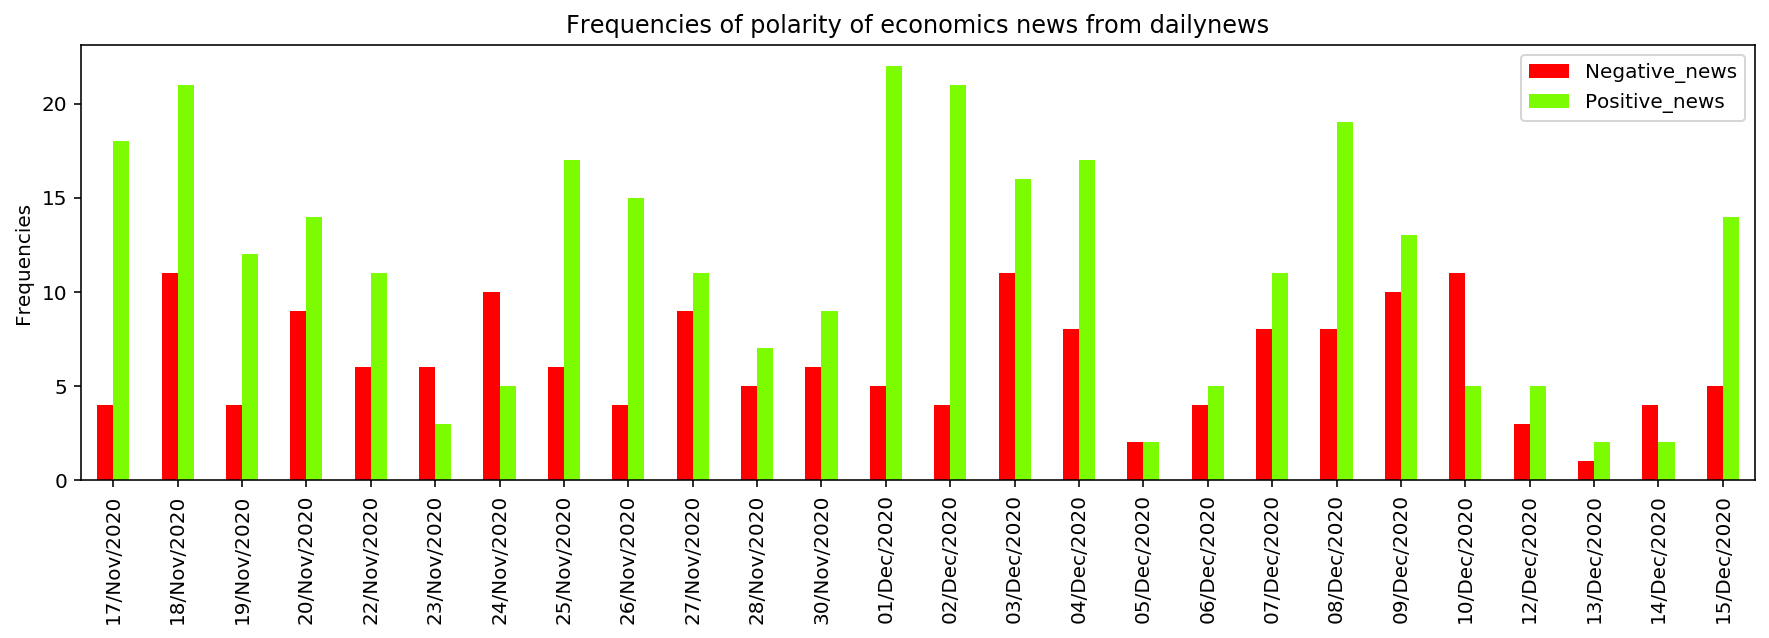

In [50]:
ax = conclusion_df.set_index('Date').plot(kind='bar', title='Frequencies of polarity of '+ topic +' news from ' + name_news, 
                                      figsize = (15, 4), color = ['red', 'lawngreen']);
ax.set_xlabel('');
ax.set_ylabel('Frequencies');